In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.model_selection import GridSearchCV,KFold,LeaveOneOut,train_test_split
from sklearn.cluster import AgglomerativeClustering,hierarchical,KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor

C:\Users\umang ohja\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.cluster.hierarchical module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv('clubmahindra.csv')

In [3]:
pd.options.display.max_columns = None

In [4]:
df.head(20)

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,0765983758d8aee2785a7e2887adeacb67021cb95ada1b...,05-04-2018,05-04-2018,06-04-2018,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,8,1,3d1539e56495b699180a3e85a61ca3d03ce48887380e9a...,8,C,8.0,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,23-01-2015,11-04-2015,16-04-2015,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,2.0,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28-01-2015,01-02-2015,05-02-2015,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,10.0,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02-05-2015,11-06-2015,16-06-2015,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,26.0,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02-09-2015,14-12-2015,19-12-2015,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,26.0,7.059346
5,cc8f05558362b7589004e57044e8b558bd228fc70da5b0...,01-12-2015,12-01-2016,13-01-2016,1,1,2,0,47,1,1,4,2,2.0,7.0,6,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,23.0,8.167707
6,6827da5d76c626deeed81eb9f3afef635db4c17c9cbea0...,20-01-2016,20-01-2016,21-01-2016,3,1,2,0,46,2,7,4,1,3.0,7.0,9,1,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,B,A,32.0,6.449838
7,b89547398bfff6b8e99939fbeb20ddb55aa2e43ebce9e4...,22-08-2016,20-10-2016,25-10-2016,1,1,2,2,46,1,1,2,5,3.0,7.0,6,4,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,23.0,7.046172
8,3706793a0263706fe541b6e7f3b681be363f0b7e2bdc63...,10-09-2016,18-09-2016,24-09-2016,1,1,2,0,45,2,4,3,6,4.0,7.0,10,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,B,A,1.0,5.394203
9,1f797a715ff7788cc8162fb033ee0eca345a2209b27593...,03-08-2016,21-11-2016,24-11-2016,1,1,2,0,45,1,5,4,4,3.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,10.0,6.561412


###### label Encoding resort_id

In [5]:
le = LabelEncoder()

In [6]:
df['resort_id'] = le.fit_transform(df['resort_id'])

In [7]:
df.cluster_code = df['cluster_code'].replace({'8':'G'})

In [8]:
df.tail(20)

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
341404,a8f1e2dd64f67d8d3693c84b6755c25f12949f0ad72f63...,20-02-2019,25-02-2019,27-02-2019,2,2,2,0,46,1,1,3,2,4.0,2.0,6,2,F,1,2c4f4c865c8034d60e8ef6994aea01c1a2ef0f24031ca5...,F,A,5,8.162431
341405,cbf9269795f85e971371a7559e95fbfd8f5a433802cbde...,20-02-2019,21-02-2019,23-02-2019,3,3,2,0,47,3,3,4,2,4.0,12.0,5,2,B,1,6251a420bc049eba19b9276efc68fe182a5f970980d1b0...,F,A,14,4.564609
341406,1f32a1afc5e525ab97a1d1258c252bb530c2fd81fc3b7a...,20-02-2019,27-02-2019,02-03-2019,3,4,2,0,45,1,5,4,3,4.0,27.0,1,2,F,1,7ce3a862bd328fb305af9ca4d389b8d27f6841f2280d06...,E,A,24,5.795287
341407,ef2d1a22ad60000d268f4f9c89d38154eb7bc7c6adfc99...,25-02-2019,26-02-2019,27-02-2019,1,4,2,0,45,1,1,4,1,4.0,27.0,1,2,F,1,7ce3a862bd328fb305af9ca4d389b8d27f6841f2280d06...,E,A,13,6.892235
341408,3c5310654fc0f82d2b87c73319fa6ad5590079601b16a0...,20-02-2019,21-02-2019,23-02-2019,3,4,3,0,47,3,3,2,3,4.0,8.0,3,2,B,1,06b8962c121f6e64c9afe246b53bf1fbef6a3094782ac8...,A,A,29,6.930148
341409,1832e6c93d56e01d3d99f6a5ce6b8df10ea0399234d1d4...,22-01-2019,23-02-2019,25-02-2019,2,4,3,0,45,1,1,3,2,4.0,10.0,1,3,C,1,3f5a248bad9c895fe4f7cfd6467da9893b21c394b0cabd...,E,A,13,7.617366
341410,e123fe0eb328948d66e7f1b3d3e349f6128fb8430eb5ee...,21-02-2019,27-02-2019,28-02-2019,3,3,3,0,45,1,5,3,1,4.0,32.0,1,3,A,1,d58ad861777ee36270a0d55d1b91e11870a2dfc7c380ed...,E,A,16,8.431742
341411,e6f9805764fabca42ebcefe5c02ea22a5ea2db862326a5...,31-01-2019,21-02-2019,23-02-2019,2,3,4,0,4752,2,2,4,4,3.0,5.0,2,2,F,1,99c977a0626fabdb6a2b07239d7e2a18fa167dd7362b96...,D,A,19,8.346030
341412,03f85654e0cfb99628dc61fb1e6b71c988ba8b56346630...,21-02-2019,23-02-2019,26-02-2019,3,4,3,0,47,2,4,3,3,3.0,4.0,13,2,D,1,1f73e0bd066a2ccbcd414f8556123da1e42845fea093d8...,B,A,17,8.005093
341413,f9bba8bb3d5abc37f8af6be4ab9312947a8275d9e37074...,21-02-2019,24-02-2019,26-02-2019,2,3,2,0,45,1,1,2,2,4.0,10.0,6,2,B,2,33d4e7a9f393ea2f5a25d7cf9dbf9912206c5550a763bb...,F,A,22,8.491895


In [9]:
df.persontravellingid.nunique()

6

###### there are 6 unique persontravellingid 

In [10]:
df.persontravellingid.value_counts()

45      267307
47       31580
46       30569
4752     10556
4753      1391
4995        21
Name: persontravellingid, dtype: int64

In [11]:
df.resort_type_code.nunique()

7

In [12]:
df.resort_type_code.value_counts()

1    154324
2     74154
3     48681
5     26706
4     21619
7     11478
0      4462
Name: resort_type_code, dtype: int64

#### checking for resort_region_code for resort type code == 1

In [13]:
df[df['resort_type_code']==1].resort_region_code.value_counts()

1    98813
2    49984
3     5527
Name: resort_region_code, dtype: int64

In [14]:
df.resort_region_code.nunique()

3

In [15]:
df.resort_region_code.value_counts()

1    143790
2    131361
3     66273
Name: resort_region_code, dtype: int64

##### no clear cut results

In [16]:
df[df['resort_region_code']==1].resort_type_code.value_counts()

1    98813
5    26706
2    18271
Name: resort_type_code, dtype: int64

In [17]:
df.shape

(341424, 24)

In [18]:
df.isnull().sum()

reservation_id                           0
booking_date                             0
checkin_date                             0
checkout_date                            0
channel_code                             0
main_product_code                        0
numberofadults                           0
numberofchildren                         0
persontravellingid                       0
resort_region_code                       0
resort_type_code                         0
room_type_booked_code                    0
roomnights                               0
season_holidayed_code                  114
state_code_residence                  4764
state_code_resort                        0
total_pax                                0
member_age_buckets                       0
booking_type_code                        0
memberid                                 0
cluster_code                             0
reservationstatusid_code                 0
resort_id                                0
amount_spen

#### removing three id's here ie ; reservation_id,resort_id,persontravellingid

In [19]:
df = df.drop(columns = ['reservation_id','memberid'],axis=1)

In [20]:
df.shape

(341424, 22)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341424 entries, 0 to 341423
Data columns (total 22 columns):
booking_date                          341424 non-null object
checkin_date                          341424 non-null object
checkout_date                         341424 non-null object
channel_code                          341424 non-null int64
main_product_code                     341424 non-null int64
numberofadults                        341424 non-null int64
numberofchildren                      341424 non-null int64
persontravellingid                    341424 non-null int64
resort_region_code                    341424 non-null int64
resort_type_code                      341424 non-null int64
room_type_booked_code                 341424 non-null int64
roomnights                            341424 non-null int64
season_holidayed_code                 341310 non-null float64
state_code_residence                  336660 non-null float64
state_code_resort                     3414

In [22]:
df.head()

,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,05-04-2018,05-04-2018,06-04-2018,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,8,1,G,C,7,7.706428
1,23-01-2015,11-04-2015,16-04-2015,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,F,A,1,6.662563
2,28-01-2015,01-02-2015,05-02-2015,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,E,A,9,7.871602
3,02-05-2015,11-06-2015,16-06-2015,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,D,A,25,5.344943
4,02-09-2015,14-12-2015,19-12-2015,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,D,A,25,7.059346


In [23]:
df.channel_code.value_counts()

1    161225
3    128042
2     52157
Name: channel_code, dtype: int64

In [24]:
df.main_product_code.value_counts()

2    177615
3     86247
1     57822
4     18619
7      1121
Name: main_product_code, dtype: int64

In [25]:
df.numberofadults.value_counts()

2     149414
4      84468
3      63247
6      20052
5       9849
8       5198
7       2673
9       1445
1       1280
10      1256
12      1010
11       357
16       293
14       216
15       207
13       120
24        83
20        64
18        62
0         27
17        20
22        19
19        12
25        12
21        11
23        10
32        10
30         9
Name: numberofadults, dtype: int64

In [26]:
df.numberofadults.value_counts()

2     149414
4      84468
3      63247
6      20052
5       9849
8       5198
7       2673
9       1445
1       1280
10      1256
12      1010
11       357
16       293
14       216
15       207
13       120
24        83
20        64
18        62
0         27
17        20
22        19
19        12
25        12
21        11
23        10
32        10
30         9
Name: numberofadults, dtype: int64

In [27]:
df.columns

Index(['booking_date', 'checkin_date', 'checkout_date', 'channel_code',
       'main_product_code', 'numberofadults', 'numberofchildren',
       'persontravellingid', 'resort_region_code', 'resort_type_code',
       'room_type_booked_code', 'roomnights', 'season_holidayed_code',
       'state_code_residence', 'state_code_resort', 'total_pax',
       'member_age_buckets', 'booking_type_code', 'cluster_code',
       'reservationstatusid_code', 'resort_id',
       'amount_spent_per_room_night_scaled'],
      dtype='object')

In [28]:
df[df['season_holidayed_code'].isnull()]

,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
296,01-02-2016,18-05-2016,22-05-2016,1,1,2,2,45,1,1,2,4,NaN,15.0,6,4,C,1,F,A,5,8.197141
1081,01-02-2016,22-05-2016,25-05-2016,1,1,4,0,45,1,1,2,3,NaN,8.0,6,2,G,1,F,B,5,7.221797
21702,08-05-2016,17-05-2016,21-05-2016,1,1,3,1,45,1,1,2,4,NaN,2.0,6,4,E,1,F,A,5,6.627826
25387,03-05-2016,21-05-2016,26-05-2016,3,3,3,0,45,1,1,3,5,NaN,10.0,6,3,D,1,F,A,5,8.128805
26818,03-05-2016,23-05-2016,25-05-2016,3,3,2,0,45,1,1,3,3,NaN,1.0,6,5,H,1,F,A,5,7.731696
28869,30-04-2016,22-05-2016,26-05-2016,1,1,2,1,45,1,1,2,4,NaN,2.0,6,3,E,1,F,A,5,7.271815
33967,21-03-2016,21-05-2016,24-05-2016,1,1,3,0,45,1,1,3,10,NaN,15.0,6,3,C,1,F,A,5,7.390566
35670,10-05-2016,23-05-2016,26-05-2016,1,1,9,0,45,1,1,3,9,NaN,8.0,6,3,F,1,F,A,5,9.647242
45498,21-04-2016,23-05-2016,27-05-2016,3,2,5,0,45,1,1,3,8,NaN,8.0,6,3,I,1,F,A,5,8.902034
45499,21-04-2016,23-05-2016,27-05-2016,3,2,5,0,45,1,1,3,8,NaN,8.0,6,3,I,1,F,A,5,7.001216


In [29]:
nan1 = df[(df['persontravellingid']== 45) & (df['resort_region_code']==1) & (df['resort_type_code']==1)]

In [30]:
nan1

,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
14,05-04-2018,05-04-2018,06-04-2018,3,1,2,0,45,1,1,2,1,3.0,8.0,6,4,H,1,F,C,5,9.932153
15,05-04-2018,08-03-2012,11-03-2012,3,1,2,0,45,1,1,2,1,3.0,8.0,6,3,H,1,F,C,5,3.218876
28,22-02-2016,27-03-2016,29-03-2016,1,2,4,3,45,1,1,2,4,2.0,2.0,6,4,D,1,F,A,5,9.278027
33,31-03-2018,13-04-2018,15-04-2018,3,2,3,0,45,1,1,3,2,2.0,5.0,1,4,D,2,E,C,4,8.342892
34,31-03-2018,12-03-2012,18-03-2012,3,2,3,0,45,1,1,3,2,2.0,5.0,1,3,D,2,E,C,4,7.029715
47,27-09-2016,20-10-2016,23-10-2016,3,1,4,0,45,1,1,3,6,3.0,2.0,6,2,F,1,F,B,5,6.412803
64,30-05-2016,15-09-2016,18-09-2016,3,2,2,0,45,1,1,3,3,4.0,6.0,1,2,I,1,E,A,13,6.824540
65,30-05-2016,18-09-2016,20-09-2016,3,2,2,0,45,1,1,3,2,4.0,6.0,1,2,I,1,E,A,23,7.100794
81,05-04-2018,23-03-2012,26-03-2012,1,3,4,0,45,1,1,3,4,2.0,2.0,1,3,E,1,E,C,13,7.229536
93,17-04-2017,06-05-2017,09-05-2017,2,2,8,0,45,1,1,2,9,2.0,7.0,6,5,D,2,F,A,22,7.363085


In [31]:
nan1['season_holidayed_code'].mode()

0    3.0
dtype: float64

In [32]:
df['season_holidayed_code'] = df['season_holidayed_code'].replace()

In [33]:
df.columns

Index(['booking_date', 'checkin_date', 'checkout_date', 'channel_code',
       'main_product_code', 'numberofadults', 'numberofchildren',
       'persontravellingid', 'resort_region_code', 'resort_type_code',
       'room_type_booked_code', 'roomnights', 'season_holidayed_code',
       'state_code_residence', 'state_code_resort', 'total_pax',
       'member_age_buckets', 'booking_type_code', 'cluster_code',
       'reservationstatusid_code', 'resort_id',
       'amount_spent_per_room_night_scaled'],
      dtype='object')

In [34]:
df.dropna(inplace = True)

In [35]:
df.isnull().sum()

booking_date                          0
checkin_date                          0
checkout_date                         0
channel_code                          0
main_product_code                     0
numberofadults                        0
numberofchildren                      0
persontravellingid                    0
resort_region_code                    0
resort_type_code                      0
room_type_booked_code                 0
roomnights                            0
season_holidayed_code                 0
state_code_residence                  0
state_code_resort                     0
total_pax                             0
member_age_buckets                    0
booking_type_code                     0
cluster_code                          0
reservationstatusid_code              0
resort_id                             0
amount_spent_per_room_night_scaled    0
dtype: int64

#### Checking for zero person in the observation

In [36]:
df['total_person'] = df['numberofadults']  + df['numberofchildren']

In [37]:
df.head()

,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,total_person
0,05-04-2018,05-04-2018,06-04-2018,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,8,1,G,C,7,7.706428,2
1,23-01-2015,11-04-2015,16-04-2015,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,F,A,1,6.662563,2
2,28-01-2015,01-02-2015,05-02-2015,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,E,A,9,7.871602,2
3,02-05-2015,11-06-2015,16-06-2015,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,D,A,25,5.344943,4
4,02-09-2015,14-12-2015,19-12-2015,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,D,A,25,7.059346,2


In [38]:
df[df['total_person']==0]

,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,total_person
5352,16-04-2018,29-04-2018,01-05-2018,1,4,0,0,45,2,1,4,2,3.0,7.0,9,3,B,2,B,A,11,7.634888,0
12566,20-02-2017,07-04-2017,10-04-2017,1,2,0,0,45,1,2,3,3,2.0,2.0,11,3,D,1,F,A,27,6.926593,0
36366,14-04-2017,02-05-2017,05-05-2017,1,3,0,0,45,1,5,4,3,2.0,1.0,1,4,H,1,E,A,24,7.306455,0
68167,09-11-2016,10-11-2016,12-11-2016,1,2,0,0,45,3,3,3,2,3.0,7.0,3,4,D,1,A,B,29,9.177836,0
78769,11-12-2017,30-03-2018,01-04-2018,1,2,0,0,45,1,1,3,2,3.0,2.0,6,4,C,2,F,A,22,8.770126,0
99340,06-05-2018,29-05-2018,30-05-2018,1,1,0,0,45,1,5,3,3,1.0,8.0,1,3,D,1,E,A,24,9.258593,0
155198,05-12-2017,25-03-2018,27-03-2018,1,2,0,0,45,1,1,3,3,3.0,7.0,1,4,D,1,E,A,13,8.052255,0
161369,01-08-2018,10-11-2018,12-11-2018,1,1,0,0,45,1,1,2,2,2.0,8.0,6,6,C,2,F,A,22,8.099849,0
168590,19-09-2017,26-10-2017,29-10-2017,1,2,0,0,46,1,1,3,6,2.0,8.0,6,3,E,1,F,B,5,7.691100,0
190716,03-09-2017,06-12-2017,08-12-2017,1,2,0,0,45,1,1,4,3,4.0,8.0,6,4,C,1,F,A,22,5.683784,0


In [39]:
df[df['total_person']==0].shape

(23, 23)

In [40]:
df[df['total_person']< 0].shape

(0, 23)

there are 23 observations with no person travelling but still booking is there

now we will drop these observation

#### checking for negative roomnights

In [41]:
df[df['roomnights']<0]

,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,total_person
36008,30-12-2014,22-03-2015,29-03-2015,1,2,4,3,45,1,1,2,-45,3.0,8.0,6,4,D,1,F,A,22,7.779262,7


#### data difference between booking data and checkin date

In [42]:
df['checkin_date'] = df['checkin_date'].astype('datetime64[ns]')

In [43]:
df['booking_date'] = df['booking_date'].astype('datetime64[ns]')

In [44]:
df['checkout_date'] = df['checkout_date'].astype('datetime64[ns]')

#### making new columns to confirm date deformities

In [45]:
df['book_checkout_diff']  = df['checkout_date']  - df['booking_date']

In [46]:
df['chickin_checkout_diff']  =df['checkout_date'] -  df['checkin_date']  

In [47]:
df['book_checkin_diff']  = df['checkin_date']  - df['booking_date']

#### now will check date deformities

In [48]:
df[df['book_checkin_diff']< '0 days'].shape

(73756, 26)

In [49]:
df['book_checkin_diff'].nunique()

791

In [50]:
df[df['chickin_checkout_diff']<'0 days'].shape

(45514, 26)

In [51]:
df['chickin_checkout_diff'].nunique()

201

In [52]:
df[df['book_checkout_diff']<'0 days'].shape

(75835, 26)

In [53]:
df['book_checkout_diff'].nunique()

791

altogehter we can remove 195105 just on date deformities

In [54]:
73756+45514+75835

195105

In [55]:
df.shape

(336660, 26)

In [56]:
(45574/336660)*100

13.537099744549398

In [57]:
336660-195105

141555

In [58]:
df[(df['book_checkin_diff']< '0 days') & (df['chickin_checkout_diff']<'0 days') & (df['book_checkout_diff']<'0 days') ]

,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,total_person,book_checkout_diff,chickin_checkout_diff,book_checkin_diff
10,2017-03-02,2017-02-28,2017-01-03,2,1,2,0,46,2,0,4,3,2.0,7.0,9,2,F,1,B,A,21,6.820005,2,-58 days,-56 days,-2 days
34,2018-03-31,2012-12-03,2012-03-18,3,2,3,0,45,1,1,3,2,2.0,5.0,1,3,D,2,E,C,4,7.029715,3,-2204 days,-260 days,-1944 days
76,2018-10-07,2018-07-31,2018-04-08,1,2,4,0,47,1,1,4,8,4.0,3.0,1,2,G,1,E,A,13,8.413259,4,-182 days,-114 days,-68 days
381,2016-12-10,2016-10-30,2016-03-11,3,1,3,0,46,2,1,3,4,1.0,7.0,7,3,G,1,C,A,26,8.724222,3,-274 days,-233 days,-41 days
474,2015-12-03,2015-03-29,2015-01-04,3,2,2,0,45,1,1,3,3,3.0,1.0,1,4,D,1,E,A,13,7.459761,2,-333 days,-84 days,-249 days
490,2016-11-04,2016-07-31,2016-04-08,1,1,2,0,45,2,2,2,4,4.0,8.0,2,2,E,1,D,C,25,7.608324,2,-210 days,-114 days,-96 days
901,2015-12-03,2015-03-29,2015-01-04,3,2,3,0,4752,2,1,1,3,2.0,8.0,7,5,D,2,C,A,26,6.436433,3,-333 days,-84 days,-249 days
926,2016-11-06,2016-06-29,2016-01-07,1,2,10,0,45,1,5,3,8,3.0,2.0,1,2,E,1,E,A,16,9.380013,10,-304 days,-174 days,-130 days
1066,2017-12-04,2017-06-30,2017-03-07,1,2,2,1,45,3,3,3,4,2.0,6.0,5,3,B,1,F,A,14,7.212872,3,-272 days,-115 days,-157 days
1165,2017-11-02,2017-05-31,2017-04-06,1,2,3,1,45,1,1,4,8,2.0,13.0,4,2,D,1,F,A,28,7.733476,4,-210 days,-55 days,-155 days


### relationship between 'book_checkout_diff', 'chickin_checkout_diff','book_checkin_diff' and terger variabel one by one

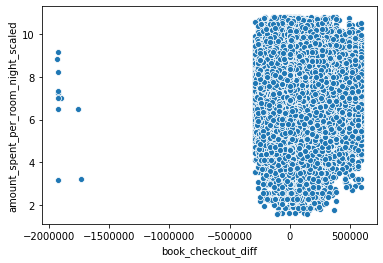

In [59]:
sns.scatterplot(x=(df['book_checkout_diff'].astype('int64'))/10**11,y=df['amount_spent_per_room_night_scaled'])
plt.show()

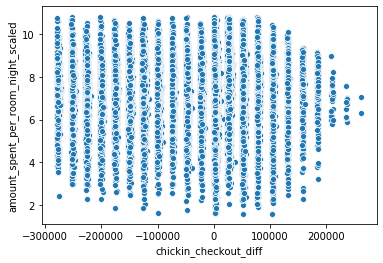

In [60]:
sns.scatterplot(x=(df['chickin_checkout_diff'].astype('int64'))/10**11,y=df['amount_spent_per_room_night_scaled'])
plt.show()

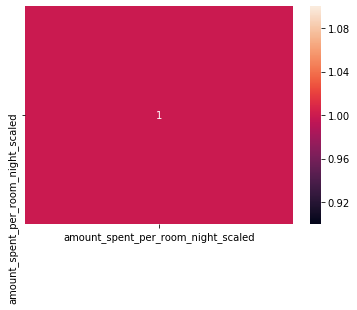

In [61]:
sns.heatmap(df[['book_checkout_diff','amount_spent_per_room_night_scaled']].corr(),annot=True)
plt.show()

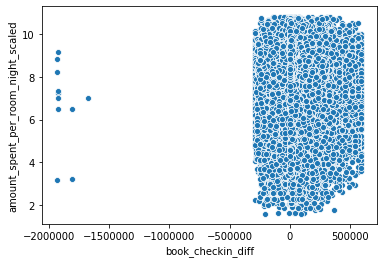

In [62]:
sns.scatterplot(x=(df['book_checkin_diff'].astype('int64'))/10**11,y=df['amount_spent_per_room_night_scaled'])
plt.show()

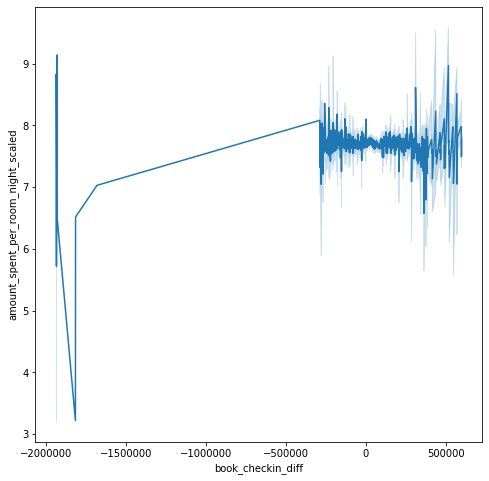

In [63]:
plt.subplots(figsize=(8,8))
sns.lineplot(x=(df['book_checkin_diff'].astype('int64'))/10**11,y=df['amount_spent_per_room_night_scaled'])
plt.show()

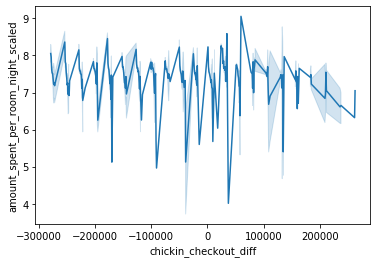

In [64]:
sns.lineplot(x=(df['chickin_checkout_diff'].astype('int64'))/10**11,y=df['amount_spent_per_room_night_scaled'])
plt.show()

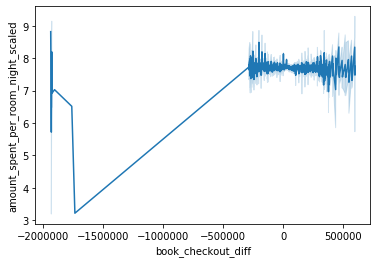

In [65]:
sns.lineplot(x=(df['book_checkout_diff'].astype('int64'))/10**11,y=df['amount_spent_per_room_night_scaled'])
plt.show()

### creating new column people deifference

In [66]:
df['crowd_difference'] = df['total_person'] - df['total_pax']

In [67]:
df.head()

,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,total_person,book_checkout_diff,chickin_checkout_diff,book_checkin_diff,crowd_difference
0,2018-05-04,2018-05-04,2018-06-04,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,8,1,G,C,7,7.706428,2,31 days,31 days,0 days,-1
1,2015-01-23,2015-11-04,2015-04-16,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,F,A,1,6.662563,2,83 days,-202 days,285 days,0
2,2015-01-28,2015-01-02,2015-05-02,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,E,A,9,7.871602,2,94 days,120 days,-26 days,0
3,2015-02-05,2015-11-06,2015-06-16,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,D,A,25,5.344943,4,131 days,-143 days,274 days,2
4,2015-02-09,2015-12-14,2015-12-19,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,D,A,25,7.059346,2,313 days,5 days,308 days,0


In [68]:
df[df['crowd_difference']<0].shape

(86947, 27)

### now we will drop 'booking_date',-ve value 'roomnights',negative value 'chickin_checkout_diff','book_checkout_diff','book_checkin_diff' and  	'total_person' with 0 value

In [69]:
#df.drop(columns=['booking_date','book_checkout_diff','book_checkin_diff'],axis=1,inplace=True)

In [70]:
##df.sample(frac  = 1/6,replace=False,random_state=0 )

###### now will remove -ve value 'roomnights'

In [71]:
df = df[~(df['roomnights'] <0)]# using inverse ~ of the condition

In [72]:
df[df['roomnights']<0]

,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,total_person,book_checkout_diff,chickin_checkout_diff,book_checkin_diff,crowd_difference


######  now will remove 'crowd_difference' with 0 value

In [73]:
df = df[df['total_person']!=0]

###### now will remove negative value 'chickin_checkout_diff'

In [74]:
df = df[~(df['chickin_checkout_diff'] < '0')]

###### now will remove 'crowd_difference' and '	total_person' columns

In [75]:
df = df.drop(['crowd_difference','total_person'],axis=1)

In [76]:
df.shape

(291126, 25)

In [77]:
# df.to_csv('submission.csv',index=False)

In [78]:
df.columns

Index(['booking_date', 'checkin_date', 'checkout_date', 'channel_code',
       'main_product_code', 'numberofadults', 'numberofchildren',
       'persontravellingid', 'resort_region_code', 'resort_type_code',
       'room_type_booked_code', 'roomnights', 'season_holidayed_code',
       'state_code_residence', 'state_code_resort', 'total_pax',
       'member_age_buckets', 'booking_type_code', 'cluster_code',
       'reservationstatusid_code', 'resort_id',
       'amount_spent_per_room_night_scaled', 'book_checkout_diff',
       'chickin_checkout_diff', 'book_checkin_diff'],
      dtype='object')

In [79]:
df = df[~(df['book_checkin_diff'] < '0')]

In [80]:
df.shape

(221659, 25)

In [81]:
df = df[~(df['book_checkout_diff'] < '0')]

In [82]:
df.shape

(221659, 25)

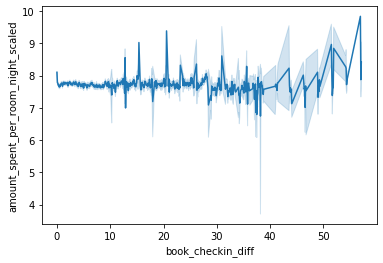

In [83]:
##plt.subplots(figsize=(8,8))
sns.lineplot(x=(df['book_checkin_diff'].astype('int64'))/10**15,y=df['amount_spent_per_room_night_scaled'])
plt.show()

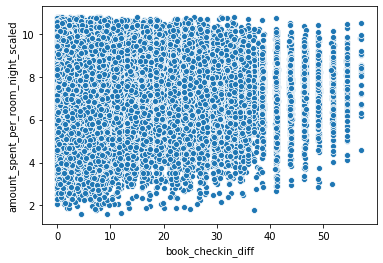

In [84]:
##plt.subplots(figsize=(8,8))
sns.scatterplot(x=(df['book_checkin_diff'].astype('int64'))/10**15,y=df['amount_spent_per_room_night_scaled'])
plt.show()

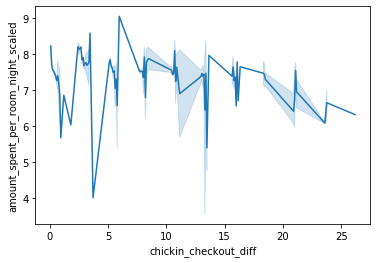

In [85]:
##plt.subplots(figsize=(8,8))
sns.lineplot(x=(df['chickin_checkout_diff'].astype('int64'))/10**15,y=df['amount_spent_per_room_night_scaled'])
plt.show()

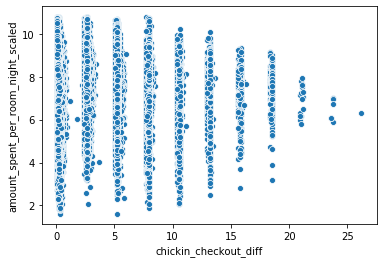

In [86]:
##plt.subplots(figsize=(8,8))
sns.scatterplot(x=(df['chickin_checkout_diff'].astype('int64'))/10**15,y=df['amount_spent_per_room_night_scaled'])
plt.show()

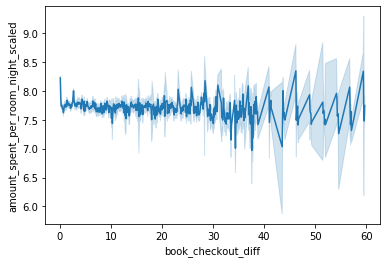

In [87]:
##plt.subplots(figsize=(8,8))
sns.lineplot(x=(df['book_checkout_diff'].astype('int64'))/10**15,y=df['amount_spent_per_room_night_scaled'])
plt.show()

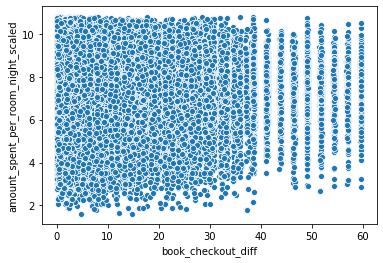

In [88]:
##plt.subplots(figsize=(8,8))
sns.scatterplot(x=(df['book_checkout_diff'].astype('int64'))/10**15,y=df['amount_spent_per_room_night_scaled'])
plt.show()

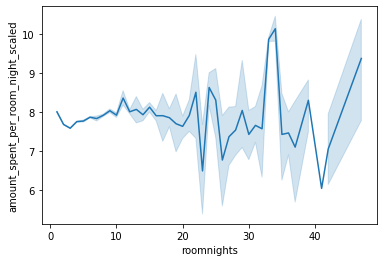

In [89]:
##plt.subplots(figsize=(8,8))
sns.lineplot(x=(df['roomnights'].astype('int64')),y=df['amount_spent_per_room_night_scaled'])
plt.show()

In [90]:
df['total_person'] = df['numberofadults']  + df['numberofchildren']

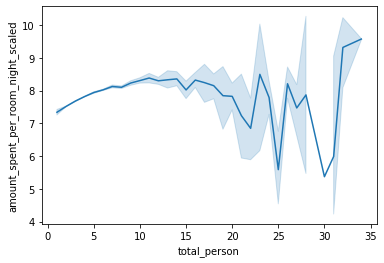

In [91]:
##plt.subplots(figsize=(8,8))
sns.lineplot(x=df['total_person'],y=df['amount_spent_per_room_night_scaled'])
plt.show()

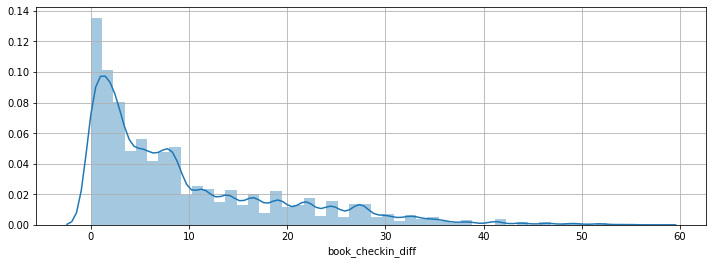

In [92]:
plt.subplots(figsize=(12,4))
sns.distplot((df['book_checkin_diff'].astype('int64'))/10**15)
plt.grid()
plt.show()

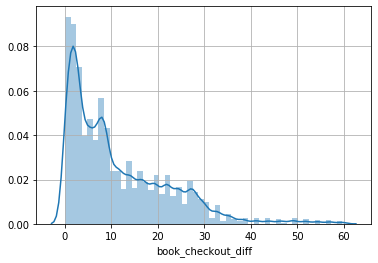

In [93]:
sns.distplot((df['book_checkout_diff'].astype('int64'))/10**15)
plt.grid()
plt.show()

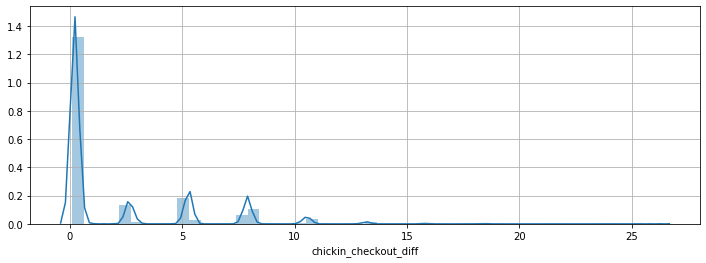

In [94]:
plt.subplots(figsize=(12,4))
sns.distplot((df['chickin_checkout_diff'].astype('int64'))/10**15)
plt.grid()
plt.show()

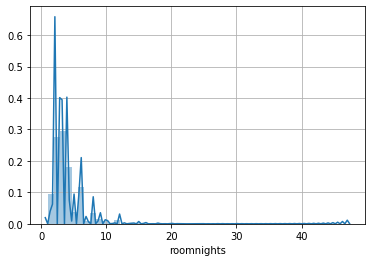

In [95]:
sns.distplot(df['roomnights'])
plt.grid()
plt.show()

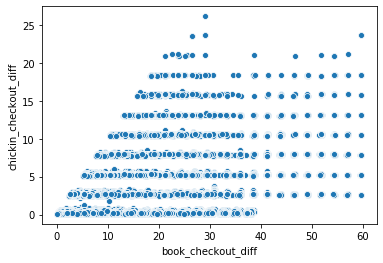

In [96]:
##plt.subplots(figsize=(8,8))
sns.scatterplot(x=(df['book_checkout_diff'].astype('int64'))/10**15,y=(df['chickin_checkout_diff'].astype('int64'))/10**15)
plt.show()

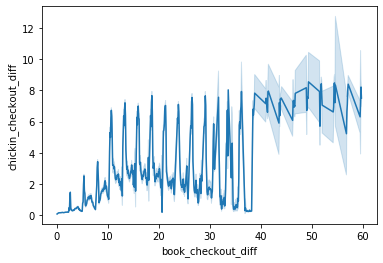

In [97]:
##plt.subplots(figsize=(8,8))
sns.lineplot(x=(df['book_checkout_diff'].astype('int64'))/10**15,y=(df['chickin_checkout_diff'].astype('int64'))/10**15)
plt.show()

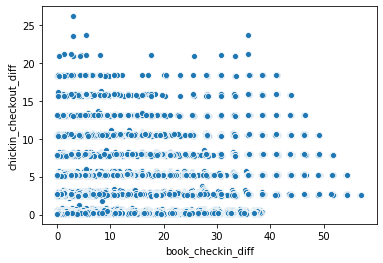

In [98]:
##plt.subplots(figsize=(8,8))
sns.scatterplot(x=(df['book_checkin_diff'].astype('int64'))/10**15,y=(df['chickin_checkout_diff'].astype('int64'))/10**15)
plt.show()

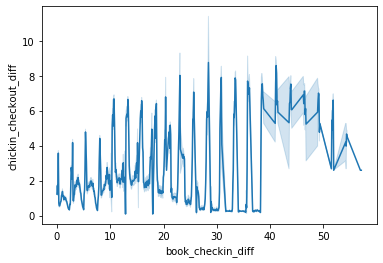

In [99]:
##plt.subplots(figsize=(8,8))
sns.lineplot(x=(df['book_checkin_diff'].astype('int64'))/10**15,y=(df['chickin_checkout_diff'].astype('int64'))/10**15)
plt.show()

## Clustering

In [100]:
df.columns

Index(['booking_date', 'checkin_date', 'checkout_date', 'channel_code',
       'main_product_code', 'numberofadults', 'numberofchildren',
       'persontravellingid', 'resort_region_code', 'resort_type_code',
       'room_type_booked_code', 'roomnights', 'season_holidayed_code',
       'state_code_residence', 'state_code_resort', 'total_pax',
       'member_age_buckets', 'booking_type_code', 'cluster_code',
       'reservationstatusid_code', 'resort_id',
       'amount_spent_per_room_night_scaled', 'book_checkout_diff',
       'chickin_checkout_diff', 'book_checkin_diff', 'total_person'],
      dtype='object')

In [101]:
df.shape

(221659, 26)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221659 entries, 0 to 341421
Data columns (total 26 columns):
booking_date                          221659 non-null datetime64[ns]
checkin_date                          221659 non-null datetime64[ns]
checkout_date                         221659 non-null datetime64[ns]
channel_code                          221659 non-null int64
main_product_code                     221659 non-null int64
numberofadults                        221659 non-null int64
numberofchildren                      221659 non-null int64
persontravellingid                    221659 non-null int64
resort_region_code                    221659 non-null int64
resort_type_code                      221659 non-null int64
room_type_booked_code                 221659 non-null int64
roomnights                            221659 non-null int64
season_holidayed_code                 221659 non-null float64
state_code_residence                  221659 non-null float64
state_code_resort 

In [123]:
df['chickin_checkout_diff']=(df['chickin_checkout_diff'].astype('int64'))/10**15
df['book_checkin_diff']=(df['book_checkin_diff'].astype('int64'))/10**15
df['book_checkout_diff']=(df['book_checkout_diff'].astype('int64'))/10**15


In [100]:
#x = df.drop('amount_spent_per_room_night_scaled',axis=1)

In [101]:
#y = df['amount_spent_per_room_night_scaled']

In [102]:
# x = pd.get_dummies(data=x,columns=['channel_code', 'main_product_code', 'numberofadults',
#        'numberofchildren', 'persontravellingid', 'resort_region_code',
#        'resort_type_code', 'room_type_booked_code', 'roomnights',
#        'season_holidayed_code', 'state_code_residence', 'state_code_resort',
#        'total_pax', 'member_age_buckets', 'booking_type_code', 'cluster_code',
#        'reservationstatusid_code'])

In [103]:
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [104]:
#X_cons = sm.add_constant(x)

In [124]:
ano = df.drop(columns=['booking_date', 'checkin_date', 'checkout_date']) 
       #'book_checkout_diff', 'chickin_checkout_diff', 'book_checkin_diff'])

In [125]:
ano.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221659 entries, 0 to 341421
Data columns (total 23 columns):
channel_code                          221659 non-null int64
main_product_code                     221659 non-null int64
numberofadults                        221659 non-null int64
numberofchildren                      221659 non-null int64
persontravellingid                    221659 non-null int64
resort_region_code                    221659 non-null int64
resort_type_code                      221659 non-null int64
room_type_booked_code                 221659 non-null int64
roomnights                            221659 non-null int64
season_holidayed_code                 221659 non-null float64
state_code_residence                  221659 non-null float64
state_code_resort                     221659 non-null int64
total_pax                             221659 non-null int64
member_age_buckets                    221659 non-null object
booking_type_code                     221659

In [126]:
ano.cluster_code.value_counts()

F    74460
E    39420
D    36037
B    25125
C    24614
A    19513
G     2490
Name: cluster_code, dtype: int64

In [127]:
ano.reservationstatusid_code.value_counts()

A    203024
B     10054
C      8581
Name: reservationstatusid_code, dtype: int64

In [128]:
ano.member_age_buckets.value_counts()

D    44037
E    43173
F    32774
C    29417
H    24918
G    23446
B    12505
I     5530
A     4642
J      874
8      343
Name: member_age_buckets, dtype: int64

In [129]:
from sklearn.preprocessing import LabelEncoder

In [130]:
le = LabelEncoder()

In [131]:
ano['cluster_code'] = le.fit_transform(ano['cluster_code'])

In [132]:
ano['reservationstatusid_code'] = le.fit_transform(ano['reservationstatusid_code'])

In [133]:
ano['member_age_buckets'] = le.fit_transform(ano['member_age_buckets'])

In [134]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(ano)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,1.654838e+11
1,2,8.057840e+07
2,3,4.789620e+07
3,4,3.841776e+07
4,5,3.338409e+07
5,6,3.034533e+07
6,7,2.816158e+07
7,8,2.663293e+07
8,9,2.556010e+07
9,10,2.464007e+07


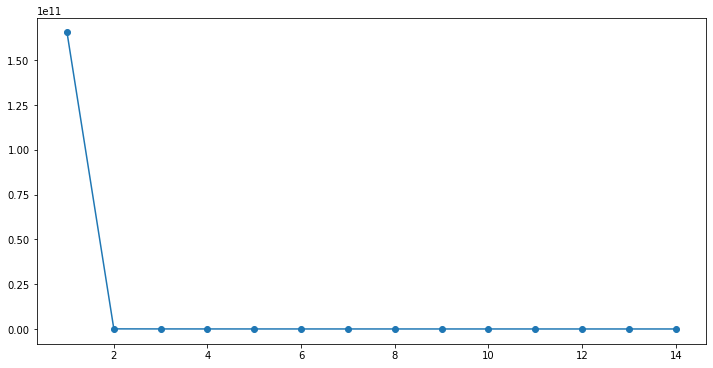

In [135]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [136]:
kmeans = KMeans(n_clusters=2, n_init = 15, random_state=2)

In [137]:
kmeans.fit(ano)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [138]:
centroids=kmeans.cluster_centers_

In [140]:
centroid_df = pd.DataFrame(centroids, columns = list(ano) )

In [141]:
centroid_df

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,book_checkout_diff,chickin_checkout_diff,book_checkin_diff,total_person
0,1.910968,2.195294,3.273882,0.371015,45.277187,1.779525,2.213693,2.890330,3.687964,2.656013,7.288588,4.757699,3.201974,5.095721,1.123469,3.278744,0.123016,17.326420,7.747302,11.616630,2.002201,9.614429,3.644897
1,1.962637,2.100840,3.403749,0.123982,4752.391467,1.742728,2.244861,2.981254,3.646154,2.713769,7.096574,4.774144,3.001810,4.969489,1.073432,3.359017,0.116354,17.732127,7.500720,10.505626,1.970121,8.535505,3.527731


In [142]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [144]:
# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
iris_df_labeled = ano.join(df_labels)

In [145]:
iris_clusters = iris_df_labeled.groupby(['labels'])
#wine_clusters = wine_data_attr.groupby(['clusters'])
df0=iris_clusters.get_group(0)
df1=iris_clusters.get_group(1)
finaldf = pd.concat([df0,df1])
finaldf.head()

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,book_checkout_diff,chickin_checkout_diff,book_checkin_diff,total_person,labels
0,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,0,1,6,2,7,7.706428,2.6784,2.6784,0.0000,2,0
4,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,6,1,3,0,25,7.059346,27.0432,0.4320,26.6112,2,0
6,3,1,2,0,46,2,7,4,1,3.0,7.0,9,1,6,1,1,0,31,6.449838,0.0864,0.0864,0.0000,2,0
7,1,1,2,2,46,1,1,2,5,3.0,7.0,6,4,6,1,5,0,22,7.046172,5.5296,0.4320,5.0976,4,0
9,1,1,2,0,45,1,5,4,4,3.0,7.0,1,2,6,1,4,0,9,6.561412,22.5504,0.2592,22.2912,2,0


In [ ]:
from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=ano.values

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,n_init=15, random_state=2)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

Automatically created module for IPython interactive environment


In [117]:
ano_cons = sm.add_constant(ano)

In [116]:
lin_reg = sm.OLS(y,ano_cons).fit()

In [117]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     amount_spent_per_room_night_scaled   R-squared:                       0.070
Model:                                            OLS   Adj. R-squared:                  0.069
Method:                                 Least Squares   F-statistic:                     920.3
Date:                                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                                        16:57:51   Log-Likelihood:            -3.2682e+05
No. Observations:                              221659   AIC:                         6.537e+05
Df Residuals:                                  221640   BIC:                         6.539e+05
Df Model:                                          18                                         
Covariance Type:                            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        7.5978      0.024    311.375      0.000       7.550       7.646
channel_code                 0.1017      0.003     38.998      0.000       0.097       0.107
main_product_code           -0.0971      0.003    -32.273      0.000      -0.103      -0.091
numberofadults               0.0444      0.001     31.643      0.000       0.042       0.047
numberofchildren             0.0057      0.002      2.714      0.007       0.002       0.010
persontravellingid       -5.132e-05   2.61e-06    -19.674      0.000   -5.64e-05   -4.62e-05
resort_region_code          -0.1525      0.004    -42.227      0.000      -0.160      -0.145
resort_type_code             0.0145      0.002      9.506      0.000       0.012       0.018
room_type_booked_code        0.0462      0.003     13.847      0.000       0.040       0.053
roomnights                  -0.0137      0.001    -11.425      0.000      -0.016      -0.011
season_holidayed_code       -0.0611      0.003    -22.194      0.000      -0.067      -0.056
state_code_residence        -0.0039      0.000     -7.908      0.000      -0.005      -0.003
state_code_resort            0.0117      0.001     15.812      0.000       0.010       0.013
total_pax                    0.1123      0.002     50.482      0.000       0.108       0.117
member_age_buckets          -0.0093      0.001     -7.660      0.000      -0.012      -0.007
booking_type_code            0.0133      0.007      1.824      0.068      -0.001       0.028
cluster_code                -0.0171      0.002    -10.738      0.000      -0.020      -0.014
reservationstatusid_code    -0.0100      0.005     -1.921      0.055      -0.020       0.000
resort_id                   -0.0080      0.000    -29.054      0.000      -0.009      -0.007
total_person                 0.0501      0.001     39.455      0.000       0.048       0.053
==============================================================================
Omnibus:                    41372.229   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            93008.401
Skew:                          -1.077   Prob(JB):                         0.00
Kurtosis:                       5.330   Cond. No.                     4.10e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.04e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [118]:
lin_reg.pvalues

const                        0.000000e+00
channel_code                 0.000000e+00
main_product_code           5.681018e-228
numberofadults              2.932628e-219
numberofchildren             6.655617e-03
persontravellingid           4.260624e-86
resort_region_code           0.000000e+00
resort_type_code             2.004534e-21
room_type_booked_code        1.382366e-43
roomnights                   3.207048e-30
season_holidayed_code       5.117565e-109
state_code_residence         2.625708e-15
state_code_resort            2.754541e-56
total_pax                    0.000000e+00
member_age_buckets           1.873867e-14
booking_type_code            6.820537e-02
cluster_code                 6.834992e-27
reservationstatusid_code     5.472785e-02
resort_id                   3.036571e-185
total_person                 0.000000e+00
dtype: float64

In [119]:
print(lin_reg.summary())

                                    OLS Regression Results                                    
Dep. Variable:     amount_spent_per_room_night_scaled   R-squared:                       0.070
Model:                                            OLS   Adj. R-squared:                  0.069
Method:                                 Least Squares   F-statistic:                     920.3
Date:                                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                                        16:57:52   Log-Likelihood:            -3.2682e+05
No. Observations:                              221659   AIC:                         6.537e+05
Df Residuals:                                  221640   BIC:                         6.539e+05
Df Model:                                          18                                         
Covariance Type:                            nonrobust                                         
                               coef    std err    

In [120]:
from sklearn.feature_selection import f_regression

In [121]:
#pd.get_dummies(data=ano,columns=)

SyntaxError: invalid syntax (<ipython-input-121-ed249889363f>, line 1)

In [122]:
anova = f_regression(ano,y)
anova

(array([1920.54776922, 1537.21241794, 4844.68477418,  399.75976842,
         380.08048646, 1208.63489342,  115.0000378 ,  539.37399137,
         516.60842568, 1724.78689258,  167.12189611,  256.72900189,
        4681.60813502,   69.14448532,   77.38091629,   99.92824595,
          10.49843087,  442.58101168, 5368.06514474]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 7.44397880e-089,
        1.40763434e-084, 4.19594730e-264, 7.98988192e-027, 3.58441809e-119,
        3.12937652e-114, 0.00000000e+000, 3.24818611e-038, 9.55087283e-058,
        0.00000000e+000, 9.20167998e-017, 1.41950396e-018, 1.59844565e-023,
        1.19493571e-003, 3.70658338e-098, 0.00000000e+000]))

In [134]:
df1=df

In [136]:
df1['book_checkout_diff'] = (df1['book_checkout_diff'].astype('int64'))/10**15
df1['chickin_checkout_diff'] = (df1['chickin_checkout_diff'].astype('int64'))/10**15
df1['book_checkin_diff'] = (df1['book_checkin_diff'].astype('int64'))/10**15




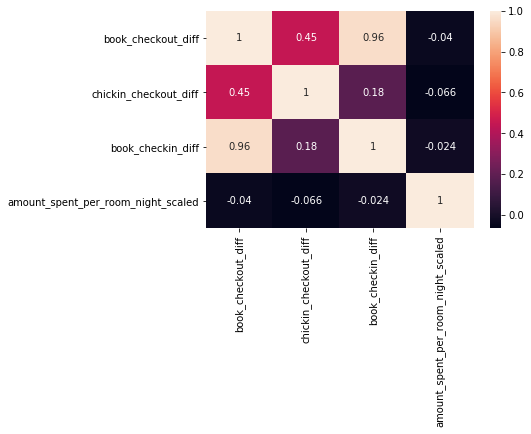

In [139]:
sns.heatmap(df1[['book_checkout_diff','chickin_checkout_diff','book_checkin_diff','amount_spent_per_room_night_scaled',]].corr(),annot=True)
plt.show()

In [125]:
df.columns

Index(['booking_date', 'checkin_date', 'checkout_date', 'channel_code',
       'main_product_code', 'numberofadults', 'numberofchildren',
       'persontravellingid', 'resort_region_code', 'resort_type_code',
       'room_type_booked_code', 'roomnights', 'season_holidayed_code',
       'state_code_residence', 'state_code_resort', 'total_pax',
       'member_age_buckets', 'booking_type_code', 'cluster_code',
       'reservationstatusid_code', 'resort_id',
       'amount_spent_per_room_night_scaled', 'book_checkout_diff',
       'chickin_checkout_diff', 'book_checkin_diff', 'total_person'],
      dtype='object')

In [ ]:
np.asarray(x)

## cheking normality of our target variable

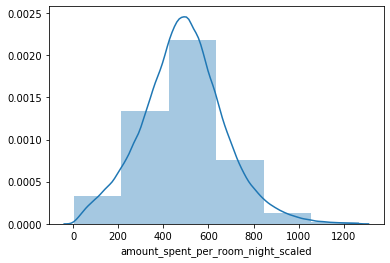

In [78]:
sns.distplot(df['amount_spent_per_room_night_scaled']**3,bins=6)
plt.show()

In [79]:
from scipy import stats
print(stats.jarque_bera(df['amount_spent_per_room_night_scaled']**3))

(4149.7487047329705, 0.0)


In [80]:
from scipy import stats
print(stats.jarque_bera(df['amount_spent_per_room_night_scaled']**2))

(7241.3738637055085, 0.0)


In [81]:
from scipy import stats
print(stats.jarque_bera(df['amount_spent_per_room_night_scaled']))

(79923.74363133585, 0.0)


In [82]:
from scipy import stats
print(stats.jarque_bera(df['amount_spent_per_room_night_scaled']**4))

(33436.60516217072, 0.0)


from the above observations we can see that targer variable with power 3 is giving best result though it is not normal but better than others
4149.7487047329705 > 5.99 therefore it is not perfectaly normal

In [83]:
df['amount_spent_per_room_night_scaled'].nunique()

239519

#### now we will check normality of residual using jarque bera test using OLS (as number of observation is > 2000) 

In [84]:
df.drop(['chickin_checkout_diff','checkin_date', 'checkout_date'],axis=1,inplace = True)

In [85]:
y = df['amount_spent_per_room_night_scaled']
x = df.drop('amount_spent_per_room_night_scaled',axis=1)

In [86]:
df.columns

Index(['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'cluster_code',
       'reservationstatusid_code', 'resort_id',
       'amount_spent_per_room_night_scaled'],
      dtype='object')

In [87]:
x = pd.get_dummies(data=x,columns=['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'cluster_code',
       'reservationstatusid_code'])

In [88]:
x.head()

,resort_id,channel_code_1,channel_code_2,channel_code_3,main_product_code_1,main_product_code_2,main_product_code_3,main_product_code_4,main_product_code_7,numberofadults_1,numberofadults_2,numberofadults_3,numberofadults_4,numberofadults_5,numberofadults_6,numberofadults_7,numberofadults_8,numberofadults_9,numberofadults_10,numberofadults_11,numberofadults_12,numberofadults_13,numberofadults_14,numberofadults_15,numberofadults_16,numberofadults_17,numberofadults_18,numberofadults_19,numberofadults_20,numberofadults_21,numberofadults_22,numberofadults_23,numberofadults_24,numberofadults_25,numberofadults_30,numberofadults_32,numberofchildren_0,numberofchildren_1,numberofchildren_2,numberofchildren_3,numberofchildren_4,numberofchildren_5,numberofchildren_6,numberofchildren_7,numberofchildren_8,numberofchildren_10,numberofchildren_13,persontravellingid_45,persontravellingid_46,persontravellingid_47,persontravellingid_4752,persontravellingid_4753,persontravellingid_4995,resort_region_code_1,resort_region_code_2,resort_region_code_3,resort_type_code_0,resort_type_code_1,resort_type_code_2,resort_type_code_3,resort_type_code_4,resort_type_code_5,resort_type_code_7,room_type_booked_code_1,room_type_booked_code_2,room_type_booked_code_3,room_type_booked_code_4,room_type_booked_code_5,room_type_booked_code_6,roomnights_0,roomnights_1,roomnights_2,roomnights_3,roomnights_4,roomnights_5,roomnights_6,roomnights_7,roomnights_8,roomnights_9,roomnights_10,roomnights_11,roomnights_12,roomnights_13,roomnights_14,roomnights_15,roomnights_16,roomnights_17,roomnights_18,roomnights_19,roomnights_20,roomnights_21,roomnights_22,roomnights_23,roomnights_24,roomnights_25,roomnights_26,roomnights_27,roomnights_28,roomnights_29,roomnights_30,roomnights_31,roomnights_32,roomnights_33,roomnights_34,roomnights_35,roomnights_36,roomnights_37,roomnights_39,roomnights_41,roomnights_42,roomnights_47,roomnights_60,season_holidayed_code_1.0,season_holidayed_code_2.0,season_holidayed_code_3.0,season_holidayed_code_4.0,state_code_residence_1.0,state_code_residence_2.0,state_code_residence_3.0,state_code_residence_4.0,state_code_residence_5.0,state_code_residence_6.0,state_code_residence_7.0,state_code_residence_8.0,state_code_residence_9.0,state_code_residence_10.0,state_code_residence_11.0,state_code_residence_12.0,state_code_residence_13.0,state_code_residence_14.0,state_code_residence_15.0,state_code_residence_16.0,state_code_residence_18.0,state_code_residence_19.0,state_code_residence_20.0,state_code_residence_21.0,state_code_residence_22.0,state_code_residence_23.0,state_code_residence_24.0,state_code_residence_25.0,state_code_residence_26.0,state_code_residence_27.0,state_code_residence_28.0,state_code_residence_29.0,state_code_residence_30.0,state_code_residence_31.0,state_code_residence_32.0,state_code_residence_33.0,state_code_residence_34.0,state_code_residence_35.0,state_code_residence_36.0,state_code_residence_37.0,state_code_residence_38.0,state_code_resort_1,state_code_resort_2,state_code_resort_3,state_code_resort_4,state_code_resort_5,state_code_resort_6,state_code_resort_7,state_code_resort_9,state_code_resort_10,state_code_resort_11,state_code_resort_13,total_pax_0,total_pax_1,total_pax_2,total_pax_3,total_pax_4,total_pax_5,total_pax_6,total_pax_7,total_pax_8,total_pax_9,total_pax_10,total_pax_11,total_pax_12,total_pax_13,total_pax_14,total_pax_20,total_pax_21,total_pax_24,member_age_buckets_8,member_age_buckets_A,member_age_buckets_B,member_age_buckets_C,member_age_buckets_D,member_age_buckets_E,member_age_buckets_F,member_age_buckets_G,member_age_buckets_H,member_age_buckets_I,member_age_buckets_J,booking_type_code_1,booking_type_code_2,cluster_code_A,cluster_code_B,cluster_code_C,cluster_code_D,cluster_code_E,cluster_code_F,cluster_code_G,reservationstatusid_code_A,reservationstatusid_code_B,reservationstatusid_code_C
0,7,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0

In [89]:
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [90]:
X_constant = sm.add_constant(x)

In [91]:
lin_reg = sm.OLS(y,X_constant).fit()

In [92]:
import scipy.stats 

In [93]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     amount_spent_per_room_night_scaled   R-squared:                       0.112
Model:                                            OLS   Adj. R-squared:                  0.111
Method:                                 Least Squares   F-statistic:                     202.9
Date:                                Tue, 07 Apr 2020   Prob (F-statistic):               0.00
Time:                                        12:39:36   Log-Likelihood:            -4.2170e+05
No. Observations:                              291126   AIC:                         8.438e+05
Df Residuals:                                  290945   BIC:                         8.457e+05
Df Model:                                         180                                         
Covariance Type:                            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          2.1716      0.045     47.826      0.000       2.083       2.261
resort_id                     -0.0083      0.000    -27.663      0.000      -0.009      -0.008
channel_code_1                 0.6228      0.015     40.483      0.000       0.593       0.653
channel_code_2                 0.8025      0.016     51.446      0.000       0.772       0.833
channel_code_3                 0.7463      0.015     48.390      0.000       0.716       0.777
main_product_code_1            0.6107      0.012     50.296      0.000       0.587       0.635
main_product_code_2            0.4999      0.012     42.887      0.000       0.477       0.523
main_product_code_3            0.3892      0.012     32.900      0.000       0.366       0.412
main_product_code_4            0.2599      0.013     19.566      0.000       0.234       0.286
main_product_code_7            0.4120      0.028     14.513      0.000       0.356       0.468
numberofadults_1              -0.4451      0.053     -8.378      0.000      -0.549      -0.341
numberofadults_2              -0.3116      0.043     -7.194      0.000      -0.397      -0.227
numberofadults_3              -0.2143      0.043     -4.943      0.000      -0.299      -0.129
numberofadults_4              -0.0960      0.043     -2.222      0.026      -0.181      -0.011
numberofadults_5               0.0806      0.044      1.818      0.069      -0.006       0.167
numberofadults_6               0.1232      0.044      2.833      0.005       0.038       0.209
numberofadults_7               0.2071      0.048      4.359      0.000       0.114       0.300
numberofadults_8               0.2206      0.045      4.899      0.000       0.132       0.309
numberofadults_9               0.3798      0.051      7.421      0.000       0.279       0.480
numberofadults_10              0.4507      0.052      8.682      0.000       0.349       0.552
numberofadults_11              0.2958      0.072      4.087      0.000       0.154       0.438
numberofadults_12              0.4359      0.054      8.082      0.000       0.330       0.542
numberofadults_13              0.5445      0.111      4.889      0.000       0.326       0.763
numberofadults_14              0.5716      0.084      6.832      0.000       0.408       0.736
numberofadults_15              0.3113      0.089      3.498      0.000       0.137       0.486
numberofadults_16              0.4107      0.075      5.463      0.000       0.263       0.558
numberofadults_17              0.4206      0.241      1.746      0.081      -0.052       0.893
numberofadults_18             -0.4958      0.145     -3.4

In [94]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

(136982.55596171148, 0.0)


this is far more than 137764.8946340364 > 5.99 therefore not normal

In [95]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid**1/2))

(136982.55596171148, 0.0)


In [96]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid**1/3))

(136982.5559617113, 0.0)


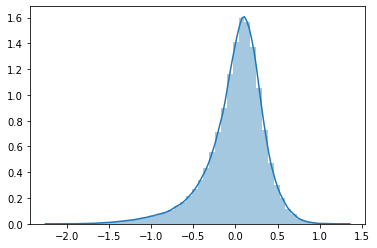

In [97]:
sns.distplot(lin_reg.resid**1/3)
plt.show()

here we can see that by increasing the root value there is no change in normality and by increasing power it is deflecting far from Normality

## Now we will take cube of our target variable and check normality of residual

In [98]:
y_3 = df['amount_spent_per_room_night_scaled']**3

In [99]:
lin_reg_3 = sm.OLS(y_3,X_constant).fit()

In [100]:
lin_reg_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     amount_spent_per_room_night_scaled   R-squared:                       0.138
Model:                                            OLS   Adj. R-squared:                  0.137
Method:                                 Least Squares   F-statistic:                     258.8
Date:                                Tue, 07 Apr 2020   Prob (F-statistic):               0.00
Time:                                        12:40:00   Log-Likelihood:            -1.9067e+06
No. Observations:                              291126   AIC:                         3.814e+06
Df Residuals:                                  290945   BIC:                         3.816e+06
Df Model:                                         180                                         
Covariance Type:                            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        182.5849      7.454     24.493      0.000     167.974     197.195
resort_id                     -1.3465      0.049    -27.494      0.000      -1.442      -1.250
channel_code_1                40.9199      2.525     16.203      0.000      35.970      45.870
channel_code_2                77.5610      2.561     30.285      0.000      72.541      82.581
channel_code_3                64.1040      2.532     25.318      0.000      59.141      69.067
main_product_code_1           68.4465      1.994     34.335      0.000      64.539      72.354
main_product_code_2           48.7528      1.914     25.478      0.000      45.002      52.503
main_product_code_3           29.0430      1.942     14.956      0.000      25.237      32.849
main_product_code_4            7.7084      2.181      3.535      0.000       3.434      11.982
main_product_code_7           28.6341      4.660      6.144      0.000      19.500      37.768
numberofadults_1            -123.4992      8.722    -14.160      0.000    -140.593    -106.405
numberofadults_2            -100.9937      7.112    -14.200      0.000    -114.934     -87.054
numberofadults_3             -82.6932      7.118    -11.618      0.000     -96.644     -68.742
numberofadults_4             -58.6934      7.093     -8.274      0.000     -72.596     -44.791
numberofadults_5             -22.4807      7.275     -3.090      0.002     -36.740      -8.221
numberofadults_6              -9.8716      7.143     -1.382      0.167     -23.871       4.128
numberofadults_7               9.6361      7.800      1.235      0.217      -5.651      24.923
numberofadults_8              14.3272      7.392      1.938      0.053      -0.161      28.816
numberofadults_9              46.9051      8.401      5.584      0.000      30.440      63.370
numberofadults_10             64.7545      8.521      7.599      0.000      48.053      81.456
numberofadults_11             48.1677     11.883      4.054      0.000      24.878      71.457
numberofadults_12             70.1991      8.856      7.927      0.000      52.842      87.556
numberofadults_13            103.4451     18.284      5.658      0.000      67.610     139.280
numberofadults_14            102.6717     13.737      7.474      0.000      75.748     129.596
numberofadults_15             46.0250     14.608      3.151      0.002      17.395      74.655
numberofadults_16             84.1404     12.342      6.818      0.000      59.951     108.330
numberofadults_17             88.1883     39.543      2.230      0.026      10.684     165.692
numberofadults_18            -81.9434     23.865     -3.4

here we can see that  Jarque-Bera (JB):	6433.790 > 5.99 therefore it is still not normal but the best possible near to normal 

### now we will replace our target variable with cube of it becauuse it is better than actual targer variable on the basis of  normality

##### binning the targer variable

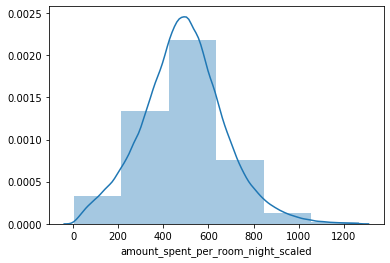

In [101]:
sns.distplot(y_3,bins=6)
plt.show()

In [102]:
bins = [0,200,400,600,800,1000,1200]

In [103]:
labels = ['1','2','3','4','5','6']

In [104]:
df['cube_amount_spent_per_room_night_scaled'] = df['amount_spent_per_room_night_scaled']**3

In [105]:
df['binned_amount_spent_per_room_night_scaled'] = pd.cut(df['cube_amount_spent_per_room_night_scaled'],bins,labels=labels)


In [106]:
df.head()

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,cube_amount_spent_per_room_night_scaled,binned_amount_spent_per_room_night_scaled
0,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,8,1,G,C,7,7.706428,457.677385,3
2,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,E,A,9,7.871602,487.741147,3
4,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,D,A,25,7.059346,351.798049,2
6,3,1,2,0,46,2,7,4,1,3.0,7.0,9,1,F,1,B,A,31,6.449838,268.315946,2
7,1,1,2,2,46,1,1,2,5,3.0,7.0,6,4,F,1,F,A,22,7.046172,349.832147,2


# Sampling and Statistical Analysis

In [107]:
df.head()

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,cube_amount_spent_per_room_night_scaled,binned_amount_spent_per_room_night_scaled
0,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,8,1,G,C,7,7.706428,457.677385,3
2,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,E,A,9,7.871602,487.741147,3
4,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,D,A,25,7.059346,351.798049,2
6,3,1,2,0,46,2,7,4,1,3.0,7.0,9,1,F,1,B,A,31,6.449838,268.315946,2
7,1,1,2,2,46,1,1,2,5,3.0,7.0,6,4,F,1,F,A,22,7.046172,349.832147,2


###### for statistical analysis purpose we will convert all are numerical variables into object

In [108]:
df.select_dtypes(['int64','float64']).columns

Index(['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'booking_type_code', 'resort_id',
       'amount_spent_per_room_night_scaled',
       'cube_amount_spent_per_room_night_scaled'],
      dtype='object')

In [109]:
df[['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'booking_type_code', 'resort_id']] = df[['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'booking_type_code', 'resort_id']].astype('category')

In [110]:
import statsmodels.api as sm

In [111]:
sample = df.sample(n = 240**2,replace = False,random_state=0 ) 

In [112]:
sample['binned_amount_spent_per_room_night_scaled'].isnull().sum()

36

In [113]:
sample['binned_amount_spent_per_room_night_scaled'].value_counts()

3    25909
2    13906
4    11624
1     3430
5     2311
6      384
Name: binned_amount_spent_per_room_night_scaled, dtype: int64

In [114]:
population = df

In [115]:
import scipy.stats as st

#### Checking statistically if sample is correct representation of population

In [116]:
for i in list(sample.columns) :
    if sample[i].nunique()==population[i].nunique():
            print(i,' \n',st.chi2_contingency(np.array(list(sample[i].value_counts())  + list(population[i].value_counts())).reshape(2,sample[i].nunique())))

channel_code  
 (1.9540874047962353, 0.3764222718226128, 2, array([[ 26842.70401404,  21830.37456341,   8926.92142255],
       [135670.29598596, 110336.62543659,  45119.07857745]]))
main_product_code  
 (1.1436583304315002, 0.8872849022751539, 4, array([[ 29817.46356739,  14617.78014831,   9822.81791435,
          3146.70428933,    195.23408062],
       [150705.53643261,  73882.21985169,  49647.18208565,
         15904.29571067,    986.76591938]]))
persontravellingid  
 (2.6743283016690222, 0.75004192240013, 5, array([[4.50288742e+04, 5.35704479e+03, 5.18361350e+03, 1.80186852e+03,
        2.25460677e+02, 3.13828048e+00],
       [2.27588126e+05, 2.70759552e+04, 2.61993865e+04, 9.10713148e+03,
        1.13953932e+03, 1.58617195e+01]]))
resort_region_code  
 (0.21835884694243654, 0.8965695374472411, 2, array([[ 24162.77765352,  22243.30620602,  11193.91614047],
       [122125.22234648, 112423.69379398,  56577.08385953]]))
resort_type_code  
 (2.482584368557757, 0.8704116378357524, 6, arr

#### here after checking for proportions of  all the categorical columns of sample and populations here we observed that pvalue for all featrues  > 0.05 this means that we fail to reject null hypothesis


#### Conclusion : Proportions of Sample  = Proportions of Populations
#### Therefore Sample is correct representation of population

### Checking if mean of target variable of sample  is  equal to mean of target variable of population 

In [117]:
st.ttest_ind(sample['cube_amount_spent_per_room_night_scaled'],population['cube_amount_spent_per_room_night_scaled'])

Ttest_indResult(statistic=-1.099508341199251, pvalue=0.27154715673869023)

##### conclusion : here pvalue(0.27154715673869023)  > alpha(0.05) therefore we failed to reject null hypothesis


### splitting the data in x and y

In [118]:
x = sample.drop(['amount_spent_per_room_night_scaled',
       'cube_amount_spent_per_room_night_scaled',
       'binned_amount_spent_per_room_night_scaled'],axis = 1)

In [119]:
y = sample['amount_spent_per_room_night_scaled']

###### converting to dummies

In [120]:
x = pd.get_dummies(data=x,columns=['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'cluster_code',
       'reservationstatusid_code', 'resort_id'],drop_first=True)

###### adding constant 

In [121]:
import statsmodels.api as sm

In [122]:
x_1 = sm.add_constant(x)

In [123]:
x_1.head()

,const,channel_code_2,channel_code_3,main_product_code_2,main_product_code_3,main_product_code_4,main_product_code_7,numberofadults_2,numberofadults_3,numberofadults_4,numberofadults_5,numberofadults_6,numberofadults_7,numberofadults_8,numberofadults_9,numberofadults_10,numberofadults_11,numberofadults_12,numberofadults_13,numberofadults_14,numberofadults_15,numberofadults_16,numberofadults_17,numberofadults_18,numberofadults_19,numberofadults_20,numberofadults_21,numberofadults_22,numberofadults_23,numberofadults_24,numberofadults_25,numberofadults_30,numberofadults_32,numberofchildren_1,numberofchildren_2,numberofchildren_3,numberofchildren_4,numberofchildren_5,numberofchildren_6,numberofchildren_7,numberofchildren_8,numberofchildren_10,numberofchildren_13,persontravellingid_46,persontravellingid_47,persontravellingid_4752,persontravellingid_4753,persontravellingid_4995,resort_region_code_2,resort_region_code_3,resort_type_code_1,resort_type_code_2,resort_type_code_3,resort_type_code_4,resort_type_code_5,resort_type_code_7,room_type_booked_code_2,room_type_booked_code_3,room_type_booked_code_4,room_type_booked_code_5,room_type_booked_code_6,roomnights_1,roomnights_2,roomnights_3,roomnights_4,roomnights_5,roomnights_6,roomnights_7,roomnights_8,roomnights_9,roomnights_10,roomnights_11,roomnights_12,roomnights_13,roomnights_14,roomnights_15,roomnights_16,roomnights_17,roomnights_18,roomnights_19,roomnights_20,roomnights_21,roomnights_22,roomnights_23,roomnights_24,roomnights_25,roomnights_26,roomnights_27,roomnights_28,roomnights_29,roomnights_30,roomnights_31,roomnights_32,roomnights_33,roomnights_34,roomnights_35,roomnights_36,roomnights_37,roomnights_39,roomnights_41,roomnights_42,roomnights_47,roomnights_60,season_holidayed_code_2.0,season_holidayed_code_3.0,season_holidayed_code_4.0,state_code_residence_2.0,state_code_residence_3.0,state_code_residence_4.0,state_code_residence_5.0,state_code_residence_6.0,state_code_residence_7.0,state_code_residence_8.0,state_code_residence_9.0,state_code_residence_10.0,state_code_residence_11.0,state_code_residence_12.0,state_code_residence_13.0,state_code_residence_14.0,state_code_residence_15.0,state_code_residence_16.0,state_code_residence_18.0,state_code_residence_19.0,state_code_residence_20.0,state_code_residence_21.0,state_code_residence_22.0,state_code_residence_23.0,state_code_residence_24.0,state_code_residence_25.0,state_code_residence_26.0,state_code_residence_27.0,state_code_residence_28.0,state_code_residence_29.0,state_code_residence_30.0,state_code_residence_31.0,state_code_residence_32.0,state_code_residence_33.0,state_code_residence_34.0,state_code_residence_35.0,state_code_residence_36.0,state_code_residence_37.0,state_code_residence_38.0,state_code_resort_2,state_code_resort_3,state_code_resort_4,state_code_resort_5,state_code_resort_6,state_code_resort_7,state_code_resort_9,state_code_resort_10,state_code_resort_11,state_code_resort_13,total_pax_1,total_pax_2,total_pax_3,total_pax_4,total_pax_5,total_pax_6,total_pax_7,total_pax_8,total_pax_9,total_pax_10,total_pax_11,total_pax_12,total_pax_13,total_pax_14,total_pax_20,total_pax_21,total_pax_24,member_age_buckets_A,member_age_buckets_B,member_age_buckets_C,member_age_buckets_D,member_age_buckets_E,member_age_buckets_F,member_age_buckets_G,member_age_buckets_H,member_age_buckets_I,member_age_buckets_J,booking_type_code_2,cluster_code_B,cluster_code_C,cluster_code_D,cluster_code_E,cluster_code_F,cluster_code_G,reservationstatusid_code_B,reservationstatusid_code_C,resort_id_1,resort_id_2,resort_id_3,resort_id_4,resort_id_5,resort_id_6,resort_id_7,resort_id_8,resort_id_9,resort_id_10,resort_id_11,resort_id_12,resort_id_13,resort_id_14,resort_id_15,resort_id_16,resort_id_17,resort_id_18,resort_id_19,resort_id_20,resort_id_21,resort_id_22,resort_id_23,resort_id_24,resort_id_25,resort_id_26,resort_id_27,resort_id_28,resort_id_29,resort_id_30,resort_id_31
166670,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [124]:
x_1.shape

(57600, 219)

In [125]:
219**2

47961

###### splitting the data

In [126]:
57600/3

19200.0

In [127]:
test = df.sample(n = 19200,replace = False,random_state=1 )

In [128]:
x_test = test.drop(['amount_spent_per_room_night_scaled',
       'cube_amount_spent_per_room_night_scaled',
       'binned_amount_spent_per_room_night_scaled'],axis = 1)

In [129]:
y_test = test['cube_amount_spent_per_room_night_scaled']

In [130]:
x_test = pd.get_dummies(data=x_test,columns=['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'cluster_code',
       'reservationstatusid_code', 'resort_id'],drop_first=True)

In [131]:
x_test = sm.add_constant(x_test)

In [132]:
x_test.shape

(19200, 219)

#### checking for hypermeters for knn

In [133]:
# from sklearn.model_selection import GridSearchCV
# knn=KNeighborsRegressor()
# knn_params={'n_neighbors':np.arange(3,100),'weights':['uniform','distance']}
# GS=GridSearchCV(knn,knn_params,cv=5,scoring='neg_mean_squared_error')
# GS.fit(x_1,y)
# GS.best_params_

# Regression Model building

In [134]:
# LR=LinearRegression()
# KNN=KNeighborsRegressor(n_neighbors=50,weights='distance')
# DT=DecisionTreeRegressor(max_depth=50,min_samples_leaf=15,random_state=0)
# RF=RandomForestRegressor(n_estimators=100,random_state=0)
# # Bagged=BaggingRegressor(n_estimators=50)
# # AdaBoost=AdaBoostRegressor(n_estimators=50)
# # AB_RF=AdaBoostRegressor(base_estimator=RF,n_estimators=50,random_state=0)
# # GBoost=GradientBoostingRegressor(n_estimators=800)
# # stacked = VotingRegressor(estimators = [('GBoost',GBoost),('Boost_RF', AB_RF)])


In [135]:
# models = []
# models.append(('KNNRegressor',KNN))
# models.append(('DT_Regressor',DT))
# models.append(('RF_Regressor',RF))
# #models.append(('Bagged',Bagged))
# #models.append(('AdaBoost',AdaBoost))
# #models.append(('AdaBoostRF',AB_RF))
# #models.append(('GradientBoostRegressor',GBoost))
# #models.append(('VotingRegressor',stacked))

In [136]:
# # evaluate each model in turn
# results = []
# names = []
# for name, model in models:
# 	kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
# 	cv_results = model_selection.cross_val_score(model, x_1, y,
# 	                                  cv=kfold, scoring='neg_mean_squared_error')
# 	results.append(np.sqrt(np.abs(cv_results))) #for ploting purpose
# 	names.append(name)
# 	print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),
# 	                       np.std(np.sqrt(np.abs(cv_results)),ddof=1)))



### using R_square metrics

In [137]:
# LR=LinearRegression()
# KNN=KNeighborsRegressor(n_neighbors=3,weights='distance')
# DT=DecisionTreeRegressor(max_depth=11,min_samples_leaf=5,random_state=0)
# RF=RandomForestRegressor(n_estimators=100,random_state=0)
# # Bagged=BaggingRegressor(n_estimators=50)
# # AdaBoost=AdaBoostRegressor(n_estimators=50)
# # AB_RF=AdaBoostRegressor(base_estimator=RF,n_estimators=50,random_state=0)
# # GBoost=GradientBoostingRegressor(n_estimators=800)
# # stacked = VotingRegressor(estimators = [('GBoost',GBoost),('Boost_RF', AB_RF)])


In [138]:
# models = []
# models.append(('KNNRegressor',KNN))
# models.append(('DT_Regressor',DT))
# models.append(('RF_Regressor',RF))
# #models.append(('Bagged',Bagged))
# #models.append(('AdaBoost',AdaBoost))
# #models.append(('AdaBoostRF',AB_RF))
# #models.append(('GradientBoostRegressor',GBoost))
# #models.append(('VotingRegressor',stacked))

In [139]:
# # evaluate each model in turn
# results = []
# names = []
# for name, model in models:
# 	kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
# 	cv_results = model_selection.cross_val_score(model, x_1, y,
# 	                                  cv=kfold, scoring='r2')
# 	results.append(np.sqrt(np.abs(cv_results))) #for ploting purpose
# 	names.append(name)
# 	print("{}   {} ".format(name, np.mean(cv_results)))
	                       


## we will check for significant and insignificant values

In [140]:
model = sm.OLS(y,x_1).fit()

In [141]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     amount_spent_per_room_night_scaled   R-squared:                       0.124
Model:                                            OLS   Adj. R-squared:                  0.121
Method:                                 Least Squares   F-statistic:                     44.99
Date:                                Tue, 07 Apr 2020   Prob (F-statistic):               0.00
Time:                                        12:40:13   Log-Likelihood:                -83069.
No. Observations:                               57600   AIC:                         1.665e+05
Df Residuals:                                   57418   BIC:                         1.681e+05
Df Model:                                         181                                         
Covariance Type:                            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          5.1162      0.340     15.066      0.000       4.451       5.782
channel_code_2                 0.2037      0.013     15.798      0.000       0.178       0.229
channel_code_3                 0.0994      0.011      9.270      0.000       0.078       0.120
main_product_code_2           -0.1322      0.012    -10.605      0.000      -0.157      -0.108
main_product_code_3           -0.2515      0.015    -17.125      0.000      -0.280      -0.223
main_product_code_4           -0.3553      0.023    -15.769      0.000      -0.399      -0.311
main_product_code_7           -0.1835      0.074     -2.495      0.013      -0.328      -0.039
numberofadults_2               0.0735      0.067      1.102      0.271      -0.057       0.204
numberofadults_3               0.1827      0.067      2.713      0.007       0.051       0.315
numberofadults_4               0.2908      0.068      4.308      0.000       0.159       0.423
numberofadults_5               0.4895      0.072      6.798      0.000       0.348       0.631
numberofadults_6               0.4986      0.070      7.130      0.000       0.362       0.636
numberofadults_7               0.4522      0.084      5.403      0.000       0.288       0.616
numberofadults_8               0.6361      0.077      8.274      0.000       0.485       0.787
numberofadults_9               0.8609      0.094      9.131      0.000       0.676       1.046
numberofadults_10              0.9593      0.102      9.447      0.000       0.760       1.158
numberofadults_11              0.6712      0.150      4.460      0.000       0.376       0.966
numberofadults_12              0.7291      0.108      6.754      0.000       0.518       0.941
numberofadults_13              1.5405      0.275      5.603      0.000       1.002       2.079
numberofadults_14              0.7051      0.180      3.921      0.000       0.353       1.058
numberofadults_15              0.5942      0.188      3.167      0.002       0.226       0.962
numberofadults_16              1.0541      0.173      6.102      0.000       0.715       1.393
numberofadults_17              0.5027      0.740      0.679      0.497      -0.948       1.954
numberofadults_18              1.7374      0.322      5.400      0.000       1.107       2.368
numberofadults_19             -1.9565      0.781     -2.506      0.012      -3.487      -0.426
numberofadults_20              0.4160      0.317      1.311      0.190      -0.206       1.038
numberofadults_21             -2.5488      1.060     -2.405      0.016      -4.626      -0.472
numberofadults_22              1.1891      0.487      2.4

#### removing insignificant values using backward elimination

In [142]:
#Backward Elimination
cols = list(x.columns)
pmax = 1
while (len(cols)>0):
    p= []
    x_1 = x[cols]
    x_1 = sm.add_constant(x_1)
    model = sm.OLS(y,x_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['channel_code_2', 'channel_code_3', 'main_product_code_2', 'main_product_code_3', 'main_product_code_4', 'main_product_code_7', 'numberofadults_3', 'numberofadults_4', 'numberofadults_5', 'numberofadults_6', 'numberofadults_7', 'numberofadults_8', 'numberofadults_9', 'numberofadults_10', 'numberofadults_11', 'numberofadults_12', 'numberofadults_13', 'numberofadults_14', 'numberofadults_15', 'numberofadults_16', 'numberofadults_18', 'numberofadults_19', 'numberofadults_21', 'numberofadults_22', 'numberofadults_24', 'numberofchildren_1', 'numberofchildren_2', 'numberofchildren_3', 'numberofchildren_4', 'numberofchildren_7', 'numberofchildren_8', 'persontravellingid_46', 'persontravellingid_47', 'persontravellingid_4752', 'persontravellingid_4753', 'resort_region_code_2', 'resort_region_code_3', 'resort_type_code_1', 'resort_type_code_2', 'resort_type_code_3', 'resort_type_code_4', 'resort_type_code_5', 'resort_type_code_7', 'room_type_booked_code_4', 'room_type_booked_code_5', 'roomnigh

In [143]:
x_1 = x_1[['const','channel_code_2', 'channel_code_3', 'main_product_code_2', 'main_product_code_3', 'main_product_code_4', 'main_product_code_7', 'numberofadults_3', 'numberofadults_4', 'numberofadults_5', 'numberofadults_6', 'numberofadults_7', 'numberofadults_8', 'numberofadults_9', 'numberofadults_10', 'numberofadults_11', 'numberofadults_12', 'numberofadults_13', 'numberofadults_14', 'numberofadults_15', 'numberofadults_16', 'numberofadults_18', 'numberofadults_19', 'numberofadults_21', 'numberofadults_22', 'numberofadults_24', 'numberofchildren_1', 'numberofchildren_2', 'numberofchildren_3', 'numberofchildren_4', 'numberofchildren_7', 'numberofchildren_8', 'persontravellingid_46', 'persontravellingid_47', 'persontravellingid_4752', 'persontravellingid_4753', 'resort_region_code_2', 'resort_region_code_3', 'resort_type_code_1', 'resort_type_code_2', 'resort_type_code_3', 'resort_type_code_4', 'resort_type_code_5', 'resort_type_code_7', 'room_type_booked_code_4', 'room_type_booked_code_5', 'roomnights_1', 'roomnights_2', 'roomnights_3', 'roomnights_4', 'roomnights_5', 'roomnights_6', 'roomnights_7', 'roomnights_8', 'roomnights_9', 'roomnights_10', 'roomnights_11', 'roomnights_12', 'roomnights_13', 'roomnights_14', 'roomnights_15', 'roomnights_17', 'roomnights_18', 'roomnights_24', 'roomnights_34', 'season_holidayed_code_2.0', 'season_holidayed_code_3.0', 'season_holidayed_code_4.0', 'state_code_residence_2.0', 'state_code_residence_4.0', 'state_code_residence_5.0', 'state_code_residence_6.0', 'state_code_residence_7.0', 'state_code_residence_8.0', 'state_code_residence_9.0', 'state_code_residence_11.0', 'state_code_residence_12.0', 'state_code_residence_13.0', 'state_code_residence_15.0', 'state_code_residence_18.0', 'state_code_residence_19.0', 'state_code_residence_20.0', 'state_code_residence_22.0', 'state_code_residence_23.0', 'state_code_residence_29.0', 'state_code_resort_2', 'state_code_resort_3', 'state_code_resort_4', 'state_code_resort_5', 'state_code_resort_6', 'state_code_resort_7', 'state_code_resort_9', 'state_code_resort_11', 'state_code_resort_13', 'total_pax_1', 'total_pax_2', 'total_pax_3', 'total_pax_4', 'total_pax_8', 'total_pax_9', 'total_pax_12', 'member_age_buckets_B', 'member_age_buckets_G', 'member_age_buckets_H', 'booking_type_code_2', 'cluster_code_B', 'cluster_code_C', 'cluster_code_D', 'cluster_code_E', 'cluster_code_F', 'cluster_code_G', 'reservationstatusid_code_B', 'resort_id_1', 'resort_id_2', 'resort_id_4', 'resort_id_5', 'resort_id_6', 'resort_id_7', 'resort_id_8', 'resort_id_9', 'resort_id_10', 'resort_id_11', 'resort_id_12', 'resort_id_13', 'resort_id_14', 'resort_id_16', 'resort_id_17', 'resort_id_18', 'resort_id_19', 'resort_id_20', 'resort_id_21', 'resort_id_22', 'resort_id_23', 'resort_id_24', 'resort_id_25', 'resort_id_26', 'resort_id_27', 'resort_id_28', 'resort_id_29', 'resort_id_31']]

In [144]:
x_1.head()

,const,channel_code_2,channel_code_3,main_product_code_2,main_product_code_3,main_product_code_4,main_product_code_7,numberofadults_3,numberofadults_4,numberofadults_5,numberofadults_6,numberofadults_7,numberofadults_8,numberofadults_9,numberofadults_10,numberofadults_11,numberofadults_12,numberofadults_13,numberofadults_14,numberofadults_15,numberofadults_16,numberofadults_18,numberofadults_19,numberofadults_21,numberofadults_22,numberofadults_24,numberofchildren_1,numberofchildren_2,numberofchildren_3,numberofchildren_4,numberofchildren_7,numberofchildren_8,persontravellingid_46,persontravellingid_47,persontravellingid_4752,persontravellingid_4753,resort_region_code_2,resort_region_code_3,resort_type_code_1,resort_type_code_2,resort_type_code_3,resort_type_code_4,resort_type_code_5,resort_type_code_7,room_type_booked_code_4,room_type_booked_code_5,roomnights_1,roomnights_2,roomnights_3,roomnights_4,roomnights_5,roomnights_6,roomnights_7,roomnights_8,roomnights_9,roomnights_10,roomnights_11,roomnights_12,roomnights_13,roomnights_14,roomnights_15,roomnights_17,roomnights_18,roomnights_24,roomnights_34,season_holidayed_code_2.0,season_holidayed_code_3.0,season_holidayed_code_4.0,state_code_residence_2.0,state_code_residence_4.0,state_code_residence_5.0,state_code_residence_6.0,state_code_residence_7.0,state_code_residence_8.0,state_code_residence_9.0,state_code_residence_11.0,state_code_residence_12.0,state_code_residence_13.0,state_code_residence_15.0,state_code_residence_18.0,state_code_residence_19.0,state_code_residence_20.0,state_code_residence_22.0,state_code_residence_23.0,state_code_residence_29.0,state_code_resort_2,state_code_resort_3,state_code_resort_4,state_code_resort_5,state_code_resort_6,state_code_resort_7,state_code_resort_9,state_code_resort_11,state_code_resort_13,total_pax_1,total_pax_2,total_pax_3,total_pax_4,total_pax_8,total_pax_9,total_pax_12,member_age_buckets_B,member_age_buckets_G,member_age_buckets_H,booking_type_code_2,cluster_code_B,cluster_code_C,cluster_code_D,cluster_code_E,cluster_code_F,cluster_code_G,reservationstatusid_code_B,resort_id_1,resort_id_2,resort_id_4,resort_id_5,resort_id_6,resort_id_7,resort_id_8,resort_id_9,resort_id_10,resort_id_11,resort_id_12,resort_id_13,resort_id_14,resort_id_16,resort_id_17,resort_id_18,resort_id_19,resort_id_20,resort_id_21,resort_id_22,resort_id_23,resort_id_24,resort_id_25,resort_id_26,resort_id_27,resort_id_28,resort_id_29,resort_id_31
166670,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
304487,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
255788,1.0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23097,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
303583,1.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [145]:
x_1.shape

(57600, 140)

In [146]:
y.shape

(57600,)

## R2 metrics

In [147]:
LR=LinearRegression()
KNN=KNeighborsRegressor(n_neighbors=8,weights='distance')
DT=DecisionTreeRegressor(max_depth=11,min_samples_leaf=5,random_state=0)
RF=RandomForestRegressor(n_estimators=100,random_state=0)


In [148]:
models = []
models.append(('MVLR', LR))
models.append(('KNNRegressor',KNN))
models.append(('DT_Regressor',DT))
models.append(('RF_Regressor',RF))


In [149]:
# # evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
	cv_results = model_selection.cross_val_score(model, x_1, y,
	                                  cv=kfold, scoring='r2')
	results.append((np.abs(cv_results))) #for ploting purpose
	names.append(name)
	print("{}   {} ".format(name, np.mean(cv_results)))

MVLR   -316305284601354.56 
KNNRegressor   -0.0471053194634337 
DT_Regressor   0.03952331044750237 
RF_Regressor   0.011597390422858655 


### model building using statsmodel

In [150]:
model1 = sm.OLS(y,x_1).fit()

In [151]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     amount_spent_per_room_night_scaled   R-squared:                       0.123
Model:                                            OLS   Adj. R-squared:                  0.121
Method:                                 Least Squares   F-statistic:                     68.51
Date:                                Tue, 07 Apr 2020   Prob (F-statistic):               0.00
Time:                                        13:14:18   Log-Likelihood:                -83099.
No. Observations:                               57600   AIC:                         1.664e+05
Df Residuals:                                   57481   BIC:                         1.675e+05
Df Model:                                         118                                         
Covariance Type:                            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          4.9056      0.053     92.160      0.000       4.801       5.010
channel_code_2                 0.2040      0.013     15.888      0.000       0.179       0.229
channel_code_3                 0.1000      0.011      9.351      0.000       0.079       0.121
main_product_code_2           -0.1323      0.012    -10.637      0.000      -0.157      -0.108
main_product_code_3           -0.2523      0.015    -17.302      0.000      -0.281      -0.224
main_product_code_4           -0.3568      0.022    -15.927      0.000      -0.401      -0.313
main_product_code_7           -0.1852      0.073     -2.532      0.011      -0.329      -0.042
numberofadults_3               0.1082      0.013      8.600      0.000       0.084       0.133
numberofadults_4               0.2155      0.013     17.129      0.000       0.191       0.240
numberofadults_5               0.4148      0.028     14.881      0.000       0.360       0.469
numberofadults_6               0.4261      0.022     19.505      0.000       0.383       0.469
numberofadults_7               0.3758      0.051      7.407      0.000       0.276       0.475
numberofadults_8               0.5562      0.038     14.518      0.000       0.481       0.631
numberofadults_9               0.7842      0.067     11.713      0.000       0.653       0.915
numberofadults_10              0.8682      0.076     11.428      0.000       0.719       1.017
numberofadults_11              0.5884      0.135      4.372      0.000       0.325       0.852
numberofadults_12              0.6560      0.085      7.750      0.000       0.490       0.822
numberofadults_13              1.4665      0.266      5.510      0.000       0.945       1.988
numberofadults_14              0.6859      0.160      4.280      0.000       0.372       1.000
numberofadults_15              0.4427      0.167      2.644      0.008       0.114       0.771
numberofadults_16              0.9463      0.158      5.983      0.000       0.636       1.256
numberofadults_18              1.8152      0.303      5.991      0.000       1.221       2.409
numberofadults_19             -2.0273      0.728     -2.785      0.005      -3.454      -0.601
numberofadults_21             -2.4258      1.028     -2.359      0.018      -4.441      -0.410
numberofadults_22              1.1139      0.399      2.794      0.005       0.333       1.895
numberofadults_24              1.1018      0.272      4.058      0.000       0.570       1.634
numberofchildren_1             0.1383      0.015      9.305      0.000       0.109       0.167
numberofchildren_2             0.1054      0.016      6.6

A problem with a low condition number is said to be well-conditioned, while a problem with a high condition number is said to be ill-conditioned. In non-mathematical terms, an ill-conditioned problem is one where, for a small change in the inputs (the independent variables or the right-hand-side of an equation) there is a large change in the answer or dependent variable. This means that the correct solution/answer to the equation becomes hard to find. The condition number is a property of the problem. Paired with the problem are any number of algorithms that can be used to solve the problem, that is, to calculate the solution. Some algorithms have a property called backward stability. In general, a backward stable algorithm can be expected to accurately solve well-conditioned problems. Numerical analysis textbooks give formulas for the condition numbers of problems and identify known backward stable algorithms.

As a rule of thumb, if the condition number {\displaystyle \kappa (A)=10^{k}}\kappa(A) = 10^k, then you may lose up to {\displaystyle k}k digits of accuracy on top of what would be lost to the numerical method due to loss of precision from arithmetic methods.[3] However, the condition number does not give the exact value of the maximum inaccuracy that may occur in the algorithm. It generally just bounds it with an estimate (whose computed value depends on the choice of the norm to measure the inaccuracy).

#### VIF MULTI-COLLINEARITY

In [152]:
x_vif = x_1[['channel_code_2', 'channel_code_3', 'main_product_code_2', 'main_product_code_3', 'main_product_code_4', 'main_product_code_7', 'numberofadults_3', 'numberofadults_4', 'numberofadults_5', 'numberofadults_6', 'numberofadults_7', 'numberofadults_8', 'numberofadults_9', 'numberofadults_10', 'numberofadults_11', 'numberofadults_12', 'numberofadults_13', 'numberofadults_14', 'numberofadults_15', 'numberofadults_16', 'numberofadults_18', 'numberofadults_19', 'numberofadults_21', 'numberofadults_22', 'numberofadults_24', 'numberofchildren_1', 'numberofchildren_2', 'numberofchildren_3', 'numberofchildren_4', 'numberofchildren_7', 'numberofchildren_8', 'persontravellingid_46', 'persontravellingid_47', 'persontravellingid_4752', 'persontravellingid_4753', 'resort_region_code_2', 'resort_region_code_3', 'resort_type_code_1', 'resort_type_code_2', 'resort_type_code_3', 'resort_type_code_4', 'resort_type_code_5', 'resort_type_code_7', 'room_type_booked_code_4', 'room_type_booked_code_5', 'roomnights_1', 'roomnights_2', 'roomnights_3', 'roomnights_4', 'roomnights_5', 'roomnights_6', 'roomnights_7', 'roomnights_8', 'roomnights_9', 'roomnights_10', 'roomnights_11', 'roomnights_12', 'roomnights_13', 'roomnights_14', 'roomnights_15', 'roomnights_17', 'roomnights_18', 'roomnights_24', 'roomnights_34', 'season_holidayed_code_2.0', 'season_holidayed_code_3.0', 'season_holidayed_code_4.0', 'state_code_residence_2.0', 'state_code_residence_4.0', 'state_code_residence_5.0', 'state_code_residence_6.0', 'state_code_residence_7.0', 'state_code_residence_8.0', 'state_code_residence_9.0', 'state_code_residence_11.0', 'state_code_residence_12.0', 'state_code_residence_13.0', 'state_code_residence_15.0', 'state_code_residence_18.0', 'state_code_residence_19.0', 'state_code_residence_20.0', 'state_code_residence_22.0', 'state_code_residence_23.0', 'state_code_residence_29.0', 'state_code_resort_2', 'state_code_resort_3', 'state_code_resort_4', 'state_code_resort_5', 'state_code_resort_6', 'state_code_resort_7', 'state_code_resort_9', 'state_code_resort_11', 'state_code_resort_13', 'total_pax_1', 'total_pax_2', 'total_pax_3', 'total_pax_4', 'total_pax_8', 'total_pax_9', 'total_pax_12', 'member_age_buckets_B', 'member_age_buckets_G', 'member_age_buckets_H', 'booking_type_code_2', 'cluster_code_B', 'cluster_code_C', 'cluster_code_D', 'cluster_code_E', 'cluster_code_F', 'cluster_code_G', 'reservationstatusid_code_B', 'resort_id_1', 'resort_id_2', 'resort_id_4', 'resort_id_5', 'resort_id_6', 'resort_id_7', 'resort_id_8', 'resort_id_9', 'resort_id_10', 'resort_id_11', 'resort_id_12', 'resort_id_13', 'resort_id_14', 'resort_id_16', 'resort_id_17', 'resort_id_18', 'resort_id_19', 'resort_id_20', 'resort_id_21', 'resort_id_22', 'resort_id_23', 'resort_id_24', 'resort_id_25', 'resort_id_26', 'resort_id_27', 'resort_id_28', 'resort_id_29', 'resort_id_31']]

In [153]:
x_1.shape

(57600, 140)

In [154]:
x_vif.shape

(57600, 139)

###### step 1

In [155]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(x_1.values, i) for i in range(x_1.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x_vif.columns)

,vif
channel_code_2,1.170926
channel_code_3,1.475644
main_product_code_2,2.117824
main_product_code_3,2.211464
main_product_code_4,1.431263
main_product_code_7,1.040210
numberofadults_3,1.313761
numberofadults_4,1.606235
numberofadults_5,1.155070
numberofadults_6,1.433912


In [156]:
pd.options.display.max_rows = None

In [157]:
pd.DataFrame({'vif': vif[1:]}, index=x_vif.columns)

,vif
channel_code_2,1.170926
channel_code_3,1.475644
main_product_code_2,2.117824
main_product_code_3,2.211464
main_product_code_4,1.431263
main_product_code_7,1.040210
numberofadults_3,1.313761
numberofadults_4,1.606235
numberofadults_5,1.155070
numberofadults_6,1.433912


In [158]:
vif_df = pd.DataFrame({'vif': vif[1:]}, index=x_vif.columns)

In [159]:
vif_df = vif_df[vif_df['vif']!=np.inf]
        

In [160]:
vif_df = vif_df.T

In [161]:
vif_df['const'] = 1.0

In [162]:
vif_df

,channel_code_2,channel_code_3,main_product_code_2,main_product_code_3,main_product_code_4,main_product_code_7,numberofadults_3,numberofadults_4,numberofadults_5,numberofadults_6,numberofadults_7,numberofadults_8,numberofadults_9,numberofadults_10,numberofadults_11,numberofadults_12,numberofadults_13,numberofadults_14,numberofadults_15,numberofadults_16,numberofadults_18,numberofadults_19,numberofadults_21,numberofadults_22,numberofadults_24,numberofchildren_1,numberofchildren_2,numberofchildren_3,numberofchildren_4,numberofchildren_7,numberofchildren_8,persontravellingid_46,persontravellingid_47,persontravellingid_4752,persontravellingid_4753,room_type_booked_code_4,room_type_booked_code_5,roomnights_1,roomnights_2,roomnights_3,roomnights_4,roomnights_5,roomnights_6,roomnights_7,roomnights_8,roomnights_9,roomnights_10,roomnights_11,roomnights_12,roomnights_13,roomnights_14,roomnights_15,roomnights_17,roomnights_18,roomnights_24,roomnights_34,season_holidayed_code_2.0,season_holidayed_code_3.0,season_holidayed_code_4.0,state_code_residence_2.0,state_code_residence_4.0,state_code_residence_5.0,state_code_residence_6.0,state_code_residence_7.0,state_code_residence_8.0,state_code_residence_9.0,state_code_residence_11.0,state_code_residence_12.0,state_code_residence_13.0,state_code_residence_15.0,state_code_residence_18.0,state_code_residence_19.0,state_code_residence_20.0,state_code_residence_22.0,state_code_residence_23.0,state_code_residence_29.0,total_pax_1,total_pax_2,total_pax_3,total_pax_4,total_pax_8,total_pax_9,total_pax_12,member_age_buckets_B,member_age_buckets_G,member_age_buckets_H,booking_type_code_2,reservationstatusid_code_B,resort_id_2,resort_id_6,resort_id_20,resort_id_28,resort_id_29,const
vif,1.170926,1.475644,2.117824,2.211464,1.431263,1.04021,1.313761,1.606235,1.15507,1.433912,1.086174,1.179397,1.082795,1.110919,1.033031,1.087648,1.010967,1.074531,1.039868,1.094278,1.047996,1.008289,1.006394,1.05839,1.122156,1.171814,1.272588,1.019637,1.029501,1.011826,1.014237,1.046278,1.110517,1.027237,1.012405,1.738589,1.102824,25.596055,63.239943,65.294181,45.888112,11.560648,30.960643,3.342385,9.871703,5.410584,3.279865,1.313839,3.707659,1.103602,1.401846,1.691611,1.026684,1.246145,1.159812,1.073669,3.783781,4.035179,3.309202,1.649854,1.328416,1.426339,1.155099,1.50901,2.485694,1.263655,1.016626,1.127698,1.039854,1.162435,1.040639,1.023061,1.040333,1.010501,1.0846,1.003746,1.231636,3.621839,3.182894,3.003902,1.034219,1.01061,1.00262,1.061461,1.078241,1.082255,1.198819,1.004852,1.901138,1.937798,2.023699,9.303641,1.626373,1.0


In [163]:
vif_df.columns

Index(['channel_code_2', 'channel_code_3', 'main_product_code_2',
       'main_product_code_3', 'main_product_code_4', 'main_product_code_7',
       'numberofadults_3', 'numberofadults_4', 'numberofadults_5',
       'numberofadults_6', 'numberofadults_7', 'numberofadults_8',
       'numberofadults_9', 'numberofadults_10', 'numberofadults_11',
       'numberofadults_12', 'numberofadults_13', 'numberofadults_14',
       'numberofadults_15', 'numberofadults_16', 'numberofadults_18',
       'numberofadults_19', 'numberofadults_21', 'numberofadults_22',
       'numberofadults_24', 'numberofchildren_1', 'numberofchildren_2',
       'numberofchildren_3', 'numberofchildren_4', 'numberofchildren_7',
       'numberofchildren_8', 'persontravellingid_46', 'persontravellingid_47',
       'persontravellingid_4752', 'persontravellingid_4753',
       'room_type_booked_code_4', 'room_type_booked_code_5', 'roomnights_1',
       'roomnights_2', 'roomnights_3', 'roomnights_4', 'roomnights_5',
       'room

In [164]:
x_lin = x_1[['channel_code_2', 'channel_code_3', 'main_product_code_2',
       'main_product_code_3', 'main_product_code_4', 'main_product_code_7',
       'numberofadults_3', 'numberofadults_4', 'numberofadults_5',
       'numberofadults_6', 'numberofadults_7', 'numberofadults_8',
       'numberofadults_9', 'numberofadults_10', 'numberofadults_11',
       'numberofadults_12', 'numberofadults_13', 'numberofadults_14',
       'numberofadults_15', 'numberofadults_16', 'numberofadults_18',
       'numberofadults_19', 'numberofadults_21', 'numberofadults_22',
       'numberofadults_24', 'numberofchildren_1', 'numberofchildren_2',
       'numberofchildren_3', 'numberofchildren_4', 'numberofchildren_7',
       'numberofchildren_8', 'persontravellingid_46', 'persontravellingid_47',
       'persontravellingid_4752', 'persontravellingid_4753',
       'room_type_booked_code_4', 'room_type_booked_code_5', 'roomnights_1',
       'roomnights_2', 'roomnights_3', 'roomnights_4', 'roomnights_5',
       'roomnights_6', 'roomnights_7', 'roomnights_8', 'roomnights_9',
       'roomnights_10', 'roomnights_11', 'roomnights_12', 'roomnights_13',
       'roomnights_14', 'roomnights_15', 'roomnights_17', 'roomnights_18',
       'roomnights_24', 'roomnights_34', 'season_holidayed_code_2.0',
       'season_holidayed_code_3.0', 'season_holidayed_code_4.0',
       'state_code_residence_2.0', 'state_code_residence_4.0',
       'state_code_residence_5.0', 'state_code_residence_6.0',
       'state_code_residence_7.0', 'state_code_residence_8.0',
       'state_code_residence_9.0', 'state_code_residence_11.0',
       'state_code_residence_12.0', 'state_code_residence_13.0',
       'state_code_residence_15.0', 'state_code_residence_18.0',
       'state_code_residence_19.0', 'state_code_residence_20.0',
       'state_code_residence_22.0', 'state_code_residence_23.0',
       'state_code_residence_29.0', 'total_pax_1', 'total_pax_2',
       'total_pax_3', 'total_pax_4', 'total_pax_8', 'total_pax_9',
       'total_pax_12', 'member_age_buckets_B', 'member_age_buckets_G',
       'member_age_buckets_H', 'booking_type_code_2',
       'reservationstatusid_code_B', 'resort_id_2', 'resort_id_6',
       'resort_id_20', 'resort_id_28', 'resort_id_29', 'const']]

In [165]:
x_vif = x_1[['channel_code_2', 'channel_code_3', 'main_product_code_2',
       'main_product_code_3', 'main_product_code_4', 'main_product_code_7',
       'numberofadults_3', 'numberofadults_4', 'numberofadults_5',
       'numberofadults_6', 'numberofadults_7', 'numberofadults_8',
       'numberofadults_9', 'numberofadults_10', 'numberofadults_11',
       'numberofadults_12', 'numberofadults_13', 'numberofadults_14',
       'numberofadults_15', 'numberofadults_16', 'numberofadults_18',
       'numberofadults_19', 'numberofadults_21', 'numberofadults_22',
       'numberofadults_24', 'numberofchildren_1', 'numberofchildren_2',
       'numberofchildren_3', 'numberofchildren_4', 'numberofchildren_7',
       'numberofchildren_8', 'persontravellingid_46', 'persontravellingid_47',
       'persontravellingid_4752', 'persontravellingid_4753',
       'room_type_booked_code_4', 'room_type_booked_code_5', 'roomnights_1',
       'roomnights_2', 'roomnights_3', 'roomnights_4', 'roomnights_5',
       'roomnights_6', 'roomnights_7', 'roomnights_8', 'roomnights_9',
       'roomnights_10', 'roomnights_11', 'roomnights_12', 'roomnights_13',
       'roomnights_14', 'roomnights_15', 'roomnights_17', 'roomnights_18',
       'roomnights_24', 'roomnights_34', 'season_holidayed_code_2.0',
       'season_holidayed_code_3.0', 'season_holidayed_code_4.0',
       'state_code_residence_2.0', 'state_code_residence_4.0',
       'state_code_residence_5.0', 'state_code_residence_6.0',
       'state_code_residence_7.0', 'state_code_residence_8.0',
       'state_code_residence_9.0', 'state_code_residence_11.0',
       'state_code_residence_12.0', 'state_code_residence_13.0',
       'state_code_residence_15.0', 'state_code_residence_18.0',
       'state_code_residence_19.0', 'state_code_residence_20.0',
       'state_code_residence_22.0', 'state_code_residence_23.0',
       'state_code_residence_29.0', 'total_pax_1', 'total_pax_2',
       'total_pax_3', 'total_pax_4', 'total_pax_8', 'total_pax_9',
       'total_pax_12', 'member_age_buckets_B', 'member_age_buckets_G',
       'member_age_buckets_H', 'booking_type_code_2',
       'reservationstatusid_code_B', 'resort_id_2', 'resort_id_6',
       'resort_id_20', 'resort_id_28', 'resort_id_29']]

In [166]:
x_lin.head()

,channel_code_2,channel_code_3,main_product_code_2,main_product_code_3,main_product_code_4,main_product_code_7,numberofadults_3,numberofadults_4,numberofadults_5,numberofadults_6,numberofadults_7,numberofadults_8,numberofadults_9,numberofadults_10,numberofadults_11,numberofadults_12,numberofadults_13,numberofadults_14,numberofadults_15,numberofadults_16,numberofadults_18,numberofadults_19,numberofadults_21,numberofadults_22,numberofadults_24,numberofchildren_1,numberofchildren_2,numberofchildren_3,numberofchildren_4,numberofchildren_7,numberofchildren_8,persontravellingid_46,persontravellingid_47,persontravellingid_4752,persontravellingid_4753,room_type_booked_code_4,room_type_booked_code_5,roomnights_1,roomnights_2,roomnights_3,roomnights_4,roomnights_5,roomnights_6,roomnights_7,roomnights_8,roomnights_9,roomnights_10,roomnights_11,roomnights_12,roomnights_13,roomnights_14,roomnights_15,roomnights_17,roomnights_18,roomnights_24,roomnights_34,season_holidayed_code_2.0,season_holidayed_code_3.0,season_holidayed_code_4.0,state_code_residence_2.0,state_code_residence_4.0,state_code_residence_5.0,state_code_residence_6.0,state_code_residence_7.0,state_code_residence_8.0,state_code_residence_9.0,state_code_residence_11.0,state_code_residence_12.0,state_code_residence_13.0,state_code_residence_15.0,state_code_residence_18.0,state_code_residence_19.0,state_code_residence_20.0,state_code_residence_22.0,state_code_residence_23.0,state_code_residence_29.0,total_pax_1,total_pax_2,total_pax_3,total_pax_4,total_pax_8,total_pax_9,total_pax_12,member_age_buckets_B,member_age_buckets_G,member_age_buckets_H,booking_type_code_2,reservationstatusid_code_B,resort_id_2,resort_id_6,resort_id_20,resort_id_28,resort_id_29,const
166670,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
304487,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.0
255788,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0
23097,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
303583,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0


In [167]:
x_lin.shape

(57600, 94)

In [168]:
x_vif.shape

(57600, 93)

In [169]:
model  = sm.OLS(y,x_lin).fit()

In [170]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     amount_spent_per_room_night_scaled   R-squared:                       0.099
Model:                                            OLS   Adj. R-squared:                  0.097
Method:                                 Least Squares   F-statistic:                     67.62
Date:                                Tue, 07 Apr 2020   Prob (F-statistic):               0.00
Time:                                        13:17:14   Log-Likelihood:                -83900.
No. Observations:                               57600   AIC:                         1.680e+05
Df Residuals:                                   57506   BIC:                         1.688e+05
Df Model:                                          93                                         
Covariance Type:                            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
channel_code_2                 0.1961      0.013     15.104      0.000       0.171       0.221
channel_code_3                 0.1462      0.010     14.166      0.000       0.126       0.166
main_product_code_2           -0.1244      0.013     -9.870      0.000      -0.149      -0.100
main_product_code_3           -0.2452      0.015    -16.612      0.000      -0.274      -0.216
main_product_code_4           -0.3478      0.023    -15.334      0.000      -0.392      -0.303
main_product_code_7           -0.1705      0.074     -2.302      0.021      -0.316      -0.025
numberofadults_3               0.1045      0.013      8.199      0.000       0.080       0.129
numberofadults_4               0.2442      0.013     19.311      0.000       0.219       0.269
numberofadults_5               0.4198      0.028     14.869      0.000       0.364       0.475
numberofadults_6               0.4448      0.022     20.145      0.000       0.402       0.488
numberofadults_7               0.4097      0.051      7.975      0.000       0.309       0.510
numberofadults_8               0.6024      0.039     15.553      0.000       0.526       0.678
numberofadults_9               0.7999      0.068     11.794      0.000       0.667       0.933
numberofadults_10              0.9344      0.077     12.144      0.000       0.784       1.085
numberofadults_11              0.6437      0.136      4.720      0.000       0.376       0.911
numberofadults_12              0.6885      0.086      8.029      0.000       0.520       0.857
numberofadults_13              1.4670      0.270      5.438      0.000       0.938       1.996
numberofadults_14              0.7266      0.162      4.474      0.000       0.408       1.045
numberofadults_15              0.5016      0.170      2.956      0.003       0.169       0.834
numberofadults_16              1.0025      0.160      6.254      0.000       0.688       1.317
numberofadults_18              1.8378      0.307      5.984      0.000       1.236       2.440
numberofadults_19             -2.3015      0.738     -3.120      0.002      -3.748      -0.855
numberofadults_21             -2.3799      1.042     -2.283      0.022      -4.423      -0.337
numberofadults_22              1.1995      0.404      2.969      0.003       0.408       1.991
numberofadults_24              1.1523      0.275      4.187      0.000       0.613       1.692
numberofchildren_1             0.1448      0.015      9.621      0.000       0.115       0.174
numberofchildren_2             0.1049      0.016      6.564      0.000       0.074       0.136
numberofchildren_3             0.2370      0.059      4.0

###### step 2

In [171]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(x_lin.values, i) for i in range(x_lin.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x_vif.columns)

,vif
channel_code_2,1.338528
channel_code_3,2.114125
main_product_code_2,2.205004
main_product_code_3,1.427721
main_product_code_4,1.038411
main_product_code_7,1.310643
numberofadults_3,1.579828
numberofadults_4,1.153121
numberofadults_5,1.425737
numberofadults_6,1.084133


In [172]:
pd.DataFrame({'vif': vif[1:]}, index=x_vif.columns).sort_values(by = 'vif')

,vif
total_pax_9,1.001843
state_code_residence_23.0,1.003279
booking_type_code_2,1.004376
numberofadults_19,1.006066
resort_id_2,1.006321
numberofadults_18,1.007901
total_pax_8,1.009199
state_code_residence_20.0,1.009522
room_type_booked_code_4,1.009554
resort_id_28,1.010196


In [173]:
vif_df = pd.DataFrame({'vif': vif[1:]}, index=x_vif.columns)

In [174]:
vif_df

,vif
channel_code_2,1.338528
channel_code_3,2.114125
main_product_code_2,2.205004
main_product_code_3,1.427721
main_product_code_4,1.038411
main_product_code_7,1.310643
numberofadults_3,1.579828
numberofadults_4,1.153121
numberofadults_5,1.425737
numberofadults_6,1.084133


In [175]:
vif_df = vif_df.T

In [176]:
vif_df = vif_df.drop('resort_id_29',axis=1)

In [177]:
vif_df['const'] = 1.0

In [178]:
vif_df

,channel_code_2,channel_code_3,main_product_code_2,main_product_code_3,main_product_code_4,main_product_code_7,numberofadults_3,numberofadults_4,numberofadults_5,numberofadults_6,numberofadults_7,numberofadults_8,numberofadults_9,numberofadults_10,numberofadults_11,numberofadults_12,numberofadults_13,numberofadults_14,numberofadults_15,numberofadults_16,numberofadults_18,numberofadults_19,numberofadults_21,numberofadults_22,numberofadults_24,numberofchildren_1,numberofchildren_2,numberofchildren_3,numberofchildren_4,numberofchildren_7,numberofchildren_8,persontravellingid_46,persontravellingid_47,persontravellingid_4752,persontravellingid_4753,room_type_booked_code_4,room_type_booked_code_5,roomnights_1,roomnights_2,roomnights_3,roomnights_4,roomnights_5,roomnights_6,roomnights_7,roomnights_8,roomnights_9,roomnights_10,roomnights_11,roomnights_12,roomnights_13,roomnights_14,roomnights_15,roomnights_17,roomnights_18,roomnights_24,roomnights_34,season_holidayed_code_2.0,season_holidayed_code_3.0,season_holidayed_code_4.0,state_code_residence_2.0,state_code_residence_4.0,state_code_residence_5.0,state_code_residence_6.0,state_code_residence_7.0,state_code_residence_8.0,state_code_residence_9.0,state_code_residence_11.0,state_code_residence_12.0,state_code_residence_13.0,state_code_residence_15.0,state_code_residence_18.0,state_code_residence_19.0,state_code_residence_20.0,state_code_residence_22.0,state_code_residence_23.0,state_code_residence_29.0,total_pax_1,total_pax_2,total_pax_3,total_pax_4,total_pax_8,total_pax_9,total_pax_12,member_age_buckets_B,member_age_buckets_G,member_age_buckets_H,booking_type_code_2,reservationstatusid_code_B,resort_id_2,resort_id_6,resort_id_20,resort_id_28,const
vif,1.338528,2.114125,2.205004,1.427721,1.038411,1.310643,1.579828,1.153121,1.425737,1.084133,1.172699,1.081197,1.109041,1.032236,1.086459,1.010552,1.073672,1.039247,1.093508,1.047818,1.007901,1.006066,1.057897,1.121875,1.169711,1.270692,1.019274,1.028957,1.011363,1.014103,1.042943,1.087508,1.022467,1.011754,1.31963,1.009554,25.55151,63.13527,65.188724,45.835278,11.543842,30.917514,3.337875,9.857829,5.402165,3.276691,1.313033,3.704234,1.103181,1.401215,1.69033,1.026308,1.245565,1.159384,1.073538,3.765659,3.99452,3.267559,1.572654,1.257585,1.338441,1.126023,1.404698,2.204384,1.212872,1.013926,1.100184,1.031401,1.153894,1.024021,1.020623,1.033592,1.009522,1.068898,1.003279,1.228706,3.58814,3.162399,2.996509,1.032188,1.009199,1.001843,1.060839,1.07756,1.080934,1.163851,1.004376,1.046023,1.006321,1.041964,1.029234,1.010196,1.0


In [179]:
vif_df.columns

Index(['channel_code_2', 'channel_code_3', 'main_product_code_2',
       'main_product_code_3', 'main_product_code_4', 'main_product_code_7',
       'numberofadults_3', 'numberofadults_4', 'numberofadults_5',
       'numberofadults_6', 'numberofadults_7', 'numberofadults_8',
       'numberofadults_9', 'numberofadults_10', 'numberofadults_11',
       'numberofadults_12', 'numberofadults_13', 'numberofadults_14',
       'numberofadults_15', 'numberofadults_16', 'numberofadults_18',
       'numberofadults_19', 'numberofadults_21', 'numberofadults_22',
       'numberofadults_24', 'numberofchildren_1', 'numberofchildren_2',
       'numberofchildren_3', 'numberofchildren_4', 'numberofchildren_7',
       'numberofchildren_8', 'persontravellingid_46', 'persontravellingid_47',
       'persontravellingid_4752', 'persontravellingid_4753',
       'room_type_booked_code_4', 'room_type_booked_code_5', 'roomnights_1',
       'roomnights_2', 'roomnights_3', 'roomnights_4', 'roomnights_5',
       'room

In [180]:
x_lin = x_1[['channel_code_2', 'channel_code_3', 'main_product_code_2',
       'main_product_code_3', 'main_product_code_4', 'main_product_code_7',
       'numberofadults_3', 'numberofadults_4', 'numberofadults_5',
       'numberofadults_6', 'numberofadults_7', 'numberofadults_8',
       'numberofadults_9', 'numberofadults_10', 'numberofadults_11',
       'numberofadults_12', 'numberofadults_13', 'numberofadults_14',
       'numberofadults_15', 'numberofadults_16', 'numberofadults_18',
       'numberofadults_19', 'numberofadults_21', 'numberofadults_22',
       'numberofadults_24', 'numberofchildren_1', 'numberofchildren_2',
       'numberofchildren_3', 'numberofchildren_4', 'numberofchildren_7',
       'numberofchildren_8', 'persontravellingid_46', 'persontravellingid_47',
       'persontravellingid_4752', 'persontravellingid_4753',
       'room_type_booked_code_4', 'room_type_booked_code_5', 'roomnights_1',
       'roomnights_2', 'roomnights_3', 'roomnights_4', 'roomnights_5',
       'roomnights_6', 'roomnights_7', 'roomnights_8', 'roomnights_9',
       'roomnights_10', 'roomnights_11', 'roomnights_12', 'roomnights_13',
       'roomnights_14', 'roomnights_15', 'roomnights_17', 'roomnights_18',
       'roomnights_24', 'roomnights_34', 'season_holidayed_code_2.0',
       'season_holidayed_code_3.0', 'season_holidayed_code_4.0',
       'state_code_residence_2.0', 'state_code_residence_4.0',
       'state_code_residence_5.0', 'state_code_residence_6.0',
       'state_code_residence_7.0', 'state_code_residence_8.0',
       'state_code_residence_9.0', 'state_code_residence_11.0',
       'state_code_residence_12.0', 'state_code_residence_13.0',
       'state_code_residence_15.0', 'state_code_residence_18.0',
       'state_code_residence_19.0', 'state_code_residence_20.0',
       'state_code_residence_22.0', 'state_code_residence_23.0',
       'state_code_residence_29.0', 'total_pax_1', 'total_pax_2',
       'total_pax_3', 'total_pax_4', 'total_pax_8', 'total_pax_9',
       'total_pax_12', 'member_age_buckets_B', 'member_age_buckets_G',
       'member_age_buckets_H', 'booking_type_code_2',
       'reservationstatusid_code_B', 'resort_id_2', 'resort_id_6',
       'resort_id_20', 'resort_id_28', 'const']]

In [181]:
x_vif = x_1[['channel_code_2', 'channel_code_3', 'main_product_code_2',
       'main_product_code_3', 'main_product_code_4', 'main_product_code_7',
       'numberofadults_3', 'numberofadults_4', 'numberofadults_5',
       'numberofadults_6', 'numberofadults_7', 'numberofadults_8',
       'numberofadults_9', 'numberofadults_10', 'numberofadults_11',
       'numberofadults_12', 'numberofadults_13', 'numberofadults_14',
       'numberofadults_15', 'numberofadults_16', 'numberofadults_18',
       'numberofadults_19', 'numberofadults_21', 'numberofadults_22',
       'numberofadults_24', 'numberofchildren_1', 'numberofchildren_2',
       'numberofchildren_3', 'numberofchildren_4', 'numberofchildren_7',
       'numberofchildren_8', 'persontravellingid_46', 'persontravellingid_47',
       'persontravellingid_4752', 'persontravellingid_4753',
       'room_type_booked_code_4', 'room_type_booked_code_5', 'roomnights_1',
       'roomnights_2', 'roomnights_3', 'roomnights_4', 'roomnights_5',
       'roomnights_6', 'roomnights_7', 'roomnights_8', 'roomnights_9',
       'roomnights_10', 'roomnights_11', 'roomnights_12', 'roomnights_13',
       'roomnights_14', 'roomnights_15', 'roomnights_17', 'roomnights_18',
       'roomnights_24', 'roomnights_34', 'season_holidayed_code_2.0',
       'season_holidayed_code_3.0', 'season_holidayed_code_4.0',
       'state_code_residence_2.0', 'state_code_residence_4.0',
       'state_code_residence_5.0', 'state_code_residence_6.0',
       'state_code_residence_7.0', 'state_code_residence_8.0',
       'state_code_residence_9.0', 'state_code_residence_11.0',
       'state_code_residence_12.0', 'state_code_residence_13.0',
       'state_code_residence_15.0', 'state_code_residence_18.0',
       'state_code_residence_19.0', 'state_code_residence_20.0',
       'state_code_residence_22.0', 'state_code_residence_23.0',
       'state_code_residence_29.0', 'total_pax_1', 'total_pax_2',
       'total_pax_3', 'total_pax_4', 'total_pax_8', 'total_pax_9',
       'total_pax_12', 'member_age_buckets_B', 'member_age_buckets_G',
       'member_age_buckets_H', 'booking_type_code_2',
       'reservationstatusid_code_B', 'resort_id_2', 'resort_id_6',
       'resort_id_20', 'resort_id_28']]

In [182]:
x_lin.shape

(57600, 93)

In [183]:
x_vif.shape

(57600, 92)

In [184]:
model  = sm.OLS(y,x_lin).fit()

In [185]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     amount_spent_per_room_night_scaled   R-squared:                       0.096
Model:                                            OLS   Adj. R-squared:                  0.095
Method:                                 Least Squares   F-statistic:                     66.34
Date:                                Tue, 07 Apr 2020   Prob (F-statistic):               0.00
Time:                                        13:18:27   Log-Likelihood:                -83984.
No. Observations:                               57600   AIC:                         1.682e+05
Df Residuals:                                   57507   BIC:                         1.690e+05
Df Model:                                          92                                         
Covariance Type:                            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
channel_code_2                 0.1968      0.013     15.141      0.000       0.171       0.222
channel_code_3                 0.1451      0.010     14.038      0.000       0.125       0.165
main_product_code_2           -0.1250      0.013     -9.907      0.000      -0.150      -0.100
main_product_code_3           -0.2454      0.015    -16.600      0.000      -0.274      -0.216
main_product_code_4           -0.3493      0.023    -15.377      0.000      -0.394      -0.305
main_product_code_7           -0.1654      0.074     -2.229      0.026      -0.311      -0.020
numberofadults_3               0.1050      0.013      8.230      0.000       0.080       0.130
numberofadults_4               0.2452      0.013     19.363      0.000       0.220       0.270
numberofadults_5               0.4239      0.028     14.992      0.000       0.368       0.479
numberofadults_6               0.4493      0.022     20.321      0.000       0.406       0.493
numberofadults_7               0.4178      0.051      8.121      0.000       0.317       0.519
numberofadults_8               0.6079      0.039     15.672      0.000       0.532       0.684
numberofadults_9               0.8039      0.068     11.836      0.000       0.671       0.937
numberofadults_10              0.9428      0.077     12.235      0.000       0.792       1.094
numberofadults_11              0.6555      0.137      4.800      0.000       0.388       0.923
numberofadults_12              0.7005      0.086      8.157      0.000       0.532       0.869
numberofadults_13              1.4787      0.270      5.473      0.000       0.949       2.008
numberofadults_14              0.7364      0.163      4.528      0.000       0.418       1.055
numberofadults_15              0.5148      0.170      3.029      0.002       0.182       0.848
numberofadults_16              1.0130      0.161      6.311      0.000       0.698       1.328
numberofadults_18              1.8494      0.308      6.013      0.000       1.247       2.452
numberofadults_19             -2.2930      0.739     -3.104      0.002      -3.741      -0.845
numberofadults_21             -2.3698      1.044     -2.270      0.023      -4.416      -0.324
numberofadults_22              1.2062      0.405      2.981      0.003       0.413       1.999
numberofadults_24              1.1662      0.276      4.231      0.000       0.626       1.706
numberofchildren_1             0.1445      0.015      9.590      0.000       0.115       0.174
numberofchildren_2             0.1043      0.016      6.514      0.000       0.073       0.136
numberofchildren_3             0.2368      0.059      3.9

###### step 3

In [186]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(x_lin.values, i) for i in range(x_lin.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x_vif.columns)

,vif
channel_code_2,1.338435
channel_code_3,2.114092
main_product_code_2,2.205002
main_product_code_3,1.427685
main_product_code_4,1.038381
main_product_code_7,1.310629
numberofadults_3,1.579768
numberofadults_4,1.152979
numberofadults_5,1.425387
numberofadults_6,1.083974


In [187]:
vif_df = pd.DataFrame({'vif': vif[1:]}, index=x_vif.columns).sort_values(by = 'vif')

In [188]:
vif_df

,vif
total_pax_9,1.001840
state_code_residence_23.0,1.003277
booking_type_code_2,1.004373
numberofadults_19,1.006066
resort_id_2,1.006235
numberofadults_18,1.007900
total_pax_8,1.009185
room_type_booked_code_4,1.009415
state_code_residence_20.0,1.009497
numberofadults_12,1.010541


In [189]:
vif_df = vif_df.T

In [190]:
vif_df = vif_df.drop('resort_id_28',axis=1)

In [191]:
vif_df['const'] = 1.0

In [192]:
vif_df

,total_pax_9,state_code_residence_23.0,booking_type_code_2,numberofadults_19,resort_id_2,numberofadults_18,total_pax_8,room_type_booked_code_4,state_code_residence_20.0,numberofadults_12,numberofchildren_4,persontravellingid_4752,state_code_residence_9.0,numberofchildren_7,numberofchildren_2,state_code_residence_18.0,persontravellingid_47,state_code_residence_15.0,roomnights_15,resort_id_20,numberofchildren_3,state_code_residence_12.0,total_pax_4,numberofadults_10,state_code_residence_19.0,main_product_code_4,numberofadults_14,resort_id_6,numberofchildren_8,reservationstatusid_code_B,numberofadults_16,numberofadults_21,total_pax_12,state_code_residence_22.0,roomnights_24,numberofadults_13,member_age_buckets_B,member_age_buckets_G,numberofadults_8,numberofadults_6,numberofadults_11,persontravellingid_46,numberofadults_15,state_code_residence_11.0,roomnights_12,numberofadults_9,numberofadults_22,state_code_residence_5.0,numberofadults_4,state_code_residence_13.0,roomnights_18,member_age_buckets_H,numberofadults_24,numberofadults_7,state_code_residence_8.0,state_code_residence_29.0,roomnights_17,state_code_residence_2.0,numberofchildren_1,main_product_code_7,roomnights_10,persontravellingid_4753,state_code_residence_4.0,channel_code_2,roomnights_13,state_code_residence_6.0,numberofadults_5,main_product_code_3,season_holidayed_code_4.0,numberofadults_3,roomnights_14,channel_code_3,state_code_residence_7.0,main_product_code_2,total_pax_3,total_pax_2,season_holidayed_code_3.0,roomnights_9,roomnights_6,total_pax_1,roomnights_11,roomnights_34,season_holidayed_code_2.0,roomnights_8,roomnights_7,roomnights_4,room_type_booked_code_5,roomnights_5,roomnights_3,roomnights_1,roomnights_2,const
vif,1.00184,1.003277,1.004373,1.006066,1.006235,1.0079,1.009185,1.009415,1.009497,1.010541,1.011361,1.01175,1.013905,1.014102,1.019274,1.020513,1.022432,1.023908,1.026307,1.028808,1.028944,1.031398,1.032151,1.032189,1.033546,1.038381,1.039209,1.041594,1.042916,1.045193,1.047809,1.057895,1.060834,1.068761,1.073538,1.073649,1.077488,1.080878,1.081175,1.083974,1.086333,1.087443,1.09348,1.100183,1.103179,1.108963,1.121858,1.125172,1.152979,1.153862,1.159382,1.163837,1.169709,1.17256,1.212796,1.228705,1.245564,1.257222,1.27068,1.310629,1.313028,1.31659,1.338158,1.338435,1.401212,1.404691,1.425387,1.427685,1.572522,1.579768,1.690316,2.114092,2.204319,2.205002,2.996509,3.162345,3.26754,3.276649,3.337856,3.588027,3.704083,3.765486,3.994497,5.402165,9.857774,11.543814,25.550981,30.917514,45.835148,63.133346,65.18872,1.0


In [193]:
vif_df.columns

Index(['total_pax_9', 'state_code_residence_23.0', 'booking_type_code_2',
       'numberofadults_19', 'resort_id_2', 'numberofadults_18', 'total_pax_8',
       'room_type_booked_code_4', 'state_code_residence_20.0',
       'numberofadults_12', 'numberofchildren_4', 'persontravellingid_4752',
       'state_code_residence_9.0', 'numberofchildren_7', 'numberofchildren_2',
       'state_code_residence_18.0', 'persontravellingid_47',
       'state_code_residence_15.0', 'roomnights_15', 'resort_id_20',
       'numberofchildren_3', 'state_code_residence_12.0', 'total_pax_4',
       'numberofadults_10', 'state_code_residence_19.0', 'main_product_code_4',
       'numberofadults_14', 'resort_id_6', 'numberofchildren_8',
       'reservationstatusid_code_B', 'numberofadults_16', 'numberofadults_21',
       'total_pax_12', 'state_code_residence_22.0', 'roomnights_24',
       'numberofadults_13', 'member_age_buckets_B', 'member_age_buckets_G',
       'numberofadults_8', 'numberofadults_6', 'numberof

In [194]:
x_lin = x_1[['total_pax_9', 'state_code_residence_23.0', 'booking_type_code_2',
       'numberofadults_19', 'resort_id_2', 'numberofadults_18', 'total_pax_8',
       'room_type_booked_code_4', 'state_code_residence_20.0',
       'numberofadults_12', 'numberofchildren_4', 'persontravellingid_4752',
       'state_code_residence_9.0', 'numberofchildren_7', 'numberofchildren_2',
       'state_code_residence_18.0', 'persontravellingid_47',
       'state_code_residence_15.0', 'roomnights_15', 'resort_id_20',
       'numberofchildren_3', 'state_code_residence_12.0', 'total_pax_4',
       'numberofadults_10', 'state_code_residence_19.0', 'main_product_code_4',
       'numberofadults_14', 'resort_id_6', 'numberofchildren_8',
       'reservationstatusid_code_B', 'numberofadults_16', 'numberofadults_21',
       'total_pax_12', 'state_code_residence_22.0', 'roomnights_24',
       'numberofadults_13', 'member_age_buckets_B', 'member_age_buckets_G',
       'numberofadults_8', 'numberofadults_6', 'numberofadults_11',
       'persontravellingid_46', 'numberofadults_15',
       'state_code_residence_11.0', 'roomnights_12', 'numberofadults_9',
       'numberofadults_22', 'state_code_residence_5.0', 'numberofadults_4',
       'state_code_residence_13.0', 'roomnights_18', 'member_age_buckets_H',
       'numberofadults_24', 'numberofadults_7', 'state_code_residence_8.0',
       'state_code_residence_29.0', 'roomnights_17',
       'state_code_residence_2.0', 'numberofchildren_1', 'main_product_code_7',
       'roomnights_10', 'persontravellingid_4753', 'state_code_residence_4.0',
       'channel_code_2', 'roomnights_13', 'state_code_residence_6.0',
       'numberofadults_5', 'main_product_code_3', 'season_holidayed_code_4.0',
       'numberofadults_3', 'roomnights_14', 'channel_code_3',
       'state_code_residence_7.0', 'main_product_code_2', 'total_pax_3',
       'total_pax_2', 'season_holidayed_code_3.0', 'roomnights_9',
       'roomnights_6', 'total_pax_1', 'roomnights_11', 'roomnights_34',
       'season_holidayed_code_2.0', 'roomnights_8', 'roomnights_7',
       'roomnights_4', 'room_type_booked_code_5', 'roomnights_5',
       'roomnights_3', 'roomnights_1', 'roomnights_2', 'const']]

In [195]:
x_vif = x_1[['total_pax_9', 'state_code_residence_23.0', 'booking_type_code_2',
       'numberofadults_19', 'resort_id_2', 'numberofadults_18', 'total_pax_8',
       'room_type_booked_code_4', 'state_code_residence_20.0',
       'numberofadults_12', 'numberofchildren_4', 'persontravellingid_4752',
       'state_code_residence_9.0', 'numberofchildren_7', 'numberofchildren_2',
       'state_code_residence_18.0', 'persontravellingid_47',
       'state_code_residence_15.0', 'roomnights_15', 'resort_id_20',
       'numberofchildren_3', 'state_code_residence_12.0', 'total_pax_4',
       'numberofadults_10', 'state_code_residence_19.0', 'main_product_code_4',
       'numberofadults_14', 'resort_id_6', 'numberofchildren_8',
       'reservationstatusid_code_B', 'numberofadults_16', 'numberofadults_21',
       'total_pax_12', 'state_code_residence_22.0', 'roomnights_24',
       'numberofadults_13', 'member_age_buckets_B', 'member_age_buckets_G',
       'numberofadults_8', 'numberofadults_6', 'numberofadults_11',
       'persontravellingid_46', 'numberofadults_15',
       'state_code_residence_11.0', 'roomnights_12', 'numberofadults_9',
       'numberofadults_22', 'state_code_residence_5.0', 'numberofadults_4',
       'state_code_residence_13.0', 'roomnights_18', 'member_age_buckets_H',
       'numberofadults_24', 'numberofadults_7', 'state_code_residence_8.0',
       'state_code_residence_29.0', 'roomnights_17',
       'state_code_residence_2.0', 'numberofchildren_1', 'main_product_code_7',
       'roomnights_10', 'persontravellingid_4753', 'state_code_residence_4.0',
       'channel_code_2', 'roomnights_13', 'state_code_residence_6.0',
       'numberofadults_5', 'main_product_code_3', 'season_holidayed_code_4.0',
       'numberofadults_3', 'roomnights_14', 'channel_code_3',
       'state_code_residence_7.0', 'main_product_code_2', 'total_pax_3',
       'total_pax_2', 'season_holidayed_code_3.0', 'roomnights_9',
       'roomnights_6', 'total_pax_1', 'roomnights_11', 'roomnights_34',
       'season_holidayed_code_2.0', 'roomnights_8', 'roomnights_7',
       'roomnights_4', 'room_type_booked_code_5', 'roomnights_5',
       'roomnights_3', 'roomnights_1', 'roomnights_2']]

In [196]:
x_lin.shape

(57600, 92)

In [197]:
x_vif.shape

(57600, 91)

In [198]:
model  = sm.OLS(y,x_lin).fit()

In [199]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     amount_spent_per_room_night_scaled   R-squared:                       0.094
Model:                                            OLS   Adj. R-squared:                  0.092
Method:                                 Least Squares   F-statistic:                     65.20
Date:                                Tue, 07 Apr 2020   Prob (F-statistic):               0.00
Time:                                        13:19:40   Log-Likelihood:                -84061.
No. Observations:                               57600   AIC:                         1.683e+05
Df Residuals:                                   57508   BIC:                         1.691e+05
Df Model:                                          91                                         
Covariance Type:                            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
total_pax_9                    0.3768      0.172      2.189      0.029       0.039       0.714
state_code_residence_23.0     -0.2304      0.042     -5.436      0.000      -0.314      -0.147
booking_type_code_2            0.0328      0.014      2.327      0.020       0.005       0.060
numberofadults_19             -2.2787      0.740     -3.080      0.002      -3.729      -0.829
resort_id_2                    0.0744      0.030      2.461      0.014       0.015       0.134
numberofadults_18              1.8569      0.308      6.030      0.000       1.253       2.461
total_pax_8                    0.2247      0.081      2.787      0.005       0.067       0.383
room_type_booked_code_4        0.0849      0.012      7.362      0.000       0.062       0.108
state_code_residence_20.0     -0.2589      0.064     -4.058      0.000      -0.384      -0.134
numberofadults_12              0.7084      0.086      8.238      0.000       0.540       0.877
numberofchildren_4             0.2156      0.063      3.446      0.001       0.093       0.338
persontravellingid_4752       -0.2750      0.025    -11.033      0.000      -0.324      -0.226
state_code_residence_9.0      -0.1513      0.025     -5.944      0.000      -0.201      -0.101
numberofchildren_7             1.3033      0.605      2.154      0.031       0.117       2.489
numberofchildren_2             0.1023      0.016      6.381      0.000       0.071       0.134
state_code_residence_18.0     -0.2264      0.070     -3.236      0.001      -0.364      -0.089
persontravellingid_47         -0.3576      0.016    -22.915      0.000      -0.388      -0.327
state_code_residence_15.0     -0.1336      0.028     -4.783      0.000      -0.188      -0.079
roomnights_15                  0.2548      0.118      2.158      0.031       0.023       0.486
resort_id_20                  -0.0862      0.028     -3.083      0.002      -0.141      -0.031
numberofchildren_3             0.2369      0.059      3.991      0.000       0.121       0.353
state_code_residence_12.0     -0.2482      0.035     -7.143      0.000      -0.316      -0.180
total_pax_4                   -0.0897      0.017     -5.403      0.000      -0.122      -0.057
numberofadults_10              0.9522      0.077     12.341      0.000       0.801       1.103
state_code_residence_19.0     -0.2372      0.078     -3.043      0.002      -0.390      -0.084
main_product_code_4           -0.3502      0.023    -15.393      0.000      -0.395      -0.306
numberofadults_14              0.7522      0.163      4.619      0.000       0.433       1.071
resort_id_6                   -0.6874      0.069     -9.9

###### step 4 

In [200]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(x_lin.values, i) for i in range(x_lin.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x_vif.columns)

,vif
total_pax_9,1.068335
state_code_residence_23.0,1.163790
booking_type_code_2,1.007898
numberofadults_19,1.044913
resort_id_2,1.047805
numberofadults_18,1.032150
total_pax_8,1.305684
room_type_booked_code_4,1.033385
state_code_residence_20.0,1.086273
numberofadults_12,1.028941


In [201]:
vif_df = pd.DataFrame({'vif': vif[1:]}, index=x_vif.columns).sort_values(by = 'vif')

In [202]:
vif_df

,vif
numberofadults_21,1.001840
state_code_residence_8.0,1.003268
numberofchildren_8,1.004369
numberofadults_14,1.006019
numberofadults_16,1.006066
booking_type_code_2,1.007898
roomnights_4,1.009319
total_pax_12,1.009492
roomnights_24,1.010475
state_code_residence_9.0,1.011361


In [203]:
vif_df = vif_df.T

In [204]:
vif_df = vif_df.drop('roomnights_2',axis=1)

In [205]:
vif_df['const'] = 1.0

In [206]:
vif_df

,numberofadults_21,state_code_residence_8.0,numberofchildren_8,numberofadults_14,numberofadults_16,booking_type_code_2,roomnights_4,total_pax_12,roomnights_24,state_code_residence_9.0,roomnights_10,numberofadults_15,resort_id_6,resort_id_20,numberofadults_10,numberofchildren_4,numberofchildren_2,state_code_residence_29.0,numberofadults_12,numberofadults_4,numberofadults_6,numberofadults_18,room_type_booked_code_4,numberofchildren_1,persontravellingid_46,roomnights_15,numberofadults_11,numberofadults_19,resort_id_2,numberofadults_9,numberofadults_13,total_pax_9,roomnights_11,main_product_code_4,member_age_buckets_B,roomnights_18,roomnights_12,numberofadults_24,state_code_residence_20.0,state_code_residence_18.0,reservationstatusid_code_B,numberofchildren_3,channel_code_2,total_pax_4,member_age_buckets_H,roomnights_13,state_code_residence_6.0,persontravellingid_47,state_code_residence_22.0,state_code_residence_23.0,state_code_residence_4.0,state_code_residence_2.0,member_age_buckets_G,persontravellingid_4752,roomnights_6,state_code_residence_13.0,persontravellingid_4753,numberofchildren_7,total_pax_8,season_holidayed_code_4.0,total_pax_1,numberofadults_22,roomnights_14,channel_code_3,numberofadults_3,numberofadults_8,state_code_residence_19.0,roomnights_17,state_code_residence_5.0,state_code_residence_15.0,state_code_residence_7.0,numberofadults_7,numberofadults_5,state_code_residence_12.0,main_product_code_2,main_product_code_3,main_product_code_7,roomnights_8,total_pax_3,state_code_residence_11.0,roomnights_34,total_pax_2,season_holidayed_code_3.0,season_holidayed_code_2.0,room_type_booked_code_5,roomnights_3,roomnights_9,roomnights_7,roomnights_1,roomnights_5,const
vif,1.00184,1.003268,1.004369,1.006019,1.006066,1.007898,1.009319,1.009492,1.010475,1.011361,1.011735,1.013716,1.0141,1.019274,1.020482,1.022422,1.023726,1.026307,1.028941,1.03124,1.032144,1.03215,1.033385,1.038321,1.039201,1.039471,1.042859,1.044913,1.047805,1.057881,1.060834,1.068335,1.073537,1.073582,1.077309,1.080798,1.080961,1.083946,1.086273,1.087366,1.093476,1.099106,1.103175,1.108857,1.12184,1.123896,1.152967,1.153483,1.159363,1.16379,1.164822,1.169575,1.172219,1.21055,1.228606,1.245554,1.254996,1.270552,1.305684,1.310517,1.313027,1.334251,1.338134,1.400169,1.401105,1.42489,1.427673,1.572519,1.579362,1.690264,2.11409,2.193288,2.204982,2.995821,3.160079,3.267427,3.276408,3.337785,3.585057,3.704014,3.765169,3.994265,5.402073,9.85727,11.543733,25.550838,30.91698,45.834787,63.133318,65.188696,1.0


In [207]:
vif_df.columns

Index(['numberofadults_21', 'state_code_residence_8.0', 'numberofchildren_8',
       'numberofadults_14', 'numberofadults_16', 'booking_type_code_2',
       'roomnights_4', 'total_pax_12', 'roomnights_24',
       'state_code_residence_9.0', 'roomnights_10', 'numberofadults_15',
       'resort_id_6', 'resort_id_20', 'numberofadults_10',
       'numberofchildren_4', 'numberofchildren_2', 'state_code_residence_29.0',
       'numberofadults_12', 'numberofadults_4', 'numberofadults_6',
       'numberofadults_18', 'room_type_booked_code_4', 'numberofchildren_1',
       'persontravellingid_46', 'roomnights_15', 'numberofadults_11',
       'numberofadults_19', 'resort_id_2', 'numberofadults_9',
       'numberofadults_13', 'total_pax_9', 'roomnights_11',
       'main_product_code_4', 'member_age_buckets_B', 'roomnights_18',
       'roomnights_12', 'numberofadults_24', 'state_code_residence_20.0',
       'state_code_residence_18.0', 'reservationstatusid_code_B',
       'numberofchildren_3', 'cha

In [208]:
x_lin = x_1[['numberofadults_21', 'state_code_residence_8.0', 'numberofchildren_8',
       'numberofadults_14', 'numberofadults_16', 'booking_type_code_2',
       'roomnights_4', 'total_pax_12', 'roomnights_24',
       'state_code_residence_9.0', 'roomnights_10', 'numberofadults_15',
       'resort_id_6', 'resort_id_20', 'numberofadults_10',
       'numberofchildren_4', 'numberofchildren_2', 'state_code_residence_29.0',
       'numberofadults_12', 'numberofadults_4', 'numberofadults_6',
       'numberofadults_18', 'room_type_booked_code_4', 'numberofchildren_1',
       'persontravellingid_46', 'roomnights_15', 'numberofadults_11',
       'numberofadults_19', 'resort_id_2', 'numberofadults_9',
       'numberofadults_13', 'total_pax_9', 'roomnights_11',
       'main_product_code_4', 'member_age_buckets_B', 'roomnights_18',
       'roomnights_12', 'numberofadults_24', 'state_code_residence_20.0',
       'state_code_residence_18.0', 'reservationstatusid_code_B',
       'numberofchildren_3', 'channel_code_2', 'total_pax_4',
       'member_age_buckets_H', 'roomnights_13', 'state_code_residence_6.0',
       'persontravellingid_47', 'state_code_residence_22.0',
       'state_code_residence_23.0', 'state_code_residence_4.0',
       'state_code_residence_2.0', 'member_age_buckets_G',
       'persontravellingid_4752', 'roomnights_6', 'state_code_residence_13.0',
       'persontravellingid_4753', 'numberofchildren_7', 'total_pax_8',
       'season_holidayed_code_4.0', 'total_pax_1', 'numberofadults_22',
       'roomnights_14', 'channel_code_3', 'numberofadults_3',
       'numberofadults_8', 'state_code_residence_19.0', 'roomnights_17',
       'state_code_residence_5.0', 'state_code_residence_15.0',
       'state_code_residence_7.0', 'numberofadults_7', 'numberofadults_5',
       'state_code_residence_12.0', 'main_product_code_2',
       'main_product_code_3', 'main_product_code_7', 'roomnights_8',
       'total_pax_3', 'state_code_residence_11.0', 'roomnights_34',
       'total_pax_2', 'season_holidayed_code_3.0', 'season_holidayed_code_2.0',
       'room_type_booked_code_5', 'roomnights_3', 'roomnights_9',
       'roomnights_7', 'roomnights_1', 'roomnights_5', 'const']]

In [209]:
x_vif = x_1[['numberofadults_21', 'state_code_residence_8.0', 'numberofchildren_8',
       'numberofadults_14', 'numberofadults_16', 'booking_type_code_2',
       'roomnights_4', 'total_pax_12', 'roomnights_24',
       'state_code_residence_9.0', 'roomnights_10', 'numberofadults_15',
       'resort_id_6', 'resort_id_20', 'numberofadults_10',
       'numberofchildren_4', 'numberofchildren_2', 'state_code_residence_29.0',
       'numberofadults_12', 'numberofadults_4', 'numberofadults_6',
       'numberofadults_18', 'room_type_booked_code_4', 'numberofchildren_1',
       'persontravellingid_46', 'roomnights_15', 'numberofadults_11',
       'numberofadults_19', 'resort_id_2', 'numberofadults_9',
       'numberofadults_13', 'total_pax_9', 'roomnights_11',
       'main_product_code_4', 'member_age_buckets_B', 'roomnights_18',
       'roomnights_12', 'numberofadults_24', 'state_code_residence_20.0',
       'state_code_residence_18.0', 'reservationstatusid_code_B',
       'numberofchildren_3', 'channel_code_2', 'total_pax_4',
       'member_age_buckets_H', 'roomnights_13', 'state_code_residence_6.0',
       'persontravellingid_47', 'state_code_residence_22.0',
       'state_code_residence_23.0', 'state_code_residence_4.0',
       'state_code_residence_2.0', 'member_age_buckets_G',
       'persontravellingid_4752', 'roomnights_6', 'state_code_residence_13.0',
       'persontravellingid_4753', 'numberofchildren_7', 'total_pax_8',
       'season_holidayed_code_4.0', 'total_pax_1', 'numberofadults_22',
       'roomnights_14', 'channel_code_3', 'numberofadults_3',
       'numberofadults_8', 'state_code_residence_19.0', 'roomnights_17',
       'state_code_residence_5.0', 'state_code_residence_15.0',
       'state_code_residence_7.0', 'numberofadults_7', 'numberofadults_5',
       'state_code_residence_12.0', 'main_product_code_2',
       'main_product_code_3', 'main_product_code_7', 'roomnights_8',
       'total_pax_3', 'state_code_residence_11.0', 'roomnights_34',
       'total_pax_2', 'season_holidayed_code_3.0', 'season_holidayed_code_2.0',
       'room_type_booked_code_5', 'roomnights_3', 'roomnights_9',
       'roomnights_7', 'roomnights_1', 'roomnights_5']]

In [210]:
x_lin.shape

(57600, 91)

In [211]:
x_vif.shape

(57600, 90)

In [212]:
model  = sm.OLS(y,x_lin).fit()

In [213]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     amount_spent_per_room_night_scaled   R-squared:                       0.093
Model:                                            OLS   Adj. R-squared:                  0.092
Method:                                 Least Squares   F-statistic:                     65.64
Date:                                Tue, 07 Apr 2020   Prob (F-statistic):               0.00
Time:                                        13:20:49   Log-Likelihood:                -84072.
No. Observations:                               57600   AIC:                         1.683e+05
Df Residuals:                                   57509   BIC:                         1.691e+05
Df Model:                                          90                                         
Covariance Type:                            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
numberofadults_21             -2.7393      1.043     -2.627      0.009      -4.783      -0.696
state_code_residence_8.0      -0.1738      0.013    -13.241      0.000      -0.199      -0.148
numberofchildren_8            -1.5790      0.428     -3.690      0.000      -2.418      -0.740
numberofadults_14              0.6341      0.161      3.939      0.000       0.319       0.950
numberofadults_16              0.8793      0.158      5.549      0.000       0.569       1.190
booking_type_code_2            0.0339      0.014      2.408      0.016       0.006       0.062
roomnights_4                  -0.0206      0.014     -1.458      0.145      -0.048       0.007
total_pax_12                   1.3004      0.602      2.159      0.031       0.120       2.481
roomnights_24                  0.3552      0.276      1.289      0.197      -0.185       0.895
state_code_residence_9.0      -0.1518      0.025     -5.964      0.000      -0.202      -0.102
roomnights_10                  0.0260      0.053      0.495      0.621      -0.077       0.129
numberofadults_15              0.4411      0.170      2.601      0.009       0.109       0.774
resort_id_6                   -0.6872      0.069     -9.950      0.000      -0.823      -0.552
resort_id_20                  -0.0856      0.028     -3.062      0.002      -0.140      -0.031
numberofadults_10              0.9049      0.077     11.823      0.000       0.755       1.055
numberofchildren_4             0.2133      0.063      3.410      0.001       0.091       0.336
numberofchildren_2             0.0994      0.016      6.206      0.000       0.068       0.131
state_code_residence_29.0     -0.5577      0.218     -2.562      0.010      -0.984      -0.131
numberofadults_12              0.6542      0.085      7.674      0.000       0.487       0.821
numberofadults_4               0.2447      0.013     19.320      0.000       0.220       0.270
numberofadults_6               0.4455      0.022     20.194      0.000       0.402       0.489
numberofadults_18              1.7328      0.307      5.645      0.000       1.131       2.334
room_type_booked_code_4        0.0812      0.012      7.052      0.000       0.059       0.104
numberofchildren_1             0.1403      0.015      9.300      0.000       0.111       0.170
persontravellingid_46         -0.0697      0.015     -4.516      0.000      -0.100      -0.039
roomnights_15                 -0.0794      0.095     -0.833      0.405      -0.266       0.107
numberofadults_11              0.6386      0.137      4.674      0.000       0.371       0.906
numberofadults_19             -2.4819      0.739     -3.3

###### step 5

In [214]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(x_lin.values, i) for i in range(x_lin.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x_vif.columns)

,vif
numberofadults_21,2.192537
state_code_residence_8.0,1.011406
numberofchildren_8,1.049056
numberofadults_14,1.062317
numberofadults_16,1.163453
booking_type_code_2,1.484251
roomnights_4,1.001840
total_pax_12,1.118247
roomnights_24,1.210527
state_code_residence_9.0,1.088158


In [215]:
vif_df = pd.DataFrame({'vif': vif[1:]}, index=x_vif.columns).sort_values(by = 'vif')

In [216]:
vif_df

,vif
roomnights_4,1.001840
numberofchildren_2,1.003268
state_code_residence_18.0,1.004335
numberofadults_11,1.004594
numberofadults_15,1.006019
state_code_residence_19.0,1.007734
numberofadults_9,1.007967
member_age_buckets_H,1.008826
numberofadults_13,1.009178
season_holidayed_code_2.0,1.009319


In [217]:
vif_df = vif_df.T

In [218]:
vif_df = vif_df.drop('roomnights_5',axis=1)

In [219]:
vif_df['const'] = 1.0

In [220]:
vif_df

,roomnights_4,numberofchildren_2,state_code_residence_18.0,numberofadults_11,numberofadults_15,state_code_residence_19.0,numberofadults_9,member_age_buckets_H,numberofadults_13,season_holidayed_code_2.0,persontravellingid_47,persontravellingid_4753,state_code_residence_8.0,state_code_residence_13.0,total_pax_3,total_pax_9,reservationstatusid_code_B,numberofadults_8,member_age_buckets_G,state_code_residence_20.0,numberofadults_22,numberofadults_10,roomnights_9,roomnights_15,roomnights_6,roomnights_10,numberofchildren_7,numberofadults_24,main_product_code_3,resort_id_6,numberofadults_6,total_pax_1,numberofchildren_1,numberofadults_19,numberofchildren_8,main_product_code_4,numberofadults_14,state_code_residence_29.0,state_code_residence_22.0,state_code_residence_11.0,member_age_buckets_B,state_code_residence_2.0,resort_id_2,total_pax_4,state_code_residence_7.0,state_code_residence_6.0,state_code_residence_9.0,resort_id_20,numberofadults_5,persontravellingid_46,roomnights_1,roomnights_12,total_pax_12,roomnights_13,numberofadults_3,numberofadults_7,state_code_residence_5.0,roomnights_18,numberofadults_16,numberofchildren_3,room_type_booked_code_4,main_product_code_7,roomnights_24,roomnights_3,season_holidayed_code_4.0,roomnights_7,state_code_residence_23.0,numberofchildren_4,numberofadults_18,channel_code_3,roomnights_17,roomnights_14,state_code_residence_15.0,numberofadults_4,roomnights_11,booking_type_code_2,room_type_booked_code_5,state_code_residence_4.0,numberofadults_12,persontravellingid_4752,state_code_residence_12.0,numberofadults_21,main_product_code_2,channel_code_2,roomnights_8,total_pax_8,roomnights_34,season_holidayed_code_3.0,total_pax_2,const
vif,1.00184,1.003268,1.004335,1.004594,1.006019,1.007734,1.007967,1.008826,1.009178,1.009319,1.009363,1.011156,1.011406,1.011729,1.013715,1.014093,1.018447,1.020482,1.022395,1.023717,1.026315,1.028883,1.029964,1.030247,1.031237,1.032021,1.032144,1.033379,1.038267,1.039453,1.040407,1.040842,1.04264,1.044912,1.049056,1.060834,1.062317,1.067559,1.068309,1.071389,1.075798,1.077292,1.077684,1.080012,1.080987,1.087332,1.088158,1.090786,1.099057,1.10197,1.102335,1.110142,1.118247,1.123894,1.132622,1.150851,1.153452,1.155189,1.163453,1.164822,1.168464,1.208449,1.210527,1.215754,1.227314,1.23598,1.254967,1.268792,1.299729,1.309732,1.334242,1.338132,1.400169,1.414867,1.426364,1.484251,1.525048,1.572477,1.575405,1.602757,2.112863,2.192537,2.201931,2.995449,3.158473,3.267395,3.579606,3.765156,3.994258,1.0


In [221]:
vif_df.columns

Index(['roomnights_4', 'numberofchildren_2', 'state_code_residence_18.0',
       'numberofadults_11', 'numberofadults_15', 'state_code_residence_19.0',
       'numberofadults_9', 'member_age_buckets_H', 'numberofadults_13',
       'season_holidayed_code_2.0', 'persontravellingid_47',
       'persontravellingid_4753', 'state_code_residence_8.0',
       'state_code_residence_13.0', 'total_pax_3', 'total_pax_9',
       'reservationstatusid_code_B', 'numberofadults_8',
       'member_age_buckets_G', 'state_code_residence_20.0',
       'numberofadults_22', 'numberofadults_10', 'roomnights_9',
       'roomnights_15', 'roomnights_6', 'roomnights_10', 'numberofchildren_7',
       'numberofadults_24', 'main_product_code_3', 'resort_id_6',
       'numberofadults_6', 'total_pax_1', 'numberofchildren_1',
       'numberofadults_19', 'numberofchildren_8', 'main_product_code_4',
       'numberofadults_14', 'state_code_residence_29.0',
       'state_code_residence_22.0', 'state_code_residence_11.0',
 

In [222]:
x_lin = x_1[['roomnights_4', 'numberofchildren_2', 'state_code_residence_18.0',
       'numberofadults_11', 'numberofadults_15', 'state_code_residence_19.0',
       'numberofadults_9', 'member_age_buckets_H', 'numberofadults_13',
       'season_holidayed_code_2.0', 'persontravellingid_47',
       'persontravellingid_4753', 'state_code_residence_8.0',
       'state_code_residence_13.0', 'total_pax_3', 'total_pax_9',
       'reservationstatusid_code_B', 'numberofadults_8',
       'member_age_buckets_G', 'state_code_residence_20.0',
       'numberofadults_22', 'numberofadults_10', 'roomnights_9',
       'roomnights_15', 'roomnights_6', 'roomnights_10', 'numberofchildren_7',
       'numberofadults_24', 'main_product_code_3', 'resort_id_6',
       'numberofadults_6', 'total_pax_1', 'numberofchildren_1',
       'numberofadults_19', 'numberofchildren_8', 'main_product_code_4',
       'numberofadults_14', 'state_code_residence_29.0',
       'state_code_residence_22.0', 'state_code_residence_11.0',
       'member_age_buckets_B', 'state_code_residence_2.0', 'resort_id_2',
       'total_pax_4', 'state_code_residence_7.0', 'state_code_residence_6.0',
       'state_code_residence_9.0', 'resort_id_20', 'numberofadults_5',
       'persontravellingid_46', 'roomnights_1', 'roomnights_12',
       'total_pax_12', 'roomnights_13', 'numberofadults_3', 'numberofadults_7',
       'state_code_residence_5.0', 'roomnights_18', 'numberofadults_16',
       'numberofchildren_3', 'room_type_booked_code_4', 'main_product_code_7',
       'roomnights_24', 'roomnights_3', 'season_holidayed_code_4.0',
       'roomnights_7', 'state_code_residence_23.0', 'numberofchildren_4',
       'numberofadults_18', 'channel_code_3', 'roomnights_17', 'roomnights_14',
       'state_code_residence_15.0', 'numberofadults_4', 'roomnights_11',
       'booking_type_code_2', 'room_type_booked_code_5',
       'state_code_residence_4.0', 'numberofadults_12',
       'persontravellingid_4752', 'state_code_residence_12.0',
       'numberofadults_21', 'main_product_code_2', 'channel_code_2',
       'roomnights_8', 'total_pax_8', 'roomnights_34',
       'season_holidayed_code_3.0', 'total_pax_2', 'const']]

In [223]:
x_vif = x_1[['roomnights_4', 'numberofchildren_2', 'state_code_residence_18.0',
       'numberofadults_11', 'numberofadults_15', 'state_code_residence_19.0',
       'numberofadults_9', 'member_age_buckets_H', 'numberofadults_13',
       'season_holidayed_code_2.0', 'persontravellingid_47',
       'persontravellingid_4753', 'state_code_residence_8.0',
       'state_code_residence_13.0', 'total_pax_3', 'total_pax_9',
       'reservationstatusid_code_B', 'numberofadults_8',
       'member_age_buckets_G', 'state_code_residence_20.0',
       'numberofadults_22', 'numberofadults_10', 'roomnights_9',
       'roomnights_15', 'roomnights_6', 'roomnights_10', 'numberofchildren_7',
       'numberofadults_24', 'main_product_code_3', 'resort_id_6',
       'numberofadults_6', 'total_pax_1', 'numberofchildren_1',
       'numberofadults_19', 'numberofchildren_8', 'main_product_code_4',
       'numberofadults_14', 'state_code_residence_29.0',
       'state_code_residence_22.0', 'state_code_residence_11.0',
       'member_age_buckets_B', 'state_code_residence_2.0', 'resort_id_2',
       'total_pax_4', 'state_code_residence_7.0', 'state_code_residence_6.0',
       'state_code_residence_9.0', 'resort_id_20', 'numberofadults_5',
       'persontravellingid_46', 'roomnights_1', 'roomnights_12',
       'total_pax_12', 'roomnights_13', 'numberofadults_3', 'numberofadults_7',
       'state_code_residence_5.0', 'roomnights_18', 'numberofadults_16',
       'numberofchildren_3', 'room_type_booked_code_4', 'main_product_code_7',
       'roomnights_24', 'roomnights_3', 'season_holidayed_code_4.0',
       'roomnights_7', 'state_code_residence_23.0', 'numberofchildren_4',
       'numberofadults_18', 'channel_code_3', 'roomnights_17', 'roomnights_14',
       'state_code_residence_15.0', 'numberofadults_4', 'roomnights_11',
       'booking_type_code_2', 'room_type_booked_code_5',
       'state_code_residence_4.0', 'numberofadults_12',
       'persontravellingid_4752', 'state_code_residence_12.0',
       'numberofadults_21', 'main_product_code_2', 'channel_code_2',
       'roomnights_8', 'total_pax_8', 'roomnights_34',
       'season_holidayed_code_3.0', 'total_pax_2']]

In [224]:
x_lin.shape

(57600, 90)

In [225]:
x_vif.shape

(57600, 89)

In [226]:
model  = sm.OLS(y,x_lin).fit()

In [227]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     amount_spent_per_room_night_scaled   R-squared:                       0.093
Model:                                            OLS   Adj. R-squared:                  0.092
Method:                                 Least Squares   F-statistic:                     66.34
Date:                                Tue, 07 Apr 2020   Prob (F-statistic):               0.00
Time:                                        13:21:53   Log-Likelihood:                -84074.
No. Observations:                               57600   AIC:                         1.683e+05
Df Residuals:                                   57510   BIC:                         1.691e+05
Df Model:                                          89                                         
Covariance Type:                            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
roomnights_4                  -0.0260      0.014     -1.888      0.059      -0.053       0.001
numberofchildren_2             0.1000      0.016      6.246      0.000       0.069       0.131
state_code_residence_18.0     -0.2257      0.070     -3.225      0.001      -0.363      -0.089
numberofadults_11              0.6398      0.137      4.682      0.000       0.372       0.908
numberofadults_15              0.4449      0.170      2.623      0.009       0.113       0.777
state_code_residence_19.0     -0.2366      0.078     -3.034      0.002      -0.389      -0.084
numberofadults_9               0.7992      0.068     11.770      0.000       0.666       0.932
member_age_buckets_H          -0.0407      0.014     -2.854      0.004      -0.069      -0.013
numberofadults_13              1.3950      0.270      5.163      0.000       0.865       1.925
season_holidayed_code_2.0     -0.1144      0.017     -6.559      0.000      -0.149      -0.080
persontravellingid_47         -0.3578      0.016    -22.930      0.000      -0.388      -0.327
persontravellingid_4753       -0.1895      0.071     -2.669      0.008      -0.329      -0.050
state_code_residence_8.0      -0.1733      0.013    -13.210      0.000      -0.199      -0.148
state_code_residence_13.0     -0.3544      0.060     -5.907      0.000      -0.472      -0.237
total_pax_3                   -0.1761      0.017    -10.318      0.000      -0.210      -0.143
total_pax_9                    0.3808      0.172      2.211      0.027       0.043       0.718
reservationstatusid_code_B     0.0670      0.022      3.072      0.002       0.024       0.110
numberofadults_8               0.5832      0.038     15.279      0.000       0.508       0.658
member_age_buckets_G          -0.0234      0.015     -1.594      0.111      -0.052       0.005
state_code_residence_20.0     -0.2586      0.064     -4.053      0.000      -0.384      -0.134
numberofadults_22              0.9751      0.402      2.426      0.015       0.187       1.763
numberofadults_10              0.9065      0.077     11.844      0.000       0.756       1.056
roomnights_9                  -0.0116      0.040     -0.288      0.773      -0.091       0.067
roomnights_15                 -0.0858      0.095     -0.900      0.368      -0.273       0.101
roomnights_6                  -0.0115      0.018     -0.657      0.511      -0.046       0.023
roomnights_10                  0.0200      0.053      0.380      0.704      -0.083       0.123
numberofchildren_7             1.3453      0.605      2.223      0.026       0.159       2.531
numberofadults_24              1.0448      0.275      3.8

###### step 5

In [228]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(x_lin.values, i) for i in range(x_lin.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x_vif.columns)

,vif
roomnights_4,1.268152
numberofchildren_2,1.023711
state_code_residence_18.0,1.030221
numberofadults_11,1.031847
numberofadults_15,1.020470
state_code_residence_19.0,1.077515
numberofadults_9,1.079829
member_age_buckets_H,1.007669
numberofadults_13,3.765153
season_holidayed_code_2.0,1.086752


In [229]:
vif_df = pd.DataFrame({'vif': vif[1:]}, index=x_vif.columns).sort_values(by = 'vif')

In [230]:
vif_df

,vif
state_code_residence_12.0,1.000445
roomnights_12,1.001840
numberofadults_14,1.003266
total_pax_9,1.004178
numberofchildren_1,1.004592
main_product_code_3,1.005966
member_age_buckets_H,1.007669
channel_code_3,1.007684
total_pax_12,1.008620
total_pax_3,1.009143


In [231]:
vif_df = vif_df.T

In [232]:
vif_df = vif_df.drop('total_pax_2',axis=1)

In [233]:
vif_df['const'] = 1.0

In [234]:
vif_df

,state_code_residence_12.0,roomnights_12,numberofadults_14,total_pax_9,numberofchildren_1,main_product_code_3,member_age_buckets_H,channel_code_3,total_pax_12,total_pax_3,booking_type_code_2,state_code_residence_29.0,roomnights_10,numberofadults_19,persontravellingid_47,numberofadults_4,state_code_residence_22.0,numberofadults_16,numberofadults_15,numberofadults_12,numberofchildren_2,roomnights_17,season_holidayed_code_4.0,state_code_residence_23.0,state_code_residence_18.0,state_code_residence_8.0,numberofadults_11,roomnights_8,member_age_buckets_G,room_type_booked_code_4,state_code_residence_9.0,numberofchildren_4,state_code_residence_20.0,numberofadults_5,state_code_residence_2.0,main_product_code_4,state_code_residence_11.0,roomnights_18,state_code_residence_4.0,roomnights_7,total_pax_8,state_code_residence_5.0,numberofadults_8,state_code_residence_19.0,numberofadults_9,numberofadults_3,roomnights_6,season_holidayed_code_2.0,numberofadults_22,persontravellingid_4752,roomnights_9,numberofchildren_7,main_product_code_7,state_code_residence_7.0,reservationstatusid_code_B,roomnights_1,resort_id_20,roomnights_14,roomnights_11,main_product_code_2,total_pax_1,channel_code_2,persontravellingid_46,numberofadults_10,state_code_residence_6.0,numberofadults_6,room_type_booked_code_5,roomnights_4,numberofchildren_3,roomnights_13,numberofadults_7,numberofadults_18,total_pax_4,resort_id_6,numberofchildren_8,roomnights_24,roomnights_15,member_age_buckets_B,state_code_residence_15.0,numberofadults_21,persontravellingid_4753,numberofadults_24,resort_id_2,state_code_residence_13.0,roomnights_3,season_holidayed_code_3.0,numberofadults_13,roomnights_34,const
vif,1.000445,1.00184,1.003266,1.004178,1.004592,1.005966,1.007669,1.007684,1.00862,1.009143,1.00916,1.00936,1.011155,1.011405,1.011723,1.013452,1.013664,1.018434,1.02047,1.022395,1.023711,1.025475,1.025941,1.028866,1.030221,1.03123,1.031847,1.032084,1.033276,1.038191,1.03945,1.040407,1.040829,1.042325,1.044901,1.049027,1.060747,1.062316,1.067407,1.068302,1.071384,1.075354,1.077286,1.077515,1.079829,1.0808,1.083305,1.086752,1.090636,1.099049,1.100332,1.110142,1.118139,1.123822,1.132153,1.149329,1.150125,1.153182,1.16312,1.164698,1.16736,1.191132,1.20521,1.206698,1.210188,1.226812,1.25434,1.268152,1.299727,1.309241,1.333594,1.337657,1.400129,1.413459,1.425825,1.432979,1.547211,1.572452,1.572731,2.112717,2.191705,2.201527,2.995319,3.158407,3.26653,3.57926,3.765153,3.992854,1.0


In [235]:
vif_df.columns

Index(['state_code_residence_12.0', 'roomnights_12', 'numberofadults_14',
       'total_pax_9', 'numberofchildren_1', 'main_product_code_3',
       'member_age_buckets_H', 'channel_code_3', 'total_pax_12', 'total_pax_3',
       'booking_type_code_2', 'state_code_residence_29.0', 'roomnights_10',
       'numberofadults_19', 'persontravellingid_47', 'numberofadults_4',
       'state_code_residence_22.0', 'numberofadults_16', 'numberofadults_15',
       'numberofadults_12', 'numberofchildren_2', 'roomnights_17',
       'season_holidayed_code_4.0', 'state_code_residence_23.0',
       'state_code_residence_18.0', 'state_code_residence_8.0',
       'numberofadults_11', 'roomnights_8', 'member_age_buckets_G',
       'room_type_booked_code_4', 'state_code_residence_9.0',
       'numberofchildren_4', 'state_code_residence_20.0', 'numberofadults_5',
       'state_code_residence_2.0', 'main_product_code_4',
       'state_code_residence_11.0', 'roomnights_18',
       'state_code_residence_4.0', 'r

In [236]:
x_lin = x_1[['state_code_residence_12.0', 'roomnights_12', 'numberofadults_14',
       'total_pax_9', 'numberofchildren_1', 'main_product_code_3',
       'member_age_buckets_H', 'channel_code_3', 'total_pax_12', 'total_pax_3',
       'booking_type_code_2', 'state_code_residence_29.0', 'roomnights_10',
       'numberofadults_19', 'persontravellingid_47', 'numberofadults_4',
       'state_code_residence_22.0', 'numberofadults_16', 'numberofadults_15',
       'numberofadults_12', 'numberofchildren_2', 'roomnights_17',
       'season_holidayed_code_4.0', 'state_code_residence_23.0',
       'state_code_residence_18.0', 'state_code_residence_8.0',
       'numberofadults_11', 'roomnights_8', 'member_age_buckets_G',
       'room_type_booked_code_4', 'state_code_residence_9.0',
       'numberofchildren_4', 'state_code_residence_20.0', 'numberofadults_5',
       'state_code_residence_2.0', 'main_product_code_4',
       'state_code_residence_11.0', 'roomnights_18',
       'state_code_residence_4.0', 'roomnights_7', 'total_pax_8',
       'state_code_residence_5.0', 'numberofadults_8',
       'state_code_residence_19.0', 'numberofadults_9', 'numberofadults_3',
       'roomnights_6', 'season_holidayed_code_2.0', 'numberofadults_22',
       'persontravellingid_4752', 'roomnights_9', 'numberofchildren_7',
       'main_product_code_7', 'state_code_residence_7.0',
       'reservationstatusid_code_B', 'roomnights_1', 'resort_id_20',
       'roomnights_14', 'roomnights_11', 'main_product_code_2', 'total_pax_1',
       'channel_code_2', 'persontravellingid_46', 'numberofadults_10',
       'state_code_residence_6.0', 'numberofadults_6',
       'room_type_booked_code_5', 'roomnights_4', 'numberofchildren_3',
       'roomnights_13', 'numberofadults_7', 'numberofadults_18', 'total_pax_4',
       'resort_id_6', 'numberofchildren_8', 'roomnights_24', 'roomnights_15',
       'member_age_buckets_B', 'state_code_residence_15.0',
       'numberofadults_21', 'persontravellingid_4753', 'numberofadults_24',
       'resort_id_2', 'state_code_residence_13.0', 'roomnights_3',
       'season_holidayed_code_3.0', 'numberofadults_13', 'roomnights_34',
       'const']]

In [237]:
x_vif = x_1[['state_code_residence_12.0', 'roomnights_12', 'numberofadults_14',
       'total_pax_9', 'numberofchildren_1', 'main_product_code_3',
       'member_age_buckets_H', 'channel_code_3', 'total_pax_12', 'total_pax_3',
       'booking_type_code_2', 'state_code_residence_29.0', 'roomnights_10',
       'numberofadults_19', 'persontravellingid_47', 'numberofadults_4',
       'state_code_residence_22.0', 'numberofadults_16', 'numberofadults_15',
       'numberofadults_12', 'numberofchildren_2', 'roomnights_17',
       'season_holidayed_code_4.0', 'state_code_residence_23.0',
       'state_code_residence_18.0', 'state_code_residence_8.0',
       'numberofadults_11', 'roomnights_8', 'member_age_buckets_G',
       'room_type_booked_code_4', 'state_code_residence_9.0',
       'numberofchildren_4', 'state_code_residence_20.0', 'numberofadults_5',
       'state_code_residence_2.0', 'main_product_code_4',
       'state_code_residence_11.0', 'roomnights_18',
       'state_code_residence_4.0', 'roomnights_7', 'total_pax_8',
       'state_code_residence_5.0', 'numberofadults_8',
       'state_code_residence_19.0', 'numberofadults_9', 'numberofadults_3',
       'roomnights_6', 'season_holidayed_code_2.0', 'numberofadults_22',
       'persontravellingid_4752', 'roomnights_9', 'numberofchildren_7',
       'main_product_code_7', 'state_code_residence_7.0',
       'reservationstatusid_code_B', 'roomnights_1', 'resort_id_20',
       'roomnights_14', 'roomnights_11', 'main_product_code_2', 'total_pax_1',
       'channel_code_2', 'persontravellingid_46', 'numberofadults_10',
       'state_code_residence_6.0', 'numberofadults_6',
       'room_type_booked_code_5', 'roomnights_4', 'numberofchildren_3',
       'roomnights_13', 'numberofadults_7', 'numberofadults_18', 'total_pax_4',
       'resort_id_6', 'numberofchildren_8', 'roomnights_24', 'roomnights_15',
       'member_age_buckets_B', 'state_code_residence_15.0',
       'numberofadults_21', 'persontravellingid_4753', 'numberofadults_24',
       'resort_id_2', 'state_code_residence_13.0', 'roomnights_3',
       'season_holidayed_code_3.0', 'numberofadults_13', 'roomnights_34']]

In [238]:
x_lin.shape

(57600, 89)

In [239]:
x_vif.shape

(57600, 88)

In [240]:
model  = sm.OLS(y,x_lin).fit()

In [241]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     amount_spent_per_room_night_scaled   R-squared:                       0.088
Model:                                            OLS   Adj. R-squared:                  0.087
Method:                                 Least Squares   F-statistic:                     63.42
Date:                                Tue, 07 Apr 2020   Prob (F-statistic):               0.00
Time:                                        13:22:57   Log-Likelihood:                -84222.
No. Observations:                               57600   AIC:                         1.686e+05
Df Residuals:                                   57511   BIC:                         1.694e+05
Df Model:                                          88                                         
Covariance Type:                            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
state_code_residence_12.0     -0.2464      0.035     -7.072      0.000      -0.315      -0.178
roomnights_12                 -0.1926      0.049     -3.924      0.000      -0.289      -0.096
numberofadults_14              0.6800      0.161      4.213      0.000       0.364       0.996
total_pax_9                    0.5713      0.172      3.316      0.001       0.234       0.909
numberofchildren_1             0.1623      0.015     10.772      0.000       0.133       0.192
main_product_code_3           -0.2396      0.015    -16.157      0.000      -0.269      -0.211
member_age_buckets_H          -0.0468      0.014     -3.271      0.001      -0.075      -0.019
channel_code_3                 0.1485      0.010     14.310      0.000       0.128       0.169
total_pax_12                   1.5108      0.604      2.502      0.012       0.327       2.694
total_pax_3                    0.0490      0.011      4.468      0.000       0.028       0.071
booking_type_code_2            0.0446      0.014      3.162      0.002       0.017       0.072
state_code_residence_29.0     -0.5692      0.218     -2.607      0.009      -0.997      -0.141
roomnights_10                 -0.0222      0.053     -0.423      0.673      -0.125       0.081
numberofadults_19             -2.4667      0.741     -3.330      0.001      -3.918      -1.015
persontravellingid_47         -0.3750      0.016    -24.019      0.000      -0.406      -0.344
numberofadults_4               0.2970      0.012     24.082      0.000       0.273       0.321
state_code_residence_22.0     -0.4776      0.118     -4.041      0.000      -0.709      -0.246
numberofadults_16              0.9349      0.159      5.886      0.000       0.624       1.246
numberofadults_15              0.4889      0.170      2.876      0.004       0.156       0.822
numberofadults_12              0.7283      0.085      8.532      0.000       0.561       0.896
numberofchildren_2             0.1413      0.016      8.906      0.000       0.110       0.172
roomnights_17                  0.7731      0.525      1.474      0.140      -0.255       1.801
season_holidayed_code_4.0     -0.1865      0.020     -9.518      0.000      -0.225      -0.148
state_code_residence_23.0     -0.2301      0.043     -5.412      0.000      -0.313      -0.147
state_code_residence_18.0     -0.2270      0.070     -3.236      0.001      -0.365      -0.090
state_code_residence_8.0      -0.1720      0.013    -13.081      0.000      -0.198      -0.146
numberofadults_11              0.7187      0.137      5.249      0.000       0.450       0.987
roomnights_8                  -0.0779      0.028     -2.7

###### step 6

In [242]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(x_lin.values, i) for i in range(x_lin.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x_vif.columns)

,vif
state_code_residence_12.0,1.146176
roomnights_12,1.048757
numberofadults_14,1.004960
total_pax_9,1.159540
numberofchildren_1,2.200969
main_product_code_3,1.079170
member_age_buckets_H,1.337531
channel_code_3,1.001428
total_pax_12,1.298272
total_pax_3,1.160680


In [243]:
vif_df = pd.DataFrame({'vif': vif[1:]}, index=x_vif.columns).sort_values(by = 'vif')

In [244]:
vif_df

,vif
state_code_residence_15.0,1.000433
channel_code_3,1.001428
booking_type_code_2,1.003257
state_code_residence_7.0,1.004172
roomnights_10,1.004590
numberofadults_14,1.004960
total_pax_4,1.005702
season_holidayed_code_3.0,1.007317
numberofchildren_2,1.007627
numberofadults_6,1.008221


In [245]:
vif_df = vif_df.T

In [246]:
vif_df = vif_df.drop('roomnights_34',axis=1)

In [247]:
vif_df['const'] = 1.0

In [248]:
vif_df

,state_code_residence_15.0,channel_code_3,booking_type_code_2,state_code_residence_7.0,roomnights_10,numberofadults_14,total_pax_4,season_holidayed_code_3.0,numberofchildren_2,numberofadults_6,numberofchildren_3,numberofadults_4,roomnights_9,resort_id_6,numberofadults_21,roomnights_7,roomnights_14,main_product_code_4,roomnights_4,numberofadults_8,numberofadults_22,state_code_residence_23.0,resort_id_20,state_code_residence_4.0,state_code_residence_9.0,state_code_residence_8.0,resort_id_2,numberofadults_16,numberofchildren_4,main_product_code_2,numberofchildren_7,roomnights_1,numberofadults_7,season_holidayed_code_2.0,channel_code_2,numberofadults_24,roomnights_12,roomnights_15,state_code_residence_22.0,numberofadults_15,season_holidayed_code_4.0,roomnights_8,numberofadults_13,roomnights_13,state_code_residence_11.0,state_code_residence_19.0,main_product_code_3,state_code_residence_29.0,numberofadults_19,persontravellingid_46,roomnights_24,persontravellingid_4753,numberofchildren_8,state_code_residence_5.0,numberofadults_10,state_code_residence_20.0,state_code_residence_12.0,member_age_buckets_B,total_pax_9,total_pax_3,total_pax_1,numberofadults_11,persontravellingid_4752,reservationstatusid_code_B,room_type_booked_code_4,numberofadults_12,roomnights_18,member_age_buckets_G,numberofadults_9,total_pax_12,total_pax_8,member_age_buckets_H,state_code_residence_6.0,main_product_code_7,room_type_booked_code_5,numberofadults_18,state_code_residence_2.0,state_code_residence_13.0,persontravellingid_47,numberofadults_3,numberofadults_5,roomnights_11,state_code_residence_18.0,numberofchildren_1,roomnights_17,roomnights_6,roomnights_3,const
vif,1.000433,1.001428,1.003257,1.004172,1.00459,1.00496,1.005702,1.007317,1.007627,1.008221,1.008602,1.009358,1.010901,1.011334,1.011692,1.012886,1.013344,1.01365,1.01645,1.020463,1.022042,1.02371,1.024891,1.025863,1.028212,1.029059,1.031056,1.031612,1.033272,1.035043,1.038045,1.039439,1.040218,1.040806,1.041932,1.044879,1.048757,1.060678,1.06187,1.064806,1.068299,1.069506,1.071375,1.073749,1.074718,1.075288,1.07917,1.080939,1.082287,1.088615,1.099701,1.110073,1.118123,1.121323,1.123523,1.139389,1.146176,1.153171,1.15954,1.16068,1.162572,1.182305,1.20235,1.204778,1.210132,1.239549,1.253982,1.254075,1.287516,1.298272,1.333211,1.337531,1.383231,1.400086,1.40433,1.410864,1.425414,1.432701,1.485174,1.527542,1.57222,2.112423,2.191637,2.200969,3.256086,3.764166,3.981232,1.0


In [249]:
vif_df.columns

Index(['state_code_residence_15.0', 'channel_code_3', 'booking_type_code_2',
       'state_code_residence_7.0', 'roomnights_10', 'numberofadults_14',
       'total_pax_4', 'season_holidayed_code_3.0', 'numberofchildren_2',
       'numberofadults_6', 'numberofchildren_3', 'numberofadults_4',
       'roomnights_9', 'resort_id_6', 'numberofadults_21', 'roomnights_7',
       'roomnights_14', 'main_product_code_4', 'roomnights_4',
       'numberofadults_8', 'numberofadults_22', 'state_code_residence_23.0',
       'resort_id_20', 'state_code_residence_4.0', 'state_code_residence_9.0',
       'state_code_residence_8.0', 'resort_id_2', 'numberofadults_16',
       'numberofchildren_4', 'main_product_code_2', 'numberofchildren_7',
       'roomnights_1', 'numberofadults_7', 'season_holidayed_code_2.0',
       'channel_code_2', 'numberofadults_24', 'roomnights_12', 'roomnights_15',
       'state_code_residence_22.0', 'numberofadults_15',
       'season_holidayed_code_4.0', 'roomnights_8', 'numbero

In [250]:
x_lin = x_1[['state_code_residence_15.0', 'channel_code_3', 'booking_type_code_2',
       'state_code_residence_7.0', 'roomnights_10', 'numberofadults_14',
       'total_pax_4', 'season_holidayed_code_3.0', 'numberofchildren_2',
       'numberofadults_6', 'numberofchildren_3', 'numberofadults_4',
       'roomnights_9', 'resort_id_6', 'numberofadults_21', 'roomnights_7',
       'roomnights_14', 'main_product_code_4', 'roomnights_4',
       'numberofadults_8', 'numberofadults_22', 'state_code_residence_23.0',
       'resort_id_20', 'state_code_residence_4.0', 'state_code_residence_9.0',
       'state_code_residence_8.0', 'resort_id_2', 'numberofadults_16',
       'numberofchildren_4', 'main_product_code_2', 'numberofchildren_7',
       'roomnights_1', 'numberofadults_7', 'season_holidayed_code_2.0',
       'channel_code_2', 'numberofadults_24', 'roomnights_12', 'roomnights_15',
       'state_code_residence_22.0', 'numberofadults_15',
       'season_holidayed_code_4.0', 'roomnights_8', 'numberofadults_13',
       'roomnights_13', 'state_code_residence_11.0',
       'state_code_residence_19.0', 'main_product_code_3',
       'state_code_residence_29.0', 'numberofadults_19',
       'persontravellingid_46', 'roomnights_24', 'persontravellingid_4753',
       'numberofchildren_8', 'state_code_residence_5.0', 'numberofadults_10',
       'state_code_residence_20.0', 'state_code_residence_12.0',
       'member_age_buckets_B', 'total_pax_9', 'total_pax_3', 'total_pax_1',
       'numberofadults_11', 'persontravellingid_4752',
       'reservationstatusid_code_B', 'room_type_booked_code_4',
       'numberofadults_12', 'roomnights_18', 'member_age_buckets_G',
       'numberofadults_9', 'total_pax_12', 'total_pax_8',
       'member_age_buckets_H', 'state_code_residence_6.0',
       'main_product_code_7', 'room_type_booked_code_5', 'numberofadults_18',
       'state_code_residence_2.0', 'state_code_residence_13.0',
       'persontravellingid_47', 'numberofadults_3', 'numberofadults_5',
       'roomnights_11', 'state_code_residence_18.0', 'numberofchildren_1',
       'roomnights_17', 'roomnights_6', 'roomnights_3', 'const']]

In [251]:
x_vif = x_1[['state_code_residence_15.0', 'channel_code_3', 'booking_type_code_2',
       'state_code_residence_7.0', 'roomnights_10', 'numberofadults_14',
       'total_pax_4', 'season_holidayed_code_3.0', 'numberofchildren_2',
       'numberofadults_6', 'numberofchildren_3', 'numberofadults_4',
       'roomnights_9', 'resort_id_6', 'numberofadults_21', 'roomnights_7',
       'roomnights_14', 'main_product_code_4', 'roomnights_4',
       'numberofadults_8', 'numberofadults_22', 'state_code_residence_23.0',
       'resort_id_20', 'state_code_residence_4.0', 'state_code_residence_9.0',
       'state_code_residence_8.0', 'resort_id_2', 'numberofadults_16',
       'numberofchildren_4', 'main_product_code_2', 'numberofchildren_7',
       'roomnights_1', 'numberofadults_7', 'season_holidayed_code_2.0',
       'channel_code_2', 'numberofadults_24', 'roomnights_12', 'roomnights_15',
       'state_code_residence_22.0', 'numberofadults_15',
       'season_holidayed_code_4.0', 'roomnights_8', 'numberofadults_13',
       'roomnights_13', 'state_code_residence_11.0',
       'state_code_residence_19.0', 'main_product_code_3',
       'state_code_residence_29.0', 'numberofadults_19',
       'persontravellingid_46', 'roomnights_24', 'persontravellingid_4753',
       'numberofchildren_8', 'state_code_residence_5.0', 'numberofadults_10',
       'state_code_residence_20.0', 'state_code_residence_12.0',
       'member_age_buckets_B', 'total_pax_9', 'total_pax_3', 'total_pax_1',
       'numberofadults_11', 'persontravellingid_4752',
       'reservationstatusid_code_B', 'room_type_booked_code_4',
       'numberofadults_12', 'roomnights_18', 'member_age_buckets_G',
       'numberofadults_9', 'total_pax_12', 'total_pax_8',
       'member_age_buckets_H', 'state_code_residence_6.0',
       'main_product_code_7', 'room_type_booked_code_5', 'numberofadults_18',
       'state_code_residence_2.0', 'state_code_residence_13.0',
       'persontravellingid_47', 'numberofadults_3', 'numberofadults_5',
       'roomnights_11', 'state_code_residence_18.0', 'numberofchildren_1',
       'roomnights_17', 'roomnights_6', 'roomnights_3']]

In [252]:
x_lin.shape

(57600, 88)

In [253]:
x_vif.shape

(57600, 87)

In [254]:
model  = sm.OLS(y,x_lin).fit()

In [255]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     amount_spent_per_room_night_scaled   R-squared:                       0.088
Model:                                            OLS   Adj. R-squared:                  0.087
Method:                                 Least Squares   F-statistic:                     64.11
Date:                                Tue, 07 Apr 2020   Prob (F-statistic):               0.00
Time:                                        13:23:58   Log-Likelihood:                -84223.
No. Observations:                               57600   AIC:                         1.686e+05
Df Residuals:                                   57512   BIC:                         1.694e+05
Df Model:                                          87                                         
Covariance Type:                            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
state_code_residence_15.0     -0.1349      0.028     -4.820      0.000      -0.190      -0.080
channel_code_3                 0.1485      0.010     14.317      0.000       0.128       0.169
booking_type_code_2            0.0445      0.014      3.157      0.002       0.017       0.072
state_code_residence_7.0      -0.3099      0.019    -15.995      0.000      -0.348      -0.272
roomnights_10                 -0.0226      0.053     -0.429      0.668      -0.126       0.081
numberofadults_14              0.6821      0.161      4.226      0.000       0.366       0.998
total_pax_4                    0.1171      0.011     10.251      0.000       0.095       0.139
season_holidayed_code_3.0     -0.1675      0.018     -9.170      0.000      -0.203      -0.132
numberofchildren_2             0.1415      0.016      8.912      0.000       0.110       0.173
numberofadults_6               0.5024      0.022     22.970      0.000       0.460       0.545
numberofchildren_3             0.2743      0.059      4.615      0.000       0.158       0.391
numberofadults_4               0.2970      0.012     24.087      0.000       0.273       0.321
roomnights_9                  -0.0535      0.040     -1.328      0.184      -0.133       0.025
resort_id_6                   -0.7073      0.069    -10.215      0.000      -0.843      -0.572
numberofadults_21             -2.8063      1.045     -2.685      0.007      -4.855      -0.758
roomnights_7                  -0.0096      0.051     -0.187      0.851      -0.110       0.091
roomnights_14                 -0.1390      0.121     -1.152      0.249      -0.375       0.097
main_product_code_4           -0.3412      0.023    -14.970      0.000      -0.386      -0.297
roomnights_4                  -0.0433      0.014     -3.142      0.002      -0.070      -0.016
numberofadults_8               0.6476      0.038     17.004      0.000       0.573       0.722
numberofadults_22              1.0126      0.403      2.513      0.012       0.223       1.802
state_code_residence_23.0     -0.2274      0.042     -5.354      0.000      -0.311      -0.144
resort_id_20                  -0.0841      0.028     -3.001      0.003      -0.139      -0.029
state_code_residence_4.0      -0.1873      0.023     -8.146      0.000      -0.232      -0.142
state_code_residence_9.0      -0.1481      0.026     -5.803      0.000      -0.198      -0.098
state_code_residence_8.0      -0.1720      0.013    -13.080      0.000      -0.198      -0.146
resort_id_2                    0.0716      0.030      2.363      0.018       0.012       0.131
numberofadults_16              0.9374      0.159      5.9

###### step 7

In [256]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(x_lin.values, i) for i in range(x_lin.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x_vif.columns).sort_values(by='vif')

,vif
resort_id_6,1.000433
numberofadults_9,1.001428
main_product_code_3,1.003257
persontravellingid_4752,1.004172
state_code_residence_29.0,1.004590
member_age_buckets_B,1.004960
roomnights_9,1.005702
roomnights_8,1.007316
numberofchildren_1,1.007626
main_product_code_7,1.008221


In [257]:
vif_df = pd.DataFrame({'vif': vif[1:]}, index=x_vif.columns).sort_values(by = 'vif')

In [258]:
vif_df

,vif
resort_id_6,1.000433
numberofadults_9,1.001428
main_product_code_3,1.003257
persontravellingid_4752,1.004172
state_code_residence_29.0,1.004590
member_age_buckets_B,1.004960
roomnights_9,1.005702
roomnights_8,1.007316
numberofchildren_1,1.007626
main_product_code_7,1.008221


In [259]:
vif_df = vif_df.T

In [260]:
vif_df = vif_df.drop('roomnights_3',axis=1)

In [261]:
vif_df['const'] = 1.0

In [262]:
vif_df

,resort_id_6,numberofadults_9,main_product_code_3,persontravellingid_4752,state_code_residence_29.0,member_age_buckets_B,roomnights_9,roomnights_8,numberofchildren_1,main_product_code_7,numberofadults_13,roomnights_15,main_product_code_2,persontravellingid_4753,roomnights_24,total_pax_12,numberofadults_5,roomnights_13,numberofadults_6,state_code_residence_11.0,numberofadults_11,roomnights_11,roomnights_7,numberofadults_21,numberofadults_16,total_pax_1,state_code_residence_2.0,state_code_residence_22.0,numberofadults_10,total_pax_3,state_code_residence_6.0,channel_code_2,state_code_residence_23.0,room_type_booked_code_5,numberofadults_8,numberofadults_19,state_code_residence_8.0,roomnights_10,state_code_residence_12.0,resort_id_2,room_type_booked_code_4,numberofadults_22,roomnights_18,roomnights_1,numberofadults_12,member_age_buckets_G,total_pax_8,state_code_residence_7.0,state_code_residence_13.0,state_code_residence_5.0,state_code_residence_20.0,roomnights_12,persontravellingid_46,roomnights_4,member_age_buckets_H,numberofadults_3,numberofadults_24,state_code_residence_18.0,channel_code_3,season_holidayed_code_2.0,season_holidayed_code_4.0,numberofadults_4,numberofchildren_7,state_code_residence_4.0,season_holidayed_code_3.0,reservationstatusid_code_B,resort_id_20,persontravellingid_47,total_pax_9,numberofchildren_8,state_code_residence_15.0,numberofchildren_2,booking_type_code_2,main_product_code_4,numberofadults_14,roomnights_14,roomnights_6,numberofchildren_3,roomnights_17,numberofadults_18,numberofchildren_4,state_code_residence_9.0,state_code_residence_19.0,numberofadults_15,numberofadults_7,total_pax_4,const
vif,1.000433,1.001428,1.003257,1.004172,1.00459,1.00496,1.005702,1.007316,1.007626,1.008221,1.0086,1.009358,1.010901,1.011332,1.011692,1.012886,1.013341,1.01365,1.016448,1.020462,1.022042,1.02371,1.024271,1.025861,1.028208,1.029052,1.031056,1.031608,1.033272,1.035043,1.038042,1.038288,1.039437,1.040192,1.040756,1.041797,1.044878,1.048694,1.060677,1.06177,1.064769,1.066828,1.069503,1.073735,1.074128,1.075278,1.079165,1.080923,1.082253,1.088591,1.099048,1.099677,1.116671,1.121304,1.123523,1.139379,1.145859,1.159524,1.160673,1.162572,1.182267,1.202317,1.204769,1.210131,1.23953,1.253872,1.25398,1.2875,1.298262,1.33321,1.337508,1.383184,1.400085,1.404292,1.410854,1.425361,1.432695,1.48516,1.527467,1.572219,2.112325,2.191637,2.200886,3.25592,3.764156,3.981232,1.0


In [263]:
vif_df.columns

Index(['resort_id_6', 'numberofadults_9', 'main_product_code_3',
       'persontravellingid_4752', 'state_code_residence_29.0',
       'member_age_buckets_B', 'roomnights_9', 'roomnights_8',
       'numberofchildren_1', 'main_product_code_7', 'numberofadults_13',
       'roomnights_15', 'main_product_code_2', 'persontravellingid_4753',
       'roomnights_24', 'total_pax_12', 'numberofadults_5', 'roomnights_13',
       'numberofadults_6', 'state_code_residence_11.0', 'numberofadults_11',
       'roomnights_11', 'roomnights_7', 'numberofadults_21',
       'numberofadults_16', 'total_pax_1', 'state_code_residence_2.0',
       'state_code_residence_22.0', 'numberofadults_10', 'total_pax_3',
       'state_code_residence_6.0', 'channel_code_2',
       'state_code_residence_23.0', 'room_type_booked_code_5',
       'numberofadults_8', 'numberofadults_19', 'state_code_residence_8.0',
       'roomnights_10', 'state_code_residence_12.0', 'resort_id_2',
       'room_type_booked_code_4', 'numberofa

In [264]:
x_lin = x_1[['resort_id_6', 'numberofadults_9', 'main_product_code_3',
       'persontravellingid_4752', 'state_code_residence_29.0',
       'member_age_buckets_B', 'roomnights_9', 'roomnights_8',
       'numberofchildren_1', 'main_product_code_7', 'numberofadults_13',
       'roomnights_15', 'main_product_code_2', 'persontravellingid_4753',
       'roomnights_24', 'total_pax_12', 'numberofadults_5', 'roomnights_13',
       'numberofadults_6', 'state_code_residence_11.0', 'numberofadults_11',
       'roomnights_11', 'roomnights_7', 'numberofadults_21',
       'numberofadults_16', 'total_pax_1', 'state_code_residence_2.0',
       'state_code_residence_22.0', 'numberofadults_10', 'total_pax_3',
       'state_code_residence_6.0', 'channel_code_2',
       'state_code_residence_23.0', 'room_type_booked_code_5',
       'numberofadults_8', 'numberofadults_19', 'state_code_residence_8.0',
       'roomnights_10', 'state_code_residence_12.0', 'resort_id_2',
       'room_type_booked_code_4', 'numberofadults_22', 'roomnights_18',
       'roomnights_1', 'numberofadults_12', 'member_age_buckets_G',
       'total_pax_8', 'state_code_residence_7.0', 'state_code_residence_13.0',
       'state_code_residence_5.0', 'state_code_residence_20.0',
       'roomnights_12', 'persontravellingid_46', 'roomnights_4',
       'member_age_buckets_H', 'numberofadults_3', 'numberofadults_24',
       'state_code_residence_18.0', 'channel_code_3',
       'season_holidayed_code_2.0', 'season_holidayed_code_4.0',
       'numberofadults_4', 'numberofchildren_7', 'state_code_residence_4.0',
       'season_holidayed_code_3.0', 'reservationstatusid_code_B',
       'resort_id_20', 'persontravellingid_47', 'total_pax_9',
       'numberofchildren_8', 'state_code_residence_15.0', 'numberofchildren_2',
       'booking_type_code_2', 'main_product_code_4', 'numberofadults_14',
       'roomnights_14', 'roomnights_6', 'numberofchildren_3', 'roomnights_17',
       'numberofadults_18', 'numberofchildren_4', 'state_code_residence_9.0',
       'state_code_residence_19.0', 'numberofadults_15', 'numberofadults_7',
       'total_pax_4', 'const']]

In [265]:
x_vif = x_1[['resort_id_6', 'numberofadults_9', 'main_product_code_3',
       'persontravellingid_4752', 'state_code_residence_29.0',
       'member_age_buckets_B', 'roomnights_9', 'roomnights_8',
       'numberofchildren_1', 'main_product_code_7', 'numberofadults_13',
       'roomnights_15', 'main_product_code_2', 'persontravellingid_4753',
       'roomnights_24', 'total_pax_12', 'numberofadults_5', 'roomnights_13',
       'numberofadults_6', 'state_code_residence_11.0', 'numberofadults_11',
       'roomnights_11', 'roomnights_7', 'numberofadults_21',
       'numberofadults_16', 'total_pax_1', 'state_code_residence_2.0',
       'state_code_residence_22.0', 'numberofadults_10', 'total_pax_3',
       'state_code_residence_6.0', 'channel_code_2',
       'state_code_residence_23.0', 'room_type_booked_code_5',
       'numberofadults_8', 'numberofadults_19', 'state_code_residence_8.0',
       'roomnights_10', 'state_code_residence_12.0', 'resort_id_2',
       'room_type_booked_code_4', 'numberofadults_22', 'roomnights_18',
       'roomnights_1', 'numberofadults_12', 'member_age_buckets_G',
       'total_pax_8', 'state_code_residence_7.0', 'state_code_residence_13.0',
       'state_code_residence_5.0', 'state_code_residence_20.0',
       'roomnights_12', 'persontravellingid_46', 'roomnights_4',
       'member_age_buckets_H', 'numberofadults_3', 'numberofadults_24',
       'state_code_residence_18.0', 'channel_code_3',
       'season_holidayed_code_2.0', 'season_holidayed_code_4.0',
       'numberofadults_4', 'numberofchildren_7', 'state_code_residence_4.0',
       'season_holidayed_code_3.0', 'reservationstatusid_code_B',
       'resort_id_20', 'persontravellingid_47', 'total_pax_9',
       'numberofchildren_8', 'state_code_residence_15.0', 'numberofchildren_2',
       'booking_type_code_2', 'main_product_code_4', 'numberofadults_14',
       'roomnights_14', 'roomnights_6', 'numberofchildren_3', 'roomnights_17',
       'numberofadults_18', 'numberofchildren_4', 'state_code_residence_9.0',
       'state_code_residence_19.0', 'numberofadults_15', 'numberofadults_7',
       'total_pax_4']]

In [266]:
x_lin.shape

(57600, 87)

In [267]:
x_vif.shape

(57600, 86)

In [268]:
model  = sm.OLS(y,x_lin).fit()

In [269]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     amount_spent_per_room_night_scaled   R-squared:                       0.087
Model:                                            OLS   Adj. R-squared:                  0.086
Method:                                 Least Squares   F-statistic:                     63.65
Date:                                Tue, 07 Apr 2020   Prob (F-statistic):               0.00
Time:                                        13:25:01   Log-Likelihood:                -84270.
No. Observations:                               57600   AIC:                         1.687e+05
Df Residuals:                                   57513   BIC:                         1.695e+05
Df Model:                                          86                                         
Covariance Type:                            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
resort_id_6                   -0.7031      0.069    -10.147      0.000      -0.839      -0.567
numberofadults_9               0.8529      0.068     12.531      0.000       0.719       0.986
main_product_code_3           -0.2355      0.015    -15.875      0.000      -0.265      -0.206
persontravellingid_4752       -0.2812      0.025    -11.240      0.000      -0.330      -0.232
state_code_residence_29.0     -0.5745      0.218     -2.630      0.009      -1.003      -0.146
member_age_buckets_B          -0.0318      0.019     -1.648      0.099      -0.070       0.006
roomnights_9                  -0.0037      0.040     -0.091      0.927      -0.082       0.075
roomnights_8                  -0.0267      0.028     -0.967      0.333      -0.081       0.027
numberofchildren_1             0.1609      0.015     10.671      0.000       0.131       0.190
main_product_code_7           -0.1518      0.075     -2.036      0.042      -0.298      -0.006
numberofadults_13              1.5024      0.271      5.543      0.000       0.971       2.034
roomnights_15                 -0.0804      0.095     -0.842      0.400      -0.268       0.107
main_product_code_2           -0.1201      0.013     -9.473      0.000      -0.145      -0.095
persontravellingid_4753       -0.1934      0.071     -2.715      0.007      -0.333      -0.054
roomnights_24                  0.3480      0.276      1.259      0.208      -0.194       0.890
total_pax_12                   1.4832      0.604      2.455      0.014       0.299       2.668
numberofadults_5               0.4732      0.028     16.757      0.000       0.418       0.529
roomnights_13                  0.3410      0.235      1.452      0.147      -0.119       0.801
numberofadults_6               0.5070      0.022     23.170      0.000       0.464       0.550
state_code_residence_11.0     -0.2484      0.097     -2.560      0.010      -0.439      -0.058
numberofadults_11              0.7226      0.137      5.273      0.000       0.454       0.991
roomnights_11                  0.3580      0.138      2.590      0.010       0.087       0.629
roomnights_7                   0.0442      0.051      0.865      0.387      -0.056       0.144
numberofadults_21             -2.7501      1.046     -2.629      0.009      -4.800      -0.700
numberofadults_16              0.9558      0.159      6.013      0.000       0.644       1.267
total_pax_1                   -0.2551      0.034     -7.526      0.000      -0.321      -0.189
state_code_residence_2.0       0.0021      0.017      0.127      0.899      -0.031       0.035
state_code_residence_22.0     -0.4846      0.118     -4.0

##### step 8

In [270]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(x_lin.values, i) for i in range(x_lin.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x_vif.columns).sort_values(by='vif')

,vif
roomnights_7,1.000403
roomnights_24,1.001406
persontravellingid_4752,1.003251
season_holidayed_code_3.0,1.004147
numberofadults_8,1.004571
persontravellingid_47,1.004936
main_product_code_7,1.007257
numberofchildren_3,1.007535
numberofadults_5,1.008118
state_code_residence_23.0,1.008212


In [271]:
vif_df = pd.DataFrame({'vif': vif[1:]}, index=x_vif.columns).sort_values(by = 'vif')

In [272]:
vif_df

,vif
roomnights_7,1.000403
roomnights_24,1.001406
persontravellingid_4752,1.003251
season_holidayed_code_3.0,1.004147
numberofadults_8,1.004571
persontravellingid_47,1.004936
main_product_code_7,1.007257
numberofchildren_3,1.007535
numberofadults_5,1.008118
state_code_residence_23.0,1.008212


In [273]:
vif_df = vif_df.T

vif_df = vif_df.drop('total_pax_4',axis=1)

vif_df['const'] = 1.0

vif_df.columns

Index(['roomnights_7', 'roomnights_24', 'persontravellingid_4752',
       'season_holidayed_code_3.0', 'numberofadults_8',
       'persontravellingid_47', 'main_product_code_7', 'numberofchildren_3',
       'numberofadults_5', 'state_code_residence_23.0',
       'state_code_residence_2.0', 'numberofadults_4', 'total_pax_9',
       'main_product_code_2', 'numberofadults_11', 'member_age_buckets_G',
       'numberofadults_6', 'roomnights_11', 'roomnights_6',
       'state_code_residence_9.0', 'main_product_code_3', 'numberofadults_14',
       'numberofadults_24', 'numberofadults_18', 'state_code_residence_11.0',
       'state_code_residence_7.0', 'state_code_residence_19.0',
       'state_code_residence_5.0', 'numberofadults_16', 'numberofchildren_1',
       'numberofadults_3', 'reservationstatusid_code_B', 'roomnights_17',
       'room_type_booked_code_4', 'roomnights_12', 'state_code_residence_12.0',
       'main_product_code_4', 'state_code_residence_29.0', 'numberofadults_21',
      

In [274]:
x_lin = x_1[['roomnights_7', 'roomnights_24', 'persontravellingid_4752',
       'season_holidayed_code_3.0', 'numberofadults_8',
       'persontravellingid_47', 'main_product_code_7', 'numberofchildren_3',
       'numberofadults_5', 'state_code_residence_23.0',
       'state_code_residence_2.0', 'numberofadults_4', 'total_pax_9',
       'main_product_code_2', 'numberofadults_11', 'member_age_buckets_G',
       'numberofadults_6', 'roomnights_11', 'roomnights_6',
       'state_code_residence_9.0', 'main_product_code_3', 'numberofadults_14',
       'numberofadults_24', 'numberofadults_18', 'state_code_residence_11.0',
       'state_code_residence_7.0', 'state_code_residence_19.0',
       'state_code_residence_5.0', 'numberofadults_16', 'numberofchildren_1',
       'numberofadults_3', 'reservationstatusid_code_B', 'roomnights_17',
       'room_type_booked_code_4', 'roomnights_12', 'state_code_residence_12.0',
       'main_product_code_4', 'state_code_residence_29.0', 'numberofadults_21',
       'roomnights_1', 'channel_code_2', 'numberofadults_12',
       'state_code_residence_8.0', 'numberofadults_22', 'numberofadults_15',
       'resort_id_6', 'roomnights_4', 'resort_id_20',
       'state_code_residence_22.0', 'roomnights_18', 'numberofadults_13',
       'roomnights_10', 'persontravellingid_4753', 'room_type_booked_code_5',
       'total_pax_3', 'state_code_residence_20.0', 'total_pax_12',
       'roomnights_9', 'numberofchildren_8', 'roomnights_8',
       'numberofchildren_2', 'state_code_residence_6.0',
       'member_age_buckets_B', 'persontravellingid_46', 'numberofchildren_4',
       'state_code_residence_15.0', 'resort_id_2', 'numberofchildren_7',
       'member_age_buckets_H', 'numberofadults_10',
       'state_code_residence_18.0', 'state_code_residence_13.0',
       'roomnights_13', 'roomnights_14', 'total_pax_8', 'numberofadults_7',
       'booking_type_code_2', 'season_holidayed_code_4.0', 'total_pax_1',
       'roomnights_15', 'numberofadults_19', 'numberofadults_9',
       'season_holidayed_code_2.0', 'channel_code_3',
       'state_code_residence_4.0', 'const']]

In [275]:
x_vif = x_1[['roomnights_7', 'roomnights_24', 'persontravellingid_4752',
       'season_holidayed_code_3.0', 'numberofadults_8',
       'persontravellingid_47', 'main_product_code_7', 'numberofchildren_3',
       'numberofadults_5', 'state_code_residence_23.0',
       'state_code_residence_2.0', 'numberofadults_4', 'total_pax_9',
       'main_product_code_2', 'numberofadults_11', 'member_age_buckets_G',
       'numberofadults_6', 'roomnights_11', 'roomnights_6',
       'state_code_residence_9.0', 'main_product_code_3', 'numberofadults_14',
       'numberofadults_24', 'numberofadults_18', 'state_code_residence_11.0',
       'state_code_residence_7.0', 'state_code_residence_19.0',
       'state_code_residence_5.0', 'numberofadults_16', 'numberofchildren_1',
       'numberofadults_3', 'reservationstatusid_code_B', 'roomnights_17',
       'room_type_booked_code_4', 'roomnights_12', 'state_code_residence_12.0',
       'main_product_code_4', 'state_code_residence_29.0', 'numberofadults_21',
       'roomnights_1', 'channel_code_2', 'numberofadults_12',
       'state_code_residence_8.0', 'numberofadults_22', 'numberofadults_15',
       'resort_id_6', 'roomnights_4', 'resort_id_20',
       'state_code_residence_22.0', 'roomnights_18', 'numberofadults_13',
       'roomnights_10', 'persontravellingid_4753', 'room_type_booked_code_5',
       'total_pax_3', 'state_code_residence_20.0', 'total_pax_12',
       'roomnights_9', 'numberofchildren_8', 'roomnights_8',
       'numberofchildren_2', 'state_code_residence_6.0',
       'member_age_buckets_B', 'persontravellingid_46', 'numberofchildren_4',
       'state_code_residence_15.0', 'resort_id_2', 'numberofchildren_7',
       'member_age_buckets_H', 'numberofadults_10',
       'state_code_residence_18.0', 'state_code_residence_13.0',
       'roomnights_13', 'roomnights_14', 'total_pax_8', 'numberofadults_7',
       'booking_type_code_2', 'season_holidayed_code_4.0', 'total_pax_1',
       'roomnights_15', 'numberofadults_19', 'numberofadults_9',
       'season_holidayed_code_2.0', 'channel_code_3',
       'state_code_residence_4.0']]

In [276]:
x_lin.shape

x_vif.shape

model  = sm.OLS(y,x_lin).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     amount_spent_per_room_night_scaled   R-squared:                       0.085
Model:                                            OLS   Adj. R-squared:                  0.084
Method:                                 Least Squares   F-statistic:                     63.09
Date:                                Tue, 07 Apr 2020   Prob (F-statistic):               0.00
Time:                                        13:25:58   Log-Likelihood:                -84321.
No. Observations:                               57600   AIC:                         1.688e+05
Df Residuals:                                   57514   BIC:                         1.696e+05
Df Model:                                          85                                         
Covariance Type:                            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
roomnights_7                   0.0379      0.051      0.741      0.459      -0.062       0.138
roomnights_24                  0.3356      0.277      1.213      0.225      -0.206       0.878
persontravellingid_4752       -0.2869      0.025    -11.463      0.000      -0.336      -0.238
season_holidayed_code_3.0     -0.1708      0.018     -9.354      0.000      -0.207      -0.135
numberofadults_8               0.6737      0.038     17.683      0.000       0.599       0.748
persontravellingid_47         -0.3844      0.016    -24.627      0.000      -0.415      -0.354
main_product_code_7           -0.1478      0.075     -1.980      0.048      -0.294      -0.002
numberofchildren_3             0.2847      0.060      4.783      0.000       0.168       0.401
numberofadults_5               0.4749      0.028     16.802      0.000       0.419       0.530
state_code_residence_23.0     -0.2250      0.043     -5.287      0.000      -0.308      -0.142
state_code_residence_2.0       0.0023      0.017      0.137      0.891      -0.030       0.035
numberofadults_4               0.3124      0.012     25.419      0.000       0.288       0.336
total_pax_9                    0.5074      0.172      2.942      0.003       0.169       0.845
main_product_code_2           -0.1187      0.013     -9.360      0.000      -0.144      -0.094
numberofadults_11              0.7467      0.137      5.445      0.000       0.478       1.016
member_age_buckets_G          -0.0562      0.015     -3.836      0.000      -0.085      -0.028
numberofadults_6               0.5168      0.022     23.616      0.000       0.474       0.560
roomnights_11                  0.3422      0.138      2.474      0.013       0.071       0.613
roomnights_6                  -0.0061      0.017     -0.364      0.716      -0.039       0.027
state_code_residence_9.0      -0.1435      0.026     -5.615      0.000      -0.194      -0.093
main_product_code_3           -0.2348      0.015    -15.810      0.000      -0.264      -0.206
numberofadults_14              0.7083      0.162      4.381      0.000       0.391       1.025
numberofadults_24              1.2221      0.267      4.583      0.000       0.699       1.745
numberofadults_18              1.8270      0.308      5.927      0.000       1.223       2.431
state_code_residence_11.0     -0.2460      0.097     -2.533      0.011      -0.436      -0.056
state_code_residence_7.0      -0.3118      0.019    -16.067      0.000      -0.350      -0.274
state_code_residence_19.0     -0.2257      0.078     -2.883      0.004      -0.379      -0.072
state_code_residence_5.0      -0.1475      0.021     -7.0

###### step 9

In [277]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(x_lin.values, i) for i in range(x_lin.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x_vif.columns).sort_values(by='vif')

,vif
state_code_residence_29.0,1.000385
state_code_residence_20.0,1.001353
main_product_code_4,1.003251
numberofadults_4,1.003907
numberofadults_3,1.004147
roomnights_15,1.004565
numberofadults_15,1.005639
roomnights_18,1.007252
roomnights_14,1.007427
reservationstatusid_code_B,1.007502


In [278]:
vif_df = pd.DataFrame({'vif': vif[1:]}, index=x_vif.columns).sort_values(by = 'vif')

vif_df

,vif
state_code_residence_29.0,1.000385
state_code_residence_20.0,1.001353
main_product_code_4,1.003251
numberofadults_4,1.003907
numberofadults_3,1.004147
roomnights_15,1.004565
numberofadults_15,1.005639
roomnights_18,1.007252
roomnights_14,1.007427
reservationstatusid_code_B,1.007502


In [279]:
vif_df = vif_df.T

vif_df = vif_df.drop('state_code_residence_4.0',axis=1)

vif_df['const'] = 1.0

vif_df.columns

Index(['state_code_residence_29.0', 'state_code_residence_20.0',
       'main_product_code_4', 'numberofadults_4', 'numberofadults_3',
       'roomnights_15', 'numberofadults_15', 'roomnights_18', 'roomnights_14',
       'reservationstatusid_code_B', 'persontravellingid_4753',
       'state_code_residence_13.0', 'resort_id_20', 'resort_id_2',
       'roomnights_9', 'roomnights_10', 'numberofadults_6',
       'numberofadults_18', 'main_product_code_7', 'state_code_residence_7.0',
       'roomnights_24', 'roomnights_13', 'season_holidayed_code_4.0',
       'numberofadults_10', 'persontravellingid_46', 'main_product_code_2',
       'state_code_residence_18.0', 'numberofadults_22', 'total_pax_3',
       'persontravellingid_47', 'numberofadults_14', 'roomnights_4',
       'numberofadults_24', 'state_code_residence_8.0', 'member_age_buckets_B',
       'state_code_residence_15.0', 'main_product_code_3',
       'state_code_residence_6.0', 'room_type_booked_code_5',
       'state_code_residence

In [280]:
x_lin = x_1[['state_code_residence_29.0', 'state_code_residence_20.0',
       'main_product_code_4', 'numberofadults_4', 'numberofadults_3',
       'roomnights_15', 'numberofadults_15', 'roomnights_18', 'roomnights_14',
       'reservationstatusid_code_B', 'persontravellingid_4753',
       'state_code_residence_13.0', 'resort_id_20', 'resort_id_2',
       'roomnights_9', 'roomnights_10', 'numberofadults_6',
       'numberofadults_18', 'main_product_code_7', 'state_code_residence_7.0',
       'roomnights_24', 'roomnights_13', 'season_holidayed_code_4.0',
       'numberofadults_10', 'persontravellingid_46', 'main_product_code_2',
       'state_code_residence_18.0', 'numberofadults_22', 'total_pax_3',
       'persontravellingid_47', 'numberofadults_14', 'roomnights_4',
       'numberofadults_24', 'state_code_residence_8.0', 'member_age_buckets_B',
       'state_code_residence_15.0', 'main_product_code_3',
       'state_code_residence_6.0', 'room_type_booked_code_5',
       'state_code_residence_5.0', 'numberofadults_11', 'channel_code_2',
       'numberofadults_5', 'numberofadults_13', 'total_pax_8',
       'state_code_residence_22.0', 'numberofadults_19', 'numberofchildren_7',
       'numberofadults_8', 'member_age_buckets_H', 'numberofadults_21',
       'total_pax_1', 'roomnights_12', 'roomnights_7',
       'season_holidayed_code_3.0', 'numberofchildren_2',
       'room_type_booked_code_4', 'numberofchildren_8', 'numberofchildren_3',
       'numberofadults_16', 'numberofchildren_4', 'numberofadults_7',
       'roomnights_1', 'resort_id_6', 'total_pax_12', 'roomnights_8',
       'roomnights_6', 'roomnights_17', 'channel_code_3', 'numberofchildren_1',
       'season_holidayed_code_2.0', 'state_code_residence_19.0',
       'roomnights_11', 'member_age_buckets_G', 'state_code_residence_11.0',
       'state_code_residence_12.0', 'state_code_residence_2.0',
       'state_code_residence_23.0', 'total_pax_9', 'numberofadults_12',
       'state_code_residence_9.0', 'booking_type_code_2', 'numberofadults_9',
       'persontravellingid_4752', 'const']]

In [281]:
x_vif = x_1[['state_code_residence_29.0', 'state_code_residence_20.0',
       'main_product_code_4', 'numberofadults_4', 'numberofadults_3',
       'roomnights_15', 'numberofadults_15', 'roomnights_18', 'roomnights_14',
       'reservationstatusid_code_B', 'persontravellingid_4753',
       'state_code_residence_13.0', 'resort_id_20', 'resort_id_2',
       'roomnights_9', 'roomnights_10', 'numberofadults_6',
       'numberofadults_18', 'main_product_code_7', 'state_code_residence_7.0',
       'roomnights_24', 'roomnights_13', 'season_holidayed_code_4.0',
       'numberofadults_10', 'persontravellingid_46', 'main_product_code_2',
       'state_code_residence_18.0', 'numberofadults_22', 'total_pax_3',
       'persontravellingid_47', 'numberofadults_14', 'roomnights_4',
       'numberofadults_24', 'state_code_residence_8.0', 'member_age_buckets_B',
       'state_code_residence_15.0', 'main_product_code_3',
       'state_code_residence_6.0', 'room_type_booked_code_5',
       'state_code_residence_5.0', 'numberofadults_11', 'channel_code_2',
       'numberofadults_5', 'numberofadults_13', 'total_pax_8',
       'state_code_residence_22.0', 'numberofadults_19', 'numberofchildren_7',
       'numberofadults_8', 'member_age_buckets_H', 'numberofadults_21',
       'total_pax_1', 'roomnights_12', 'roomnights_7',
       'season_holidayed_code_3.0', 'numberofchildren_2',
       'room_type_booked_code_4', 'numberofchildren_8', 'numberofchildren_3',
       'numberofadults_16', 'numberofchildren_4', 'numberofadults_7',
       'roomnights_1', 'resort_id_6', 'total_pax_12', 'roomnights_8',
       'roomnights_6', 'roomnights_17', 'channel_code_3', 'numberofchildren_1',
       'season_holidayed_code_2.0', 'state_code_residence_19.0',
       'roomnights_11', 'member_age_buckets_G', 'state_code_residence_11.0',
       'state_code_residence_12.0', 'state_code_residence_2.0',
       'state_code_residence_23.0', 'total_pax_9', 'numberofadults_12',
       'state_code_residence_9.0', 'booking_type_code_2', 'numberofadults_9',
       'persontravellingid_4752']]

In [282]:
x_lin.shape

x_vif.shape

model  = sm.OLS(y,x_lin).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     amount_spent_per_room_night_scaled   R-squared:                       0.084
Model:                                            OLS   Adj. R-squared:                  0.083
Method:                                 Least Squares   F-statistic:                     63.02
Date:                                Tue, 07 Apr 2020   Prob (F-statistic):               0.00
Time:                                        13:26:54   Log-Likelihood:                -84353.
No. Observations:                               57600   AIC:                         1.689e+05
Df Residuals:                                   57515   BIC:                         1.696e+05
Df Model:                                          84                                         
Covariance Type:                            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
state_code_residence_29.0     -0.5298      0.219     -2.423      0.015      -0.959      -0.101
state_code_residence_20.0     -0.2128      0.064     -3.332      0.001      -0.338      -0.088
main_product_code_4           -0.3364      0.023    -14.732      0.000      -0.381      -0.292
numberofadults_4               0.3123      0.012     25.403      0.000       0.288       0.336
numberofadults_3               0.1389      0.013     10.934      0.000       0.114       0.164
roomnights_15                 -0.0899      0.096     -0.941      0.347      -0.277       0.097
numberofadults_15              0.5295      0.170      3.108      0.002       0.196       0.863
roomnights_18                 -0.8140      0.166     -4.918      0.000      -1.138      -0.490
roomnights_14                 -0.1174      0.121     -0.972      0.331      -0.354       0.119
reservationstatusid_code_B     0.0651      0.022      2.974      0.003       0.022       0.108
persontravellingid_4753       -0.1907      0.071     -2.674      0.007      -0.331      -0.051
state_code_residence_13.0     -0.2968      0.060     -4.942      0.000      -0.414      -0.179
resort_id_20                  -0.0906      0.028     -3.226      0.001      -0.146      -0.036
resort_id_2                    0.0624      0.030      2.057      0.040       0.003       0.122
roomnights_9                  -0.0216      0.040     -0.539      0.590      -0.100       0.057
roomnights_10                  0.0119      0.052      0.227      0.821      -0.091       0.115
numberofadults_6               0.5192      0.022     23.717      0.000       0.476       0.562
numberofadults_18              1.8353      0.308      5.951      0.000       1.231       2.440
main_product_code_7           -0.1511      0.075     -2.024      0.043      -0.297      -0.005
state_code_residence_7.0      -0.2685      0.019    -14.402      0.000      -0.305      -0.232
roomnights_24                  0.3357      0.277      1.213      0.225      -0.207       0.878
roomnights_13                  0.3275      0.235      1.393      0.164      -0.133       0.788
season_holidayed_code_4.0     -0.1900      0.020     -9.703      0.000      -0.228      -0.152
numberofadults_10              0.9834      0.077     12.800      0.000       0.833       1.134
persontravellingid_46         -0.0774      0.015     -4.995      0.000      -0.108      -0.047
main_product_code_2           -0.1194      0.013     -9.408      0.000      -0.144      -0.095
state_code_residence_18.0     -0.1817      0.070     -2.592      0.010      -0.319      -0.044
numberofadults_22              1.0380      0.404      2.5

###### step 9

In [283]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(x_lin.values, i) for i in range(x_lin.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x_vif.columns).sort_values(by='vif')

,vif
member_age_buckets_H,1.000385
resort_id_6,1.001353
state_code_residence_23.0,1.003901
roomnights_14,1.004146
state_code_residence_22.0,1.004565
roomnights_1,1.005303
numberofadults_5,1.007247
total_pax_8,1.007368
numberofadults_13,1.007426
state_code_residence_6.0,1.007470


In [284]:
vif_df = pd.DataFrame({'vif': vif[1:]}, index=x_vif.columns).sort_values(by = 'vif')

vif_df

,vif
member_age_buckets_H,1.000385
resort_id_6,1.001353
state_code_residence_23.0,1.003901
roomnights_14,1.004146
state_code_residence_22.0,1.004565
roomnights_1,1.005303
numberofadults_5,1.007247
total_pax_8,1.007368
numberofadults_13,1.007426
state_code_residence_6.0,1.007470


In [285]:
vif_df = vif_df.T

vif_df = vif_df.drop('persontravellingid_4752',axis=1)

vif_df['const'] = 1.0

vif_df.columns

Index(['member_age_buckets_H', 'resort_id_6', 'state_code_residence_23.0',
       'roomnights_14', 'state_code_residence_22.0', 'roomnights_1',
       'numberofadults_5', 'total_pax_8', 'numberofadults_13',
       'state_code_residence_6.0', 'roomnights_6', 'roomnights_24',
       'member_age_buckets_G', 'numberofadults_19', 'room_type_booked_code_4',
       'reservationstatusid_code_B', 'state_code_residence_19.0',
       'roomnights_12', 'season_holidayed_code_2.0', 'numberofchildren_8',
       'main_product_code_2', 'numberofadults_9', 'roomnights_18',
       'persontravellingid_4753', 'numberofadults_21',
       'state_code_residence_29.0', 'numberofadults_16',
       'state_code_residence_5.0', 'roomnights_15', 'numberofadults_18',
       'roomnights_4', 'state_code_residence_13.0', 'numberofadults_6',
       'state_code_residence_18.0', 'numberofadults_10', 'resort_id_20',
       'persontravellingid_47', 'state_code_residence_2.0',
       'state_code_residence_8.0', 'numberofadul

In [286]:
x_lin = x_1[['member_age_buckets_H', 'resort_id_6', 'state_code_residence_23.0',
       'roomnights_14', 'state_code_residence_22.0', 'roomnights_1',
       'numberofadults_5', 'total_pax_8', 'numberofadults_13',
       'state_code_residence_6.0', 'roomnights_6', 'roomnights_24',
       'member_age_buckets_G', 'numberofadults_19', 'room_type_booked_code_4',
       'reservationstatusid_code_B', 'state_code_residence_19.0',
       'roomnights_12', 'season_holidayed_code_2.0', 'numberofchildren_8',
       'main_product_code_2', 'numberofadults_9', 'roomnights_18',
       'persontravellingid_4753', 'numberofadults_21',
       'state_code_residence_29.0', 'numberofadults_16',
       'state_code_residence_5.0', 'roomnights_15', 'numberofadults_18',
       'roomnights_4', 'state_code_residence_13.0', 'numberofadults_6',
       'state_code_residence_18.0', 'numberofadults_10', 'resort_id_20',
       'persontravellingid_47', 'state_code_residence_2.0',
       'state_code_residence_8.0', 'numberofadults_22', 'numberofchildren_3',
       'roomnights_11', 'total_pax_9', 'roomnights_9',
       'state_code_residence_11.0', 'numberofchildren_4', 'numberofadults_15',
       'booking_type_code_2', 'numberofadults_8', 'total_pax_3',
       'season_holidayed_code_4.0', 'numberofadults_7', 'main_product_code_3',
       'numberofadults_3', 'member_age_buckets_B', 'state_code_residence_7.0',
       'numberofchildren_7', 'total_pax_1', 'total_pax_12', 'channel_code_2',
       'channel_code_3', 'numberofadults_12', 'state_code_residence_9.0',
       'numberofadults_11', 'resort_id_2', 'numberofadults_14',
       'season_holidayed_code_3.0', 'numberofchildren_2',
       'room_type_booked_code_5', 'numberofadults_4', 'main_product_code_7',
       'roomnights_17', 'roomnights_8', 'roomnights_10',
       'state_code_residence_12.0', 'state_code_residence_20.0',
       'main_product_code_4', 'numberofadults_24', 'persontravellingid_46',
       'state_code_residence_15.0', 'roomnights_13', 'numberofchildren_1',
       'roomnights_7', 'const']]

In [287]:
x_vif = x_1[['member_age_buckets_H', 'resort_id_6', 'state_code_residence_23.0',
       'roomnights_14', 'state_code_residence_22.0', 'roomnights_1',
       'numberofadults_5', 'total_pax_8', 'numberofadults_13',
       'state_code_residence_6.0', 'roomnights_6', 'roomnights_24',
       'member_age_buckets_G', 'numberofadults_19', 'room_type_booked_code_4',
       'reservationstatusid_code_B', 'state_code_residence_19.0',
       'roomnights_12', 'season_holidayed_code_2.0', 'numberofchildren_8',
       'main_product_code_2', 'numberofadults_9', 'roomnights_18',
       'persontravellingid_4753', 'numberofadults_21',
       'state_code_residence_29.0', 'numberofadults_16',
       'state_code_residence_5.0', 'roomnights_15', 'numberofadults_18',
       'roomnights_4', 'state_code_residence_13.0', 'numberofadults_6',
       'state_code_residence_18.0', 'numberofadults_10', 'resort_id_20',
       'persontravellingid_47', 'state_code_residence_2.0',
       'state_code_residence_8.0', 'numberofadults_22', 'numberofchildren_3',
       'roomnights_11', 'total_pax_9', 'roomnights_9',
       'state_code_residence_11.0', 'numberofchildren_4', 'numberofadults_15',
       'booking_type_code_2', 'numberofadults_8', 'total_pax_3',
       'season_holidayed_code_4.0', 'numberofadults_7', 'main_product_code_3',
       'numberofadults_3', 'member_age_buckets_B', 'state_code_residence_7.0',
       'numberofchildren_7', 'total_pax_1', 'total_pax_12', 'channel_code_2',
       'channel_code_3', 'numberofadults_12', 'state_code_residence_9.0',
       'numberofadults_11', 'resort_id_2', 'numberofadults_14',
       'season_holidayed_code_3.0', 'numberofchildren_2',
       'room_type_booked_code_5', 'numberofadults_4', 'main_product_code_7',
       'roomnights_17', 'roomnights_8', 'roomnights_10',
       'state_code_residence_12.0', 'state_code_residence_20.0',
       'main_product_code_4', 'numberofadults_24', 'persontravellingid_46',
       'state_code_residence_15.0', 'roomnights_13', 'numberofchildren_1',
       'roomnights_7']]

In [288]:
x_lin.shape

x_vif.shape

model  = sm.OLS(y,x_lin).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     amount_spent_per_room_night_scaled   R-squared:                       0.082
Model:                                            OLS   Adj. R-squared:                  0.081
Method:                                 Least Squares   F-statistic:                     62.07
Date:                                Tue, 07 Apr 2020   Prob (F-statistic):               0.00
Time:                                        13:27:47   Log-Likelihood:                -84418.
No. Observations:                               57600   AIC:                         1.690e+05
Df Residuals:                                   57516   BIC:                         1.698e+05
Df Model:                                          83                                         
Covariance Type:                            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
member_age_buckets_H          -0.0499      0.014     -3.486      0.000      -0.078      -0.022
resort_id_6                   -0.7029      0.069    -10.120      0.000      -0.839      -0.567
state_code_residence_23.0     -0.1808      0.042     -4.279      0.000      -0.264      -0.098
roomnights_14                 -0.1088      0.121     -0.900      0.368      -0.346       0.128
state_code_residence_22.0     -0.4477      0.118     -3.779      0.000      -0.680      -0.215
roomnights_1                   0.3322      0.017     20.029      0.000       0.300       0.365
numberofadults_5               0.4728      0.028     16.703      0.000       0.417       0.528
total_pax_8                    0.3456      0.080      4.313      0.000       0.189       0.503
numberofadults_13              1.4910      0.272      5.487      0.000       0.958       2.024
state_code_residence_6.0      -0.1355      0.034     -4.042      0.000      -0.201      -0.070
roomnights_6                  -0.0054      0.017     -0.322      0.748      -0.038       0.027
roomnights_24                  0.3467      0.277      1.252      0.211      -0.196       0.890
member_age_buckets_G          -0.0562      0.015     -3.824      0.000      -0.085      -0.027
numberofadults_19             -2.4068      0.743     -3.239      0.001      -3.863      -0.950
room_type_booked_code_4        0.0273      0.011      2.430      0.015       0.005       0.049
reservationstatusid_code_B     0.0630      0.022      2.872      0.004       0.020       0.106
state_code_residence_19.0     -0.1803      0.078     -2.305      0.021      -0.334      -0.027
roomnights_12                 -0.1573      0.049     -3.212      0.001      -0.253      -0.061
season_holidayed_code_2.0     -0.1293      0.018     -7.372      0.000      -0.164      -0.095
numberofchildren_8            -1.4635      0.430     -3.400      0.001      -2.307      -0.620
main_product_code_2           -0.1174      0.013     -9.244      0.000      -0.142      -0.093
numberofadults_9               0.8726      0.068     12.790      0.000       0.739       1.006
roomnights_18                 -0.8094      0.166     -4.885      0.000      -1.134      -0.485
persontravellingid_4753       -0.1782      0.071     -2.496      0.013      -0.318      -0.038
numberofadults_21             -2.7735      1.049     -2.645      0.008      -4.829      -0.718
state_code_residence_29.0     -0.5709      0.219     -2.608      0.009      -1.000      -0.142
numberofadults_16              0.9846      0.159      6.180      0.000       0.672       1.297
state_code_residence_5.0      -0.1044      0.020     -5.1

###### step 10

In [289]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(x_lin.values, i) for i in range(x_lin.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x_vif.columns).sort_values(by='vif')

,vif
persontravellingid_4753,1.000382
total_pax_1,1.001207
numberofadults_21,1.002318
roomnights_11,1.003898
room_type_booked_code_4,1.004071
member_age_buckets_G,1.004564
member_age_buckets_H,1.005236
total_pax_8,1.007235
roomnights_14,1.007368
main_product_code_7,1.007374


In [290]:
vif_df = pd.DataFrame({'vif': vif[1:]}, index=x_vif.columns).sort_values(by = 'vif')

vif_df

,vif
persontravellingid_4753,1.000382
total_pax_1,1.001207
numberofadults_21,1.002318
roomnights_11,1.003898
room_type_booked_code_4,1.004071
member_age_buckets_G,1.004564
member_age_buckets_H,1.005236
total_pax_8,1.007235
roomnights_14,1.007368
main_product_code_7,1.007374


In [291]:
vif_df = vif_df.T

vif_df = vif_df.drop('roomnights_7',axis=1)

vif_df['const'] = 1.0

vif_df.columns

Index(['persontravellingid_4753', 'total_pax_1', 'numberofadults_21',
       'roomnights_11', 'room_type_booked_code_4', 'member_age_buckets_G',
       'member_age_buckets_H', 'total_pax_8', 'roomnights_14',
       'main_product_code_7', 'numberofchildren_2', 'numberofadults_5',
       'state_code_residence_15.0', 'roomnights_9', 'state_code_residence_7.0',
       'season_holidayed_code_2.0', 'roomnights_18', 'numberofchildren_3',
       'numberofchildren_1', 'reservationstatusid_code_B', 'numberofadults_22',
       'numberofadults_6', 'state_code_residence_23.0', 'numberofchildren_7',
       'roomnights_4', 'state_code_residence_12.0',
       'state_code_residence_11.0', 'state_code_residence_9.0',
       'numberofchildren_4', 'numberofadults_24', 'numberofadults_4',
       'main_product_code_4', 'numberofadults_10', 'roomnights_15',
       'state_code_residence_8.0', 'numberofadults_11', 'resort_id_2',
       'resort_id_6', 'numberofadults_3', 'numberofadults_8',
       'state_code_r

In [292]:
x_lin = x_1[['persontravellingid_4753', 'total_pax_1', 'numberofadults_21',
       'roomnights_11', 'room_type_booked_code_4', 'member_age_buckets_G',
       'member_age_buckets_H', 'total_pax_8', 'roomnights_14',
       'main_product_code_7', 'numberofchildren_2', 'numberofadults_5',
       'state_code_residence_15.0', 'roomnights_9', 'state_code_residence_7.0',
       'season_holidayed_code_2.0', 'roomnights_18', 'numberofchildren_3',
       'numberofchildren_1', 'reservationstatusid_code_B', 'numberofadults_22',
       'numberofadults_6', 'state_code_residence_23.0', 'numberofchildren_7',
       'roomnights_4', 'state_code_residence_12.0',
       'state_code_residence_11.0', 'state_code_residence_9.0',
       'numberofchildren_4', 'numberofadults_24', 'numberofadults_4',
       'main_product_code_4', 'numberofadults_10', 'roomnights_15',
       'state_code_residence_8.0', 'numberofadults_11', 'resort_id_2',
       'resort_id_6', 'numberofadults_3', 'numberofadults_8',
       'state_code_residence_29.0', 'roomnights_24', 'channel_code_3',
       'roomnights_8', 'resort_id_20', 'roomnights_10',
       'season_holidayed_code_4.0', 'numberofadults_9', 'main_product_code_2',
       'state_code_residence_18.0', 'state_code_residence_22.0',
       'numberofadults_13', 'state_code_residence_5.0',
       'persontravellingid_46', 'roomnights_6', 'booking_type_code_2',
       'state_code_residence_19.0', 'roomnights_17', 'roomnights_13',
       'roomnights_1', 'numberofadults_12', 'numberofadults_15',
       'total_pax_12', 'total_pax_9', 'numberofadults_18',
       'season_holidayed_code_3.0', 'numberofadults_19', 'numberofadults_16',
       'main_product_code_3', 'member_age_buckets_B', 'channel_code_2',
       'state_code_residence_6.0', 'state_code_residence_13.0',
       'persontravellingid_47', 'state_code_residence_20.0',
       'room_type_booked_code_5', 'state_code_residence_2.0',
       'numberofchildren_8', 'numberofadults_7', 'total_pax_3',
       'roomnights_12', 'numberofadults_14', 'const']]

In [293]:
x_vif = x_1[['persontravellingid_4753', 'total_pax_1', 'numberofadults_21',
       'roomnights_11', 'room_type_booked_code_4', 'member_age_buckets_G',
       'member_age_buckets_H', 'total_pax_8', 'roomnights_14',
       'main_product_code_7', 'numberofchildren_2', 'numberofadults_5',
       'state_code_residence_15.0', 'roomnights_9', 'state_code_residence_7.0',
       'season_holidayed_code_2.0', 'roomnights_18', 'numberofchildren_3',
       'numberofchildren_1', 'reservationstatusid_code_B', 'numberofadults_22',
       'numberofadults_6', 'state_code_residence_23.0', 'numberofchildren_7',
       'roomnights_4', 'state_code_residence_12.0',
       'state_code_residence_11.0', 'state_code_residence_9.0',
       'numberofchildren_4', 'numberofadults_24', 'numberofadults_4',
       'main_product_code_4', 'numberofadults_10', 'roomnights_15',
       'state_code_residence_8.0', 'numberofadults_11', 'resort_id_2',
       'resort_id_6', 'numberofadults_3', 'numberofadults_8',
       'state_code_residence_29.0', 'roomnights_24', 'channel_code_3',
       'roomnights_8', 'resort_id_20', 'roomnights_10',
       'season_holidayed_code_4.0', 'numberofadults_9', 'main_product_code_2',
       'state_code_residence_18.0', 'state_code_residence_22.0',
       'numberofadults_13', 'state_code_residence_5.0',
       'persontravellingid_46', 'roomnights_6', 'booking_type_code_2',
       'state_code_residence_19.0', 'roomnights_17', 'roomnights_13',
       'roomnights_1', 'numberofadults_12', 'numberofadults_15',
       'total_pax_12', 'total_pax_9', 'numberofadults_18',
       'season_holidayed_code_3.0', 'numberofadults_19', 'numberofadults_16',
       'main_product_code_3', 'member_age_buckets_B', 'channel_code_2',
       'state_code_residence_6.0', 'state_code_residence_13.0',
       'persontravellingid_47', 'state_code_residence_20.0',
       'room_type_booked_code_5', 'state_code_residence_2.0',
       'numberofchildren_8', 'numberofadults_7', 'total_pax_3',
       'roomnights_12', 'numberofadults_14']]

In [294]:
x_lin.shape

x_vif.shape

model  = sm.OLS(y,x_lin).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     amount_spent_per_room_night_scaled   R-squared:                       0.082
Model:                                            OLS   Adj. R-squared:                  0.081
Method:                                 Least Squares   F-statistic:                     62.82
Date:                                Tue, 07 Apr 2020   Prob (F-statistic):               0.00
Time:                                        13:28:41   Log-Likelihood:                -84419.
No. Observations:                               57600   AIC:                         1.690e+05
Df Residuals:                                   57517   BIC:                         1.697e+05
Df Model:                                          82                                         
Covariance Type:                            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
persontravellingid_4753       -0.1785      0.071     -2.501      0.012      -0.318      -0.039
total_pax_1                   -0.2884      0.034     -8.539      0.000      -0.355      -0.222
numberofadults_21             -2.7739      1.049     -2.645      0.008      -4.829      -0.718
roomnights_11                  0.3443      0.139      2.485      0.013       0.073       0.616
room_type_booked_code_4        0.0275      0.011      2.446      0.014       0.005       0.049
member_age_buckets_G          -0.0561      0.015     -3.823      0.000      -0.085      -0.027
member_age_buckets_H          -0.0498      0.014     -3.479      0.001      -0.078      -0.022
total_pax_8                    0.3453      0.080      4.309      0.000       0.188       0.502
roomnights_14                 -0.1099      0.121     -0.909      0.363      -0.347       0.127
main_product_code_7           -0.1416      0.075     -1.895      0.058      -0.288       0.005
numberofchildren_2             0.1834      0.016     11.783      0.000       0.153       0.214
numberofadults_5               0.4735      0.028     16.736      0.000       0.418       0.529
state_code_residence_15.0     -0.0968      0.028     -3.507      0.000      -0.151      -0.043
roomnights_9                  -0.0189      0.040     -0.472      0.637      -0.097       0.060
state_code_residence_7.0      -0.2724      0.019    -14.594      0.000      -0.309      -0.236
season_holidayed_code_2.0     -0.1293      0.018     -7.374      0.000      -0.164      -0.095
roomnights_18                 -0.8107      0.166     -4.893      0.000      -1.135      -0.486
numberofchildren_3             0.2975      0.060      4.991      0.000       0.181       0.414
numberofchildren_1             0.1899      0.015     12.674      0.000       0.161       0.219
reservationstatusid_code_B     0.0630      0.022      2.874      0.004       0.020       0.106
numberofadults_22              1.0089      0.404      2.496      0.013       0.217       1.801
numberofadults_6               0.5192      0.022     23.727      0.000       0.476       0.562
state_code_residence_23.0     -0.1809      0.042     -4.281      0.000      -0.264      -0.098
numberofchildren_7             1.5195      0.609      2.496      0.013       0.326       2.712
roomnights_4                   0.0043      0.013      0.340      0.734      -0.020       0.029
state_code_residence_12.0     -0.2009      0.035     -5.818      0.000      -0.269      -0.133
state_code_residence_11.0     -0.1955      0.097     -2.013      0.044      -0.386      -0.005
state_code_residence_9.0      -0.1003      0.025     -4.0

###### step 11

In [295]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(x_lin.values, i) for i in range(x_lin.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x_vif.columns).sort_values(by='vif')

,vif
total_pax_1,1.000382
numberofadults_15,1.001206
numberofadults_8,1.002318
total_pax_12,1.003865
numberofchildren_1,1.004066
season_holidayed_code_3.0,1.004564
resort_id_2,1.005218
state_code_residence_22.0,1.007231
state_code_residence_18.0,1.007359
state_code_residence_19.0,1.007361


### checking value counts for all the features

In [296]:
df.columns

Index(['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'cluster_code',
       'reservationstatusid_code', 'resort_id',
       'amount_spent_per_room_night_scaled',
       'cube_amount_spent_per_room_night_scaled',
       'binned_amount_spent_per_room_night_scaled'],
      dtype='object')

In [297]:
df_value_counts = df.drop(['reservation_id', 'booking_date','checkin_date', 'checkout_date','memberid','resort_id','cluster_code','amount_spent_per_room_night_scaled','total_pax'],axis=1)

KeyError: "['reservation_id' 'booking_date' 'checkin_date' 'checkout_date' 'memberid'] not found in axis"

In [ ]:
#df_value_counts.columns

In [ ]:
for i in df_value_counts.columns:
    print(df_value_counts[i].value_counts())

In [ ]:
df_value_counts['main_product_code'] = df_value_counts['main_product_code'].replace({7:4})

df_value_counts['numberofadults']  = df_value_counts['numberofadults'].replace(to_replace = [16,14,15,13,24,20,18,0,17,22,19,25,21,23,32,30],value = 11)

df_value_counts['numberofchildren']  = df_value_counts['numberofchildren'].replace(to_replace = [5,8,7,10,12,13],value = 6)

df_value_counts['numberofchildren']  = df_value_counts['numberofchildren'].replace(to_replace = [6],value = 4)

df_value_counts['persontravellingid']  = df_value_counts['persontravellingid'].replace(to_replace = [4995],value = 4753)

df_value_counts['resort_type_code']  = df_value_counts['resort_type_code'].replace(to_replace = [0],value = 7)

df_value_counts['room_type_booked_code']  = df_value_counts['room_type_booked_code'].replace(to_replace = [6],value = 5)

df_value_counts['roomnights']  = df_value_counts['roomnights'].replace(to_replace = [22,25,36,31,26,32,35,47,29,34,37,39,42,33,-45,60,41,0],value = 23)

df_value_counts['state_code_residence']  = df_value_counts['state_code_residence'].replace(to_replace = [ 31.0, 37.0, 32.0,
              34.0, 35.0, 36.0, 38.0],value = 33.0)

df_value_counts['state_code_resort']  = df_value_counts['state_code_resort'].replace(to_replace = [13],value = 10)

df_value_counts['member_age_buckets']  = df_value_counts['member_age_buckets'].replace(to_replace = ['8'],value = 'J')

df_value_counts['reservationstatusid_code']  = df_value_counts['reservationstatusid_code'].replace(to_replace = ['D'],value = 'C')

for i in df_value_counts.columns:
    print(df_value_counts[i].value_counts())

293+216+207+120+83+64+62+27+20+19+12+12+11+10+10+9

df_value_counts['state_code_residence'] .value_counts().index

In [ ]:
import sklearn

sklearn.metrics.SCORERS.keys()

# Holiday

In [4]:
#df.columns

In [2]:
df_hol = pd.read_csv('clubmahindra.csv')

In [3]:
df_hol.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,0765983758d8aee2785a7e2887adeacb67021cb95ada1b...,05-04-2018,05-04-2018,06-04-2018,3,1,2,0,46,3,...,7.0,3,3,8,1,3d1539e56495b699180a3e85a61ca3d03ce48887380e9a...,8,C,8.0,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,23-01-2015,11-04-2015,16-04-2015,1,1,2,0,46,3,...,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,2.0,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28-01-2015,01-02-2015,05-02-2015,1,1,2,0,47,1,...,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,10.0,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02-05-2015,11-06-2015,16-06-2015,1,1,2,2,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,26.0,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02-09-2015,14-12-2015,19-12-2015,1,1,2,0,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,26.0,7.059346


In [4]:
import datetime
from datetime import date 
import holidays

In [5]:
ind_holi = holidays.India()

In [6]:
for i in holidays.India(years=2015).items():
    print(i)

(datetime.date(2015, 1, 14), 'Makar Sankranti / Pongal')
(datetime.date(2015, 1, 26), 'Republic Day')
(datetime.date(2015, 8, 15), 'Independence Day')
(datetime.date(2015, 10, 2), 'Gandhi Jayanti')
(datetime.date(2015, 5, 1), 'Labour Day')
(datetime.date(2015, 12, 25), 'Christmas')


In [7]:
for i in holidays.India(years=2016).items():
    print(i)

(datetime.date(2016, 1, 14), 'Makar Sankranti / Pongal')
(datetime.date(2016, 1, 26), 'Republic Day')
(datetime.date(2016, 8, 15), 'Independence Day')
(datetime.date(2016, 10, 2), 'Gandhi Jayanti')
(datetime.date(2016, 5, 1), 'Labour Day')
(datetime.date(2016, 12, 25), 'Christmas')


In [8]:
for i in holidays.India(years=2017).items():
    print(i)

(datetime.date(2017, 1, 14), 'Makar Sankranti / Pongal')
(datetime.date(2017, 1, 26), 'Republic Day')
(datetime.date(2017, 8, 15), 'Independence Day')
(datetime.date(2017, 10, 2), 'Gandhi Jayanti')
(datetime.date(2017, 5, 1), 'Labour Day')
(datetime.date(2017, 12, 25), 'Christmas')


In [9]:
for i in holidays.India(years=2018).items():
    print(i)

(datetime.date(2018, 1, 14), 'Makar Sankranti / Pongal')
(datetime.date(2018, 1, 26), 'Republic Day')
(datetime.date(2018, 8, 15), 'Independence Day')
(datetime.date(2018, 10, 2), 'Gandhi Jayanti')
(datetime.date(2018, 5, 1), 'Labour Day')
(datetime.date(2018, 12, 25), 'Christmas')


In [10]:
df_2015 = ['2015-01-01', '2015-01-14', '2015-01-26', '2015-03-04',
               '2015-03-21', '2015-04-06', '2015-04-13', '2015-04-17',
               '2015-04-19', '2015-05-01', '2015-05-18', '2015-06-05',
               '2015-07-04', '2015-08-12', '2015-08-15', '2015-08-24'
               , '2015-09-02', '2015-09-10', '2015-09-11',
               '2015-10-02','2015-10-08','2015-10-27','2015-11-10','2015-11-12','2015-12-25']

In [11]:
df_2016 = ['2016-01-01', '2016-01-14', '2016-01-26', '2016-03-07',
               '2016-03-24','2016-03-25', '2016-04-15', '2016-04-20'
              , '2016-05-01', '2016-05-21', 
               '2016-07-06', '2016-08-15', '2016-08-18', '2016-08-25'
               , '2016-09-05', '2016-09-12', '2016-09-14',
               '2016-10-02','2016-10-11','2016-10-12','2016-10-30','2016-12-13','2016-12-25']

In [12]:
df_2017 = ['2017-01-01', '2017-01-14', '2017-01-26', '2017-02-24',
               '2017-03-13','2017-03-28', '2017-04-05', '2017-04-09','2017-04-14'
              , '2017-05-01', '2017-05-10', '2017-06-25',
               '2017-06-26', '2017-08-07', '2017-08-14', '2017-08-15'
               , '2017-09-02', '2017-09-04', '2017-09-30',
               '2017-10-01','2017-10-02','2017-10-19','2017-12-01','2017-12-25']

In [13]:
df_2018 = ['2018-01-01', '2018-01-14', '2018-01-26', '2018-02-14',
               '2018-03-02','2018-03-18','2018-03-25','2018-03-29','2018-03-30' '2018-04-30'
              , '2018-05-01',  '2018-06-16',
               '2018-07-14', '2018-08-15', '2018-08-22', '2018-08-25','2018-08-26'
               , '2018-09-03', '2018-09-13', '2018-09-21',
               '2018-10-02','2018-10-19','2018-11-07','2018-11-21','2018-12-25']

In [14]:
pd.date_range(start="2016-09-09",end="2016-09-29")

DatetimeIndex(['2016-09-09', '2016-09-10', '2016-09-11', '2016-09-12',
               '2016-09-13', '2016-09-14', '2016-09-15', '2016-09-16',
               '2016-09-17', '2016-09-18', '2016-09-19', '2016-09-20',
               '2016-09-21', '2016-09-22', '2016-09-23', '2016-09-24',
               '2016-09-25', '2016-09-26', '2016-09-27', '2016-09-28',
               '2016-09-29'],
              dtype='datetime64[ns]', freq='D')

In [15]:
pd.date_range(start="2015-09-09",end="2015-09-29")


DatetimeIndex(['2015-09-09', '2015-09-10', '2015-09-11', '2015-09-12',
               '2015-09-13', '2015-09-14', '2015-09-15', '2015-09-16',
               '2015-09-17', '2015-09-18', '2015-09-19', '2015-09-20',
               '2015-09-21', '2015-09-22', '2015-09-23', '2015-09-24',
               '2015-09-25', '2015-09-26', '2015-09-27', '2015-09-28',
               '2015-09-29'],
              dtype='datetime64[ns]', freq='D')

In [16]:
from datetime import date, timedelta

def all_sundays(year):
# January 1st of the given year
       dt = date(year, 1, 1)
# First Sunday of the given year       
       dt += timedelta(days = 6 - dt.weekday())  
       while dt.year == year:
          yield dt
          dt += timedelta(days = 7)
          
for s in all_sundays(2015):
   print(s-timedelta(1))

2015-01-03
2015-01-10
2015-01-17
2015-01-24
2015-01-31
2015-02-07
2015-02-14
2015-02-21
2015-02-28
2015-03-07
2015-03-14
2015-03-21
2015-03-28
2015-04-04
2015-04-11
2015-04-18
2015-04-25
2015-05-02
2015-05-09
2015-05-16
2015-05-23
2015-05-30
2015-06-06
2015-06-13
2015-06-20
2015-06-27
2015-07-04
2015-07-11
2015-07-18
2015-07-25
2015-08-01
2015-08-08
2015-08-15
2015-08-22
2015-08-29
2015-09-05
2015-09-12
2015-09-19
2015-09-26
2015-10-03
2015-10-10
2015-10-17
2015-10-24
2015-10-31
2015-11-07
2015-11-14
2015-11-21
2015-11-28
2015-12-05
2015-12-12
2015-12-19
2015-12-26


In [17]:
week_sun_2015 = []
from datetime import date, timedelta

def all_sundays(year):
# January 1st of the given year
       dt = date(year, 1, 1)
# First Sunday of the given year       
       dt += timedelta(days = 6 - dt.weekday())  
       while dt.year == year:
          yield dt
          dt += timedelta(days = 7)
          
for s in all_sundays(2015):
    week_sun_2015.append(str(s))
    
   

week_sat_2015 = []
from datetime import date, timedelta

def all_saturdays(year):
# January 1st of the given year
       dt = date(year, 1, 1)
# First Saturday of the given year       
       dt += timedelta(days = 6 - dt.weekday())  
       while dt.year == year:
          yield dt
          dt += timedelta(days = 7)
          
for s in all_saturdays(2015):
    week_sat_2015.append(str(s-timedelta(1)))
    
    

for i in week_sun_2015:
    if i not in df_2015:
        df_2015.append(i)


        

for j in week_sat_2015:
    if j not in df_2015:
        df_2015.append(j)

print(df_2015)

['2015-01-01', '2015-01-14', '2015-01-26', '2015-03-04', '2015-03-21', '2015-04-06', '2015-04-13', '2015-04-17', '2015-04-19', '2015-05-01', '2015-05-18', '2015-06-05', '2015-07-04', '2015-08-12', '2015-08-15', '2015-08-24', '2015-09-02', '2015-09-10', '2015-09-11', '2015-10-02', '2015-10-08', '2015-10-27', '2015-11-10', '2015-11-12', '2015-12-25', '2015-01-04', '2015-01-11', '2015-01-18', '2015-01-25', '2015-02-01', '2015-02-08', '2015-02-15', '2015-02-22', '2015-03-01', '2015-03-08', '2015-03-15', '2015-03-22', '2015-03-29', '2015-04-05', '2015-04-12', '2015-04-26', '2015-05-03', '2015-05-10', '2015-05-17', '2015-05-24', '2015-05-31', '2015-06-07', '2015-06-14', '2015-06-21', '2015-06-28', '2015-07-05', '2015-07-12', '2015-07-19', '2015-07-26', '2015-08-02', '2015-08-09', '2015-08-16', '2015-08-23', '2015-08-30', '2015-09-06', '2015-09-13', '2015-09-20', '2015-09-27', '2015-10-04', '2015-10-11', '2015-10-18', '2015-10-25', '2015-11-01', '2015-11-08', '2015-11-15', '2015-11-22', '2015

In [18]:
week_sun_2016 = []
from datetime import date, timedelta

def all_sundays(year):
# January 1st of the given year
       dt = date(year, 1, 1)
# First Sunday of the given year       
       dt += timedelta(days = 6 - dt.weekday())  
       while dt.year == year:
          yield dt
          dt += timedelta(days = 7)
          
for s in all_sundays(2016):
    week_sun_2016.append(str(s))
    
week_sat_2016 = []
from datetime import date, timedelta

def all_saturdays(year):
# January 1st of the given year
       dt = date(year, 1, 1)
# First Saturday of the given year       
       dt += timedelta(days = 6 - dt.weekday())  
       while dt.year == year:
          yield dt
          dt += timedelta(days = 7)
          
for s in all_saturdays(2016):
    week_sat_2016.append(str(s-timedelta(1)))
    
 

for i in week_sun_2016:
    if i not in df_2016:
        df_2016.append(i)
        
for j in week_sat_2016:
    if j not in df_2016:
        df_2016.append(j)

print(df_2016)


        


    
  

['2016-01-01', '2016-01-14', '2016-01-26', '2016-03-07', '2016-03-24', '2016-03-25', '2016-04-15', '2016-04-20', '2016-05-01', '2016-05-21', '2016-07-06', '2016-08-15', '2016-08-18', '2016-08-25', '2016-09-05', '2016-09-12', '2016-09-14', '2016-10-02', '2016-10-11', '2016-10-12', '2016-10-30', '2016-12-13', '2016-12-25', '2016-01-03', '2016-01-10', '2016-01-17', '2016-01-24', '2016-01-31', '2016-02-07', '2016-02-14', '2016-02-21', '2016-02-28', '2016-03-06', '2016-03-13', '2016-03-20', '2016-03-27', '2016-04-03', '2016-04-10', '2016-04-17', '2016-04-24', '2016-05-08', '2016-05-15', '2016-05-22', '2016-05-29', '2016-06-05', '2016-06-12', '2016-06-19', '2016-06-26', '2016-07-03', '2016-07-10', '2016-07-17', '2016-07-24', '2016-07-31', '2016-08-07', '2016-08-14', '2016-08-21', '2016-08-28', '2016-09-04', '2016-09-11', '2016-09-18', '2016-09-25', '2016-10-09', '2016-10-16', '2016-10-23', '2016-11-06', '2016-11-13', '2016-11-20', '2016-11-27', '2016-12-04', '2016-12-11', '2016-12-18', '2016

In [19]:
week_sun_2017 = []
from datetime import date, timedelta

def all_sundays(year):
# January 1st of the given year
       dt = date(year, 1, 1)
# First Sunday of the given year       
       dt += timedelta(days = 6 - dt.weekday())  
       while dt.year == year:
          yield dt
          dt += timedelta(days = 7)
          
for s in all_sundays(2017):
    week_sun_2017.append(str(s))
    
week_sat_2017 = []
from datetime import date, timedelta

def all_saturdays(year):
# January 1st of the given year
       dt = date(year, 1, 1)
# First Saturday of the given year       
       dt += timedelta(days = 6 - dt.weekday())  
       while dt.year == year:
          yield dt
          dt += timedelta(days = 7)
          
for s in all_saturdays(2017):
    week_sat_2017.append(str(s-timedelta(1)))
    
 

for i in week_sun_2017:
    if i not in df_2017:
        df_2017.append(i)
        
for j in week_sat_2017:
    if j not in df_2017:
        df_2017.append(j)

print(df_2017)


        


    
  

['2017-01-01', '2017-01-14', '2017-01-26', '2017-02-24', '2017-03-13', '2017-03-28', '2017-04-05', '2017-04-09', '2017-04-14', '2017-05-01', '2017-05-10', '2017-06-25', '2017-06-26', '2017-08-07', '2017-08-14', '2017-08-15', '2017-09-02', '2017-09-04', '2017-09-30', '2017-10-01', '2017-10-02', '2017-10-19', '2017-12-01', '2017-12-25', '2017-01-08', '2017-01-15', '2017-01-22', '2017-01-29', '2017-02-05', '2017-02-12', '2017-02-19', '2017-02-26', '2017-03-05', '2017-03-12', '2017-03-19', '2017-03-26', '2017-04-02', '2017-04-16', '2017-04-23', '2017-04-30', '2017-05-07', '2017-05-14', '2017-05-21', '2017-05-28', '2017-06-04', '2017-06-11', '2017-06-18', '2017-07-02', '2017-07-09', '2017-07-16', '2017-07-23', '2017-07-30', '2017-08-06', '2017-08-13', '2017-08-20', '2017-08-27', '2017-09-03', '2017-09-10', '2017-09-17', '2017-09-24', '2017-10-08', '2017-10-15', '2017-10-22', '2017-10-29', '2017-11-05', '2017-11-12', '2017-11-19', '2017-11-26', '2017-12-03', '2017-12-10', '2017-12-17', '2017

In [20]:
week_sun_2018 = []
from datetime import date, timedelta

def all_sundays(year):
# January 1st of the given year
       dt = date(year, 1, 1)
# First Sunday of the given year       
       dt += timedelta(days = 6 - dt.weekday())  
       while dt.year == year:
          yield dt
          dt += timedelta(days = 7)
          
for s in all_sundays(2018):
    week_sun_2018.append(str(s))
    
week_sat_2018 = []
from datetime import date, timedelta

def all_saturdays(year):
# January 1st of the given year
       dt = date(year, 1, 1)
# First Saturday of the given year       
       dt += timedelta(days = 6 - dt.weekday())  
       while dt.year == year:
          yield dt
          dt += timedelta(days = 7)
          
for s in all_saturdays(2018):
    week_sat_2018.append(str(s-timedelta(1)))
    
 

for i in week_sun_2018:
    if i not in df_2018:
        df_2018.append(i)
        
for j in week_sat_2018:
    if j not in df_2018:
        df_2018.append(j)

print(df_2018)


        


    
  

['2018-01-01', '2018-01-14', '2018-01-26', '2018-02-14', '2018-03-02', '2018-03-18', '2018-03-25', '2018-03-29', '2018-03-302018-04-30', '2018-05-01', '2018-06-16', '2018-07-14', '2018-08-15', '2018-08-22', '2018-08-25', '2018-08-26', '2018-09-03', '2018-09-13', '2018-09-21', '2018-10-02', '2018-10-19', '2018-11-07', '2018-11-21', '2018-12-25', '2018-01-07', '2018-01-21', '2018-01-28', '2018-02-04', '2018-02-11', '2018-02-18', '2018-02-25', '2018-03-04', '2018-03-11', '2018-04-01', '2018-04-08', '2018-04-15', '2018-04-22', '2018-04-29', '2018-05-06', '2018-05-13', '2018-05-20', '2018-05-27', '2018-06-03', '2018-06-10', '2018-06-17', '2018-06-24', '2018-07-01', '2018-07-08', '2018-07-15', '2018-07-22', '2018-07-29', '2018-08-05', '2018-08-12', '2018-08-19', '2018-09-02', '2018-09-09', '2018-09-16', '2018-09-23', '2018-09-30', '2018-10-07', '2018-10-14', '2018-10-21', '2018-10-28', '2018-11-04', '2018-11-11', '2018-11-18', '2018-11-25', '2018-12-02', '2018-12-09', '2018-12-16', '2018-12-

In [21]:
holidays = df_2015+df_2016+df_2017+df_2018

In [22]:
holidays.remove('2018-03-302018-04-30')

In [23]:
pd.DataFrame(np.array(holidays).astype('datetime64[ns]'))

,0
0,2015-01-01
1,2015-01-14
2,2015-01-26
3,2015-03-04
4,2015-03-21
5,2015-04-06
6,2015-04-13
7,2015-04-17
8,2015-04-19
9,2015-05-01


In [24]:
hol_sample = df_hol.sample(n=240**2,random_state=0)

In [25]:
dates = []
for i in hol_sample['booking_date'].astype('datetime64[ns]'):
    for j in np.array(holidays).astype('datetime64[ns]'):
        gap = i-j
        if gap < timedelta(3) and gap > timedelta(-1) :
            dates.append([gap,i])
        
            
        
       
            
        

In [26]:
dates = []
for i in hol_sample['booking_date'].astype('datetime64[ns]'):
    for j in np.array(holidays).astype('datetime64[ns]'):
        gap = i-j
        if gap < timedelta(3) and gap > timedelta(-1) :
            dates.append(i)
        
            
        
       
            
        

In [27]:
dates

[Timestamp('2017-09-03 00:00:00'),
 Timestamp('2017-09-03 00:00:00'),
 Timestamp('2017-07-18 00:00:00'),
 Timestamp('2017-11-13 00:00:00'),
 Timestamp('2017-11-13 00:00:00'),
 Timestamp('2016-01-05 00:00:00'),
 Timestamp('2016-09-06 00:00:00'),
 Timestamp('2016-09-06 00:00:00'),
 Timestamp('2017-06-24 00:00:00'),
 Timestamp('2015-03-02 00:00:00'),
 Timestamp('2015-03-02 00:00:00'),
 Timestamp('2018-04-14 00:00:00'),
 Timestamp('2015-07-26 00:00:00'),
 Timestamp('2015-07-26 00:00:00'),
 Timestamp('2015-03-03 00:00:00'),
 Timestamp('2018-04-24 00:00:00'),
 Timestamp('2015-08-12 00:00:00'),
 Timestamp('2016-04-12 00:00:00'),
 Timestamp('2016-01-09 00:00:00'),
 Timestamp('2018-07-07 00:00:00'),
 Timestamp('2018-05-01 00:00:00'),
 Timestamp('2018-05-01 00:00:00'),
 Timestamp('2018-01-20 00:00:00'),
 Timestamp('2017-10-22 00:00:00'),
 Timestamp('2017-10-22 00:00:00'),
 Timestamp('2018-06-25 00:00:00'),
 Timestamp('2018-06-25 00:00:00'),
 Timestamp('2015-10-20 00:00:00'),
 Timestamp('2016-09-

In [28]:
pd.DataFrame(dates)

,0
0,2017-09-03
1,2017-09-03
2,2017-07-18
3,2017-11-13
4,2017-11-13
5,2016-01-05
6,2016-09-06
7,2016-09-06
8,2017-06-24
9,2015-03-02


In [29]:
dates

[Timestamp('2017-09-03 00:00:00'),
 Timestamp('2017-09-03 00:00:00'),
 Timestamp('2017-07-18 00:00:00'),
 Timestamp('2017-11-13 00:00:00'),
 Timestamp('2017-11-13 00:00:00'),
 Timestamp('2016-01-05 00:00:00'),
 Timestamp('2016-09-06 00:00:00'),
 Timestamp('2016-09-06 00:00:00'),
 Timestamp('2017-06-24 00:00:00'),
 Timestamp('2015-03-02 00:00:00'),
 Timestamp('2015-03-02 00:00:00'),
 Timestamp('2018-04-14 00:00:00'),
 Timestamp('2015-07-26 00:00:00'),
 Timestamp('2015-07-26 00:00:00'),
 Timestamp('2015-03-03 00:00:00'),
 Timestamp('2018-04-24 00:00:00'),
 Timestamp('2015-08-12 00:00:00'),
 Timestamp('2016-04-12 00:00:00'),
 Timestamp('2016-01-09 00:00:00'),
 Timestamp('2018-07-07 00:00:00'),
 Timestamp('2018-05-01 00:00:00'),
 Timestamp('2018-05-01 00:00:00'),
 Timestamp('2018-01-20 00:00:00'),
 Timestamp('2017-10-22 00:00:00'),
 Timestamp('2017-10-22 00:00:00'),
 Timestamp('2018-06-25 00:00:00'),
 Timestamp('2018-06-25 00:00:00'),
 Timestamp('2015-10-20 00:00:00'),
 Timestamp('2016-09-

In [30]:
df_hol.columns

Index(['reservation_id', 'booking_date', 'checkin_date', 'checkout_date',
       'channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'memberid',
       'cluster_code', 'reservationstatusid_code', 'resort_id',
       'amount_spent_per_room_night_scaled'],
      dtype='object')

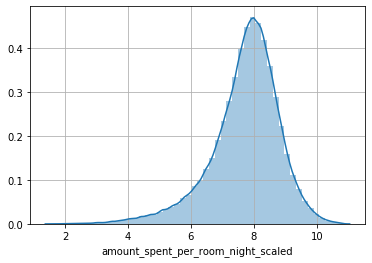

In [8]:
sns.distplot(df_hol['amount_spent_per_room_night_scaled'])
plt.grid()
plt.show()

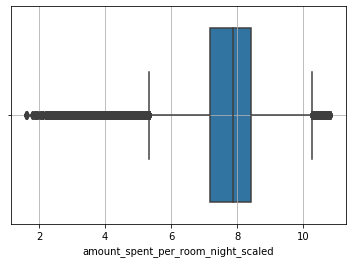

In [9]:
sns.boxplot(df_hol['amount_spent_per_room_night_scaled'])
plt.grid()
plt.show()